Please Follow this Docker container installation process in your MacBook/Laptop before running this Python+R Notebook below.

  - Installation setup of environment where this notebook runs can be found i 
  Container with Jupyter+H2o.ai+Python3+R+Spark in this [link_here](https://github.com/jpacerqueira/project_lost_saturn)
  
  Also :
  - You need a Strong bandwith the install the Container environment it takes about 10-11 minutes to finish.
  
  - Good Luck,  stay safe! But investigate Corona virus(covid-19 or SARS-Cov-2) in your area and give the information back to the comunity!


# CoronaVirus Prediction

### Number of Day to Predict 63

In [1]:
num_days_R_prediction=63

In [2]:
#!pip install rpy2
import rpy2
%load_ext rpy2.ipython
%Rpush num_days_R_prediction

In [3]:
%%R
max_days_prediction<-num_days_R_prediction

In [4]:
bypass_weather=1 # =1 bypass weather_pi api calls
#
number_past_days_training=36 # =(8/14) * num_days_R_prediction  # Number of Past days on training # max to be on 6.Feb.2020

### Load Data from Github - John Hopkins Institute 

In [5]:
# Get data from Github
import numpy as np
from math import sqrt
from sklearn.metrics import mean_squared_error
import pandas as pd

#url_1 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
url_1 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
confirmed = pd.read_csv(url_1, error_bad_lines=False)

#url_2 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv'
url_2 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
death = pd.read_csv(url_2, error_bad_lines=False)

#url_3 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv'
url_3 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
recover = pd.read_csv(url_3, error_bad_lines=False)

# fix region names
confirmed['Country/Region']= confirmed['Country/Region'].str.replace("Mainland China", "China")
confirmed['Country/Region']= confirmed['Country/Region'].str.replace("US", "United States")

death['Country/Region']= death['Country/Region'].str.replace("Mainland China", "China")
death['Country/Region']= death['Country/Region'].str.replace("US", "United States")

recover['Country/Region']= recover['Country/Region'].str.replace("Mainland China", "China")
recover['Country/Region']= recover['Country/Region'].str.replace("US", "United States")

In [6]:
confirmed.iloc[:,:]

Province/State          Country/Region        Lat  \
0                                 NaN             Afghanistan  33.000000   
1                                 NaN                 Albania  41.153300   
2                                 NaN                 Algeria  28.033900   
3                                 NaN                 Andorra  42.506300   
4                                 NaN                  Angola -11.202700   
5                                 NaN     Antigua and Barbuda  17.060800   
6                                 NaN               Argentina -38.416100   
7                                 NaN                 Armenia  40.069100   
8        Australian Capital Territory               Australia -35.473500   
9                     New South Wales               Australia -33.868800   
10                 Northern Territory               Australia -12.463400   
11                         Queensland               Australia -28.016700   
12                    South Australia               Australia -34.928500   
13                           Tasmania               Australia -41.454500   
14                           Victoria               Australia -37.813600   
15                  Western Australia               Australia -31.950500   
16                                NaN                 Austria  47.516200   
17                                NaN              Azerbaijan  40.143100   
18                                NaN                 Bahamas  25.034300   
19                                NaN                 Bahrain  26.027500   
20                                NaN              Bangladesh  23.685000   
21                                NaN                Barbados  13.193900   
22                                NaN                 Belarus  53.709800   
23                                NaN                 Belgium  50.833300   
24                                NaN                   Benin   9.307700   
25                                NaN                  Bhutan  27.514200   
26                                NaN                 Bolivia -16.290200   
27                                NaN  Bosnia and Herzegovina  43.915900   
28                                NaN                  Brazil -14.235000   
29                                NaN                  Brunei   4.535300   
..                                ...                     ...        ...   
236                               NaN             Timor-Leste  -8.874217   
237                               NaN                  Belize  13.193900   
238                               NaN                    Laos  19.856270   
239                               NaN                   Libya  26.335100   
240                               NaN      West Bank and Gaza  31.952200   
241                               NaN           Guinea-Bissau  11.803700   
242                               NaN                    Mali  17.570692   
243                               NaN   Saint Kitts and Nevis  17.357822   
244             Northwest Territories                  Canada  64.825500   
245                             Yukon                  Canada  64.282300   
246                               NaN                  Kosovo  42.602636   
247                               NaN                   Burma  21.916200   
248                          Anguilla          United Kingdom  18.220600   
249            British Virgin Islands          United Kingdom  18.420700   
250          Turks and Caicos Islands          United Kingdom  21.694000   
251                               NaN              MS Zaandam   0.000000   
252                               NaN                Botswana -22.328500   
253                               NaN                 Burundi  -3.373100   
254                               NaN            Sierra Leone   8.460555   
255  Bonaire, Sint Eustatius and Saba             Netherlands  12.178400   
256                               NaN                  Malawi -13.25430

## Get Population

In [7]:
population=pd.read_csv('/home/notebookuser/notebooks/covid19/data/population.csv', sep=',', encoding='latin1') 
confirmed=pd.merge(confirmed, population,how='left' ,on=['Province/State','Country/Region'])
death=pd.merge(death, population,how='left' ,on=['Province/State','Country/Region'])
recover=pd.merge(recover, population,how='left' ,on=['Province/State','Country/Region'])

In [8]:
# merge region confirmed + death + recover
confirmed['region']=confirmed['Country/Region'].map(str)+'_'+confirmed['Province/State'].map(str)
death['region']=death['Country/Region'].map(str)+'_'+death['Province/State'].map(str)
recover['region']=recover['Country/Region'].map(str)+'_'+recover['Province/State'].map(str)
confirmed.iloc[:,:]

Province/State          Country/Region        Lat  \
0                                 NaN             Afghanistan  33.000000   
1                                 NaN                 Albania  41.153300   
2                                 NaN                 Algeria  28.033900   
3                                 NaN                 Andorra  42.506300   
4                                 NaN                  Angola -11.202700   
5                                 NaN     Antigua and Barbuda  17.060800   
6                                 NaN               Argentina -38.416100   
7                                 NaN                 Armenia  40.069100   
8        Australian Capital Territory               Australia -35.473500   
9                     New South Wales               Australia -33.868800   
10                 Northern Territory               Australia -12.463400   
11                         Queensland               Australia -28.016700   
12                    South Australia               Australia -34.928500   
13                           Tasmania               Australia -41.454500   
14                           Victoria               Australia -37.813600   
15                  Western Australia               Australia -31.950500   
16                                NaN                 Austria  47.516200   
17                                NaN              Azerbaijan  40.143100   
18                                NaN                 Bahamas  25.034300   
19                                NaN                 Bahrain  26.027500   
20                                NaN              Bangladesh  23.685000   
21                                NaN                Barbados  13.193900   
22                                NaN                 Belarus  53.709800   
23                                NaN                 Belgium  50.833300   
24                                NaN                   Benin   9.307700   
25                                NaN                  Bhutan  27.514200   
26                                NaN                 Bolivia -16.290200   
27                                NaN  Bosnia and Herzegovina  43.915900   
28                                NaN                  Brazil -14.235000   
29                                NaN                  Brunei   4.535300   
..                                ...                     ...        ...   
238                               NaN             Timor-Leste  -8.874217   
239                               NaN                  Belize  13.193900   
240                               NaN                    Laos  19.856270   
241                               NaN                   Libya  26.335100   
242                               NaN      West Bank and Gaza  31.952200   
243                               NaN           Guinea-Bissau  11.803700   
244                               NaN                    Mali  17.570692   
245                               NaN   Saint Kitts and Nevis  17.357822   
246             Northwest Territories                  Canada  64.825500   
247                             Yukon                  Canada  64.282300   
248                               NaN                  Kosovo  42.602636   
249                               NaN                   Burma  21.916200   
250                          Anguilla          United Kingdom  18.220600   
251            British Virgin Islands          United Kingdom  18.420700   
252          Turks and Caicos Islands          United Kingdom  21.694000   
253                               NaN              MS Zaandam   0.000000   
254                               NaN                Botswana -22.328500   
255                               NaN                 Burundi  -3.373100   
256                               NaN            Sierra Leone   8.460555   
257  Bonaire, Sint Eustatius and Saba             Netherlands  12.178400   
258                               NaN                  Malawi -13.25430

In [9]:
# merge region death
death.iloc[185:195,:]

Province/State                    Country/Region      Lat     Long  \
185            NaN                            Poland  51.9194  19.1451   
186            NaN                          Portugal  39.3999  -8.2245   
187            NaN                             Qatar  25.3548  51.1839   
188            NaN                           Romania  45.9432  24.9668   
189            NaN                            Russia  60.0000  90.0000   
190            NaN                            Rwanda  -1.9403  29.8739   
191            NaN                       Saint Lucia  13.9094 -60.9789   
192            NaN  Saint Vincent and the Grenadines  12.9843 -61.2872   
193            NaN                        San Marino  43.9424  12.4578   
194            NaN                      Saudi Arabia  24.0000  45.0000   

     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  6/16/20  \
185        0        0        0        0        0        0  ...     1272   
186        0        0        0        0        0        0  ...     1522   
187        0        0        0        0        0        0  ...       80   
188        0        0        0        0        0        0  ...     1437   
189        0        0        0        0        0        0  ...     7274   
190        0        0        0        0        0        0  ...        2   
191        0        0        0        0        0        0  ...        0   
192        0        0        0        0        0        0  ...        0   
193        0        0        0        0        0        0  ...       42   
194        0        0        0        0        0        0  ...     1052   

     6/17/20  6/18/20  6/19/20  6/20/20  6/21/20  6/22/20  6/23/20  \
185     1286     1316     1334     1346     1356     1359     1375   
186     1523     1524     1527     1528     1530     1534     1540   
187       82       86       93       94       98       99       99   
188     1451     1473     1484     1500     1512     1523     1539   
189     7468     7650     7831     7992     8101     8196     8349   
190        2        2        2        2        2        2        2   
191        0        0        0        0        0        0        0   
192        0        0        0        0        0        0        0   
193       42       42       42       42       42       42       42   
194     1091     1139     1184     1230     1267     1307     1346   

      Population                                 region  
185    37,980,000                            Poland_nan  
186    10,290,000                          Portugal_nan  
187     2,870,256                             Qatar_nan  
188    19,530,000                           Romania_nan  
189   144,500,000                            Russia_nan  
190           NaN                            Rwanda_nan  
191           NaN                       Saint Lucia_nan  
192           NaN  Saint Vincent and the Grenadines_nan  
193        33,916                        San Marino_nan  
194    34,695,447                      Saudi Arabia_nan  

[10 rows x 160 columns]

In [10]:
# merge region recover
recover.iloc[175:185,:]

Province/State    Country/Region      Lat      Long  1/22/20  1/23/20  \
175            NaN              Oman  21.0000   57.0000        0        0   
176            NaN          Pakistan  30.3753   69.3451        0        0   
177            NaN            Panama   8.5380  -80.7821        0        0   
178            NaN  Papua New Guinea  -6.3150  143.9555        0        0   
179            NaN          Paraguay -23.4425  -58.4438        0        0   
180            NaN              Peru  -9.1900  -75.0152        0        0   
181            NaN       Philippines  13.0000  122.0000        0        0   
182            NaN            Poland  51.9194   19.1451        0        0   
183            NaN          Portugal  39.3999   -8.2245        0        0   
184            NaN             Qatar  25.3548   51.1839        0        0   

     1/24/20  1/25/20  1/26/20  1/27/20  ...  6/16/20  6/17/20  6/18/20  \
175        0        0        0        0  ...    11089    11797    13264   
176        0        0        0        0  ...    58437    59215    61383   
177        0        0        0        0  ...    13774    13774    13782   
178        0        0        0        0  ...        8        8        8   
179        0        0        0        0  ...      699      711      717   
180        0        0        0        0  ...   125205   128622   131190   
181        0        0        0        0  ...     6552     6820     7090   
182        0        0        0        0  ...    14654    14921    15317   
183        0        0        0        0  ...    23212    23580    24010   
184        0        0        0        0  ...    60461    62172    63642   

     6/19/20  6/20/20  6/21/20  6/22/20  6/23/20   Population   \
175    13974    14780    15552    16408    17279     4,636,000   
176    63504    67892    71458    73471    77754   197,000,000   
177    14359    14359    14359    14664    14694     4,299,739   
178        8        8        8        8        8           NaN   
179      741      791      871      903      926     7,111,652   
180   135520   143017   141967   145320   148437    32,870,710   
181     7378     7650     7893     8143     8442   104,900,000   
182    15698    16181    16683    17076    17573    37,980,000   
183    24477    24906    25376    25548    25829    10,290,000   
184    65409    66763    68319    69956    71501     2,870,256   

                   region  
175              Oman_nan  
176          Pakistan_nan  
177            Panama_nan  
178  Papua New Guinea_nan  
179          Paraguay_nan  
180              Peru_nan  
181       Philippines_nan  
182            Poland_nan  
183          Portugal_nan  
184             Qatar_nan  

[10 rows x 160 columns]

In [11]:
confirmed.iloc[185:195,:]

Province/State                    Country/Region      Lat     Long  \
185            NaN                            Poland  51.9194  19.1451   
186            NaN                          Portugal  39.3999  -8.2245   
187            NaN                             Qatar  25.3548  51.1839   
188            NaN                           Romania  45.9432  24.9668   
189            NaN                            Russia  60.0000  90.0000   
190            NaN                            Rwanda  -1.9403  29.8739   
191            NaN                       Saint Lucia  13.9094 -60.9789   
192            NaN  Saint Vincent and the Grenadines  12.9843 -61.2872   
193            NaN                        San Marino  43.9424  12.4578   
194            NaN                      Saudi Arabia  24.0000  45.0000   

     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  6/16/20  \
185        0        0        0        0        0        0  ...    30195   
186        0        0        0        0        0        0  ...    37336   
187        0        0        0        0        0        0  ...    82077   
188        0        0        0        0        0        0  ...    22415   
189        0        0        0        0        0        0  ...   544725   
190        0        0        0        0        0        0  ...      636   
191        0        0        0        0        0        0  ...       19   
192        0        0        0        0        0        0  ...       29   
193        0        0        0        0        0        0  ...      694   
194        0        0        0        0        0        0  ...   136315   

     6/17/20  6/18/20  6/19/20  6/20/20  6/21/20  6/22/20  6/23/20  \
185    30701    31015    31316    31620    31931    32227    32527   
186    37672    38089    38464    38841    39133    39392    39737   
187    83174    84441    85462    86488    87369    88403    89579   
188    22760    23080    23400    23730    24045    24291    24505   
189   552549   560321   568292   576162   583879   591465   598878   
190      639      646      661      702      728      787      798   
191       19       19       19       19       19       19       19   
192       29       29       29       29       29       29       29   
193      696      696      696      696      696      697      698   
194   141234   145991   150292   154233   157612   161005   164144   

      Population                                 region  
185    37,980,000                            Poland_nan  
186    10,290,000                          Portugal_nan  
187     2,870,256                             Qatar_nan  
188    19,530,000                           Romania_nan  
189   144,500,000                            Russia_nan  
190           NaN                            Rwanda_nan  
191           NaN                       Saint Lucia_nan  
192           NaN  Saint Vincent and the Grenadines_nan  
193        33,916                        San Marino_nan  
194    34,695,447                      Saudi Arabia_nan  

[10 rows x 160 columns]

In [12]:
confirmed.iloc[220:230,:]

Province/State  Country/Region      Lat     Long  1/22/20  1/23/20  \
220   Cayman Islands  United Kingdom  19.3133 -81.2546        0        0   
221  Channel Islands  United Kingdom  49.3723  -2.3644        0        0   
222        Gibraltar  United Kingdom  36.1408  -5.3536        0        0   
223      Isle of Man  United Kingdom  54.2361  -4.5481        0        0   
224       Montserrat  United Kingdom  16.7425 -62.1874        0        0   
225              NaN  United Kingdom  55.3781  -3.4360        0        0   
226              NaN         Uruguay -32.5228 -55.7658        0        0   
227              NaN   United States  37.0902 -95.7129        1        1   
228              NaN      Uzbekistan  41.3775  64.5853        0        0   
229              NaN       Venezuela   6.4238 -66.5897        0        0   

     1/24/20  1/25/20  1/26/20  1/27/20  ...  6/16/20  6/17/20  6/18/20  \
220        0        0        0        0  ...      193      193      193   
221        0        0        0        0  ...      568      570      570   
222        0        0        0        0  ...      176      176      176   
223        0        0        0        0  ...      336      336      336   
224        0        0        0        0  ...       11       11       11   
225        0        0        0        0  ...   298136   299251   300469   
226        0        0        0        0  ...      849      849      850   
227        2        2        5        5  ...  2137731  2163290  2191052   
228        0        0        0        0  ...     5493     5682     5767   
229        0        0        0        0  ...     3150     3386     3483   

     6/19/20  6/20/20  6/21/20  6/22/20  6/23/20   Population   \
220      195      195      195      195      195           NaN   
221      570      570      570      570      570       173,519   
222      176      176      176      176      176        33,693   
223      336      336      336      336      336        84,939   
224       11       11       11       11       11         4,991   
225   301815   303110   304331   305289   306210    66,440,000   
226      853      859      876      882      885     3,471,150   
227  2222579  2255297  2281655  2312302  2347022   327,200,000   
228     5946     6153     6315     6461     6662    33,363,556   
229     3591     3789     3917     4048     4187           NaN   

                             region  
220   United Kingdom_Cayman Islands  
221  United Kingdom_Channel Islands  
222        United Kingdom_Gibraltar  
223      United Kingdom_Isle of Man  
224       United Kingdom_Montserrat  
225              United Kingdom_nan  
226                     Uruguay_nan  
227               United States_nan  
228                  Uzbekistan_nan  
229                   Venezuela_nan  

[10 rows x 160 columns]

## Create Time Series + Plots

In [13]:
def create_ts(df):
  ts=df
  ts=ts.drop(['Province/State', 'Country/Region','Lat', 'Long',' Population '], axis=1)
  ts.set_index('region')
  ts=ts.T
  ts.columns=ts.loc['region']
  ts=ts.drop('region')
  ts=ts.fillna(0)
  ts=ts.reindex(sorted(ts.columns), axis=1)
  return (ts)

In [14]:
## JOAO - Fix - Drop Duplicates # Keep Last # Issue With Data source Change from John Hopkins institute
#
ts=create_ts(confirmed.drop_duplicates(subset=['region'], keep='last', inplace=False) )
ts_d=create_ts(death.drop_duplicates(subset=['region'], keep='last', inplace=False) )
ts_rec=create_ts(recover.drop_duplicates(subset=['region'], keep='last', inplace=False) )

In [15]:
# JOAO - FIX - Automation WarmUp of Plot Library
import matplotlib.pyplot as plt
import time
plt.legend(loc = 'upper left')
plt.show()

No handles with labels found to put in legend.


<Figure size 640x480 with 1 Axes>

Text(0.5, 1.0, 'Daily Update - Total Recovered - Major_4,25 2nd Areas')

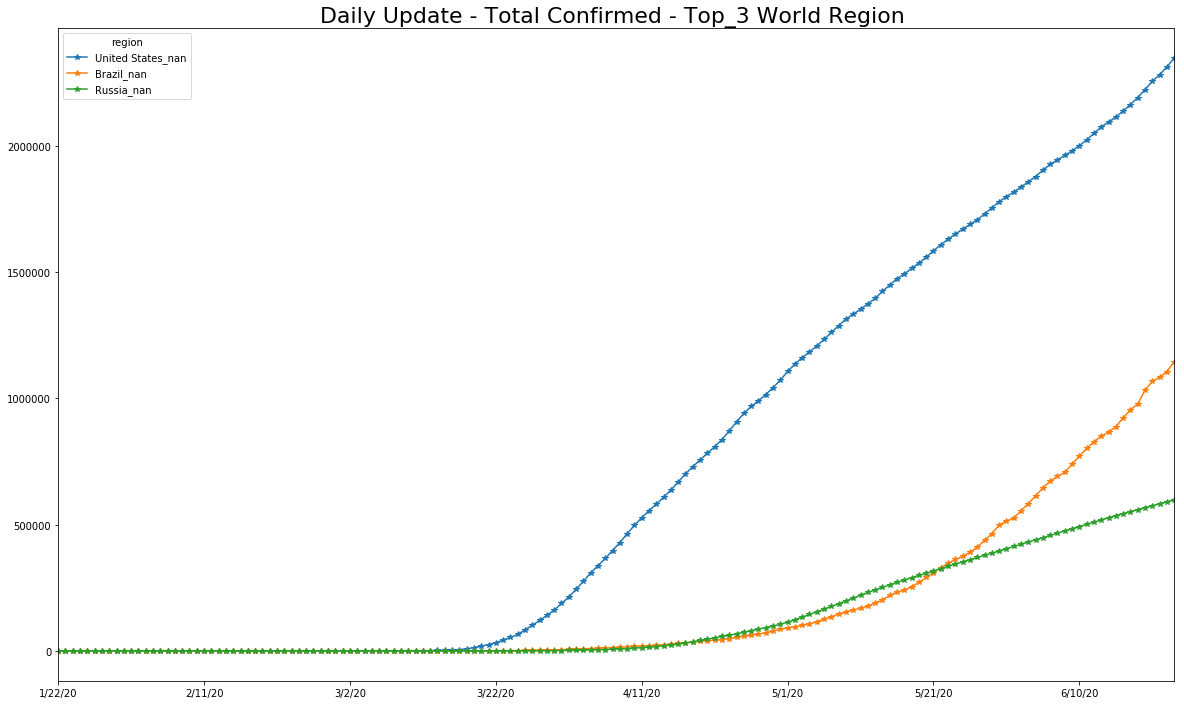

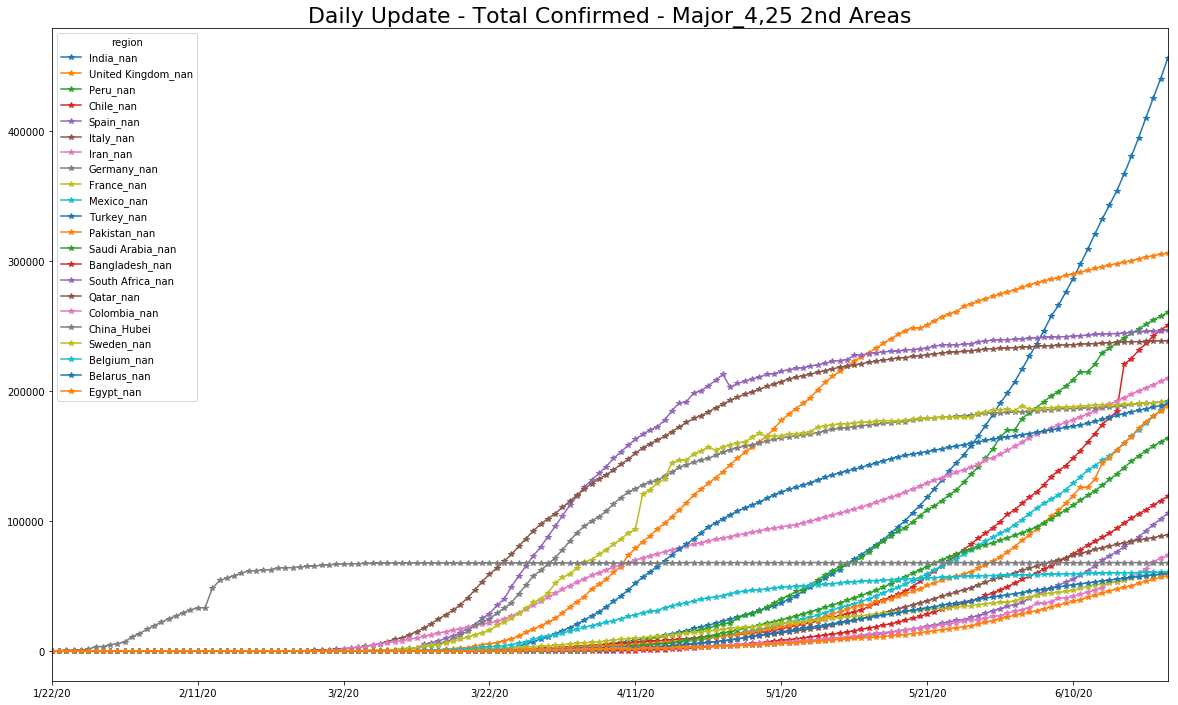

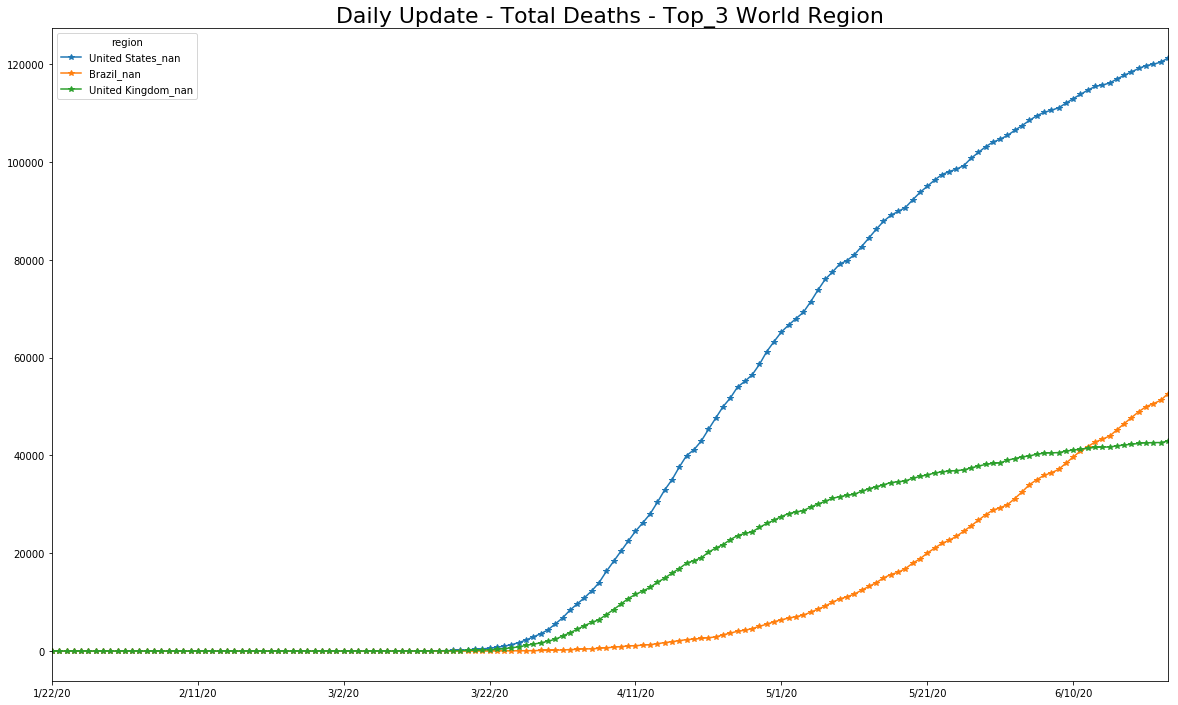

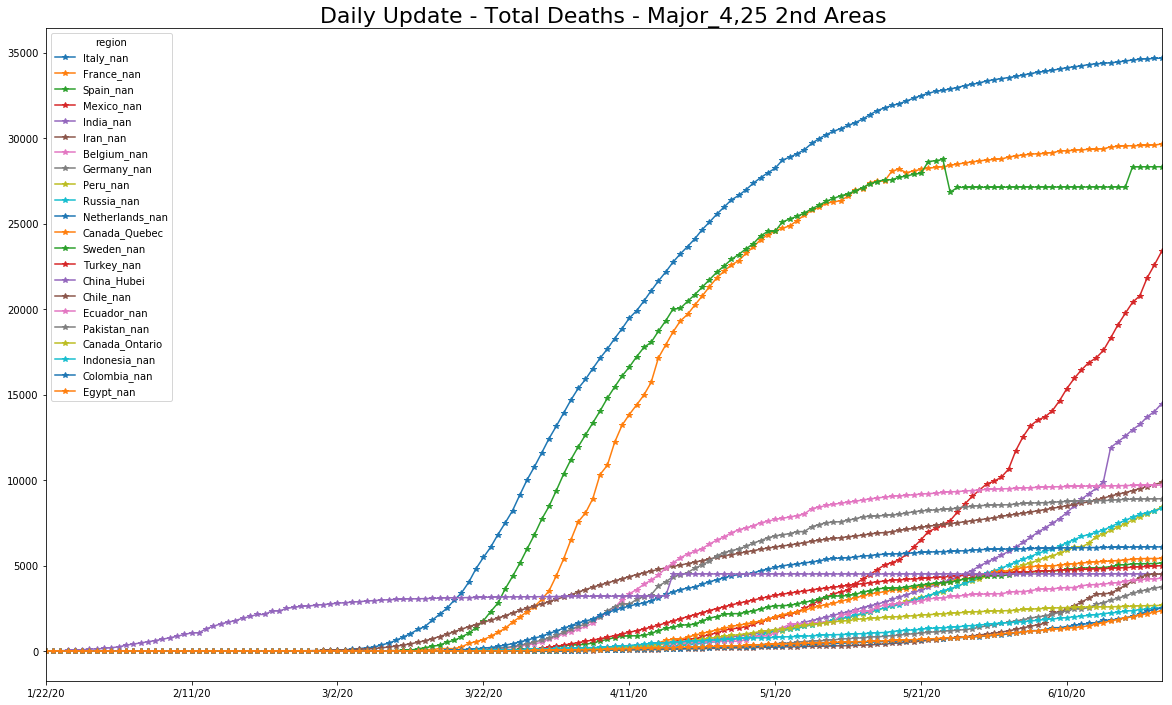

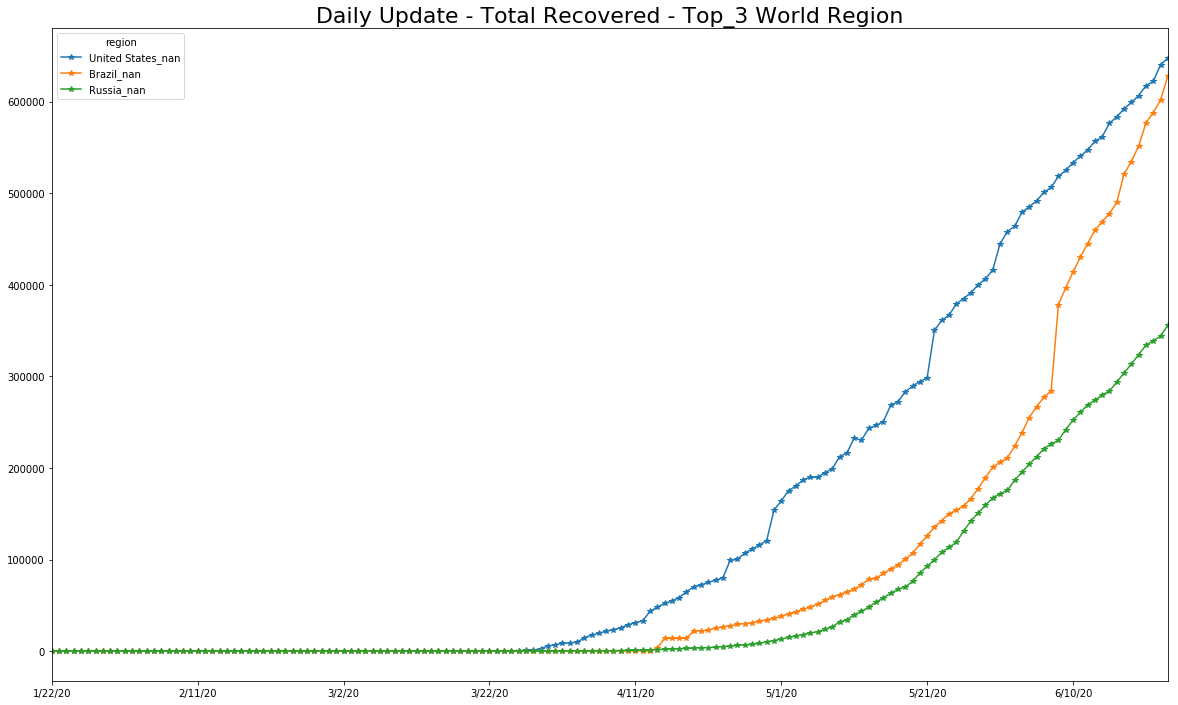

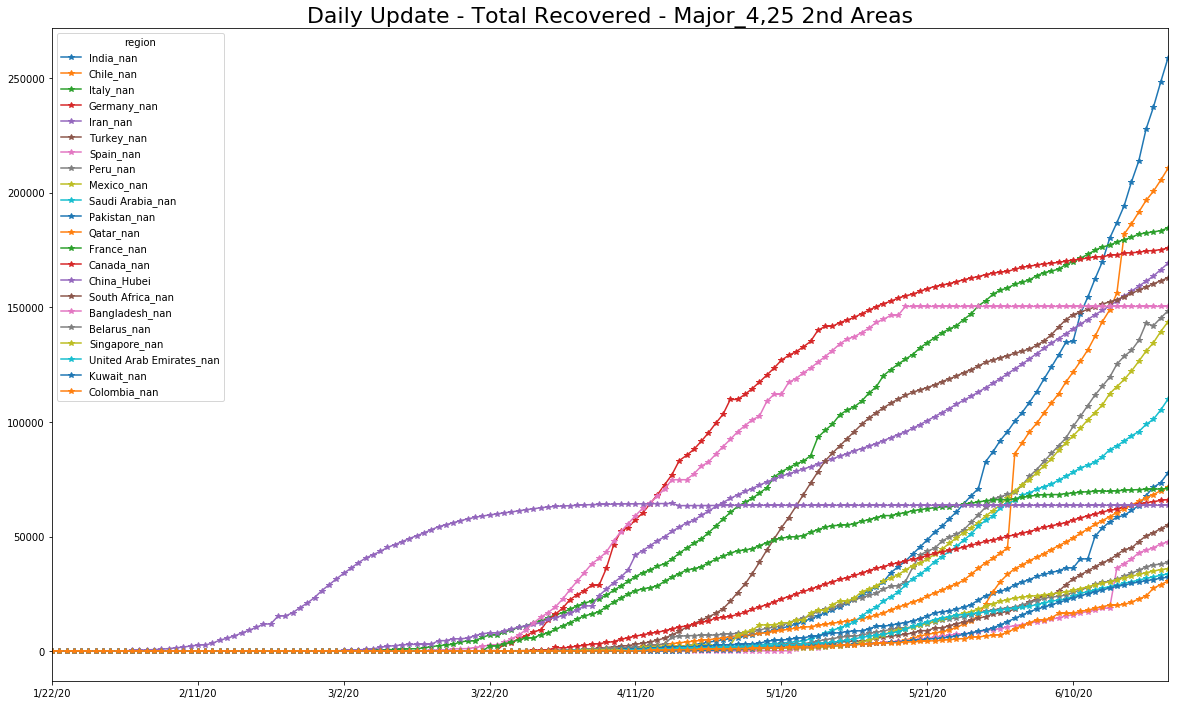

In [16]:
#
p=ts.reindex(ts.max().sort_values(ascending=False).index, axis=1)
p.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Confirmed - Top_3 World Region ',fontdict={'fontsize': 22})
p.iloc[:,3:25].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Confirmed - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

p_d=ts_d.reindex(ts_d.max().sort_values(ascending=False).index, axis=1)
p_d.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Deaths - Top_3 World Region',fontdict={'fontsize': 22})
p_d.iloc[:,3:25].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Deaths - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

p_r=ts_rec.reindex(ts_rec.max().sort_values(ascending=False).index, axis=1)
p_r.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Recovered - Top_3 World Region',fontdict={'fontsize': 22})
p_r.iloc[:,3:25].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Recovered - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

### Extract Weather Data

In [17]:
#!pip install pyweatherbit
#
from weatherbit.api import Api
import json  
import pandas as pd  
from pandas.io.json import json_normalize 

### API - Joao
from datetime import datetime
#
#api_key="46f953cbca334ea1b85ab5d47dbc9aa0" # joao@fuelbigdata.com
api_key="27a4e12ebc7f41b2bd6e300015f1a090" # jpacerqueira.consult.bigdata@gmail.com
#

api = Api(api_key)
api.set_granularity('daily')

# # Set the granularity of the API - Options: ['daily','hourly','3hourly']
# # Will only affect forecast requests.

#api.get_forecast(lat='Lat', lon='Lon')
#my_end_date=datetime.today().strftime('%Y-%m-%d')

#### United Kingdom
#lat1='55.378100'
#lon1='-3.436000'
#api.get_history(lat=lat1,lon=lon1, start_date='2020-03-29',end_date=my_end_date)


In [18]:
##
#### My List of Countries and Regions to train and represent data
my_train_list=[
 ### JOAO - LIST of Countries - Start here
     #   'Andorra_nan', 
        'United States_nan',
        'United Kingdom_nan',
        'Italy_nan',
        'Spain_nan',  
        'Netherlands_nan',
        'France_nan', 
        'Belgium_nan',
        'Portugal_nan',
        'Switzerland_nan',
        'Germany_nan',
        'Japan_nan',
        'Poland_nan',
  ### JOAO - LIST of Countries - Finish here
        'Korea, South_nan',
        'China_Hubei',
        'China_Beijing',
        'China_Guangdong',
        'China_Shanghai',
      #  'China_Shanxi',
      #  'China_Sichuan',  'China_Xinjiang',
      #  'China_Yunnan', 'China_Zhejiang',
      #  'China_Anhui', 'China_Beijing',
      #  'China_Chongqing', 'China_Fujian', 'China_Gansu',
      #  'China_Guangdong', 'China_Guangxi', 'China_Guizhou',
      #  'China_Hainan', 'China_Hebei', 'China_Heilongjiang', 'China_Henan',
      #  'China_Hubei', 'China_Hunan', 'China_Inner Mongolia',
      #  'China_Jiangsu', 'China_Jiangxi', 'China_Jilin', 'China_Liaoning',
      #  'China_Ningxia', 'China_Qinghai', 'China_Shaanxi',
      #  'China_Shandong', 'China_Shanghai', 'China_Shanxi',
      #  'China_Sichuan', 'China_Tianjin', 'China_Tibet', 'China_Xinjiang',
      #  'China_Yunnan', 'China_Zhejiang',
      #  'Morocco_nan',
        'Australia_New South Wales',
      # 'Australia_Queensland',
      # 'Australia_South Australia', 'Australia_Victoria', 
        'Brazil_nan',
      # 'Cambodia_nan',
      # 'Canada_British Columbia',
        'Canada_Ontario',
        'Canada_Quebec',
      # 'Egypt_nan',
        'China_Hong Kong',
        'China_Macau',
        'Finland_nan',
        'India_nan',
        'Iran_nan',
        'Malaysia_nan',
      # 'Nepal_nan',
        'Norway_nan',
        'Philippines_nan', 'Russia_nan', 'Singapore_nan',
     #  'Sri Lanka_nan', 'Thailand_nan', 'United Arab Emirates_nan',
        'Sweden_nan',
        'Austria_nan',
     #  'Taiwan*_nan', 
     #  'Vietnam_nan',
        'Turkey_nan',
        'Peru_nan',
        'Chile_nan',
        'Mexico_nan'
       ]
#

#### Weather History

In [19]:
# ################## already done since API is limited to 500 call per day
## consume Wether data From 15/03/2020 forward to end_date=30/03/2020
#
### Location in confirmed array to start in pos 1='Albania_nan' 61 = 'China_Hong Kong'
### Only run for Countries in above : my_train_list 
vpos=len(confirmed.iloc[1])-1 #90# 89 #88 #87 #86 #85 #84 #83 #82 #81 #80 #79 #78 #77 #76 #75 #74 #1 #73
print('xcountry_region='+confirmed.iloc[1,vpos])

my_weather_fetch_list= my_train_list # ['Canada_Quebec'] #  ['Iran_nan'] #['Brazil_nan'] #

start_date_init=pd.to_datetime('today').strftime('%Y/%m/%d') # '2020-04-18'
print('start_date_init=',start_date_init)
offset_days=-1 # -1 to start yesterday pick today # API free-tier just picks one per api call!
max_days=1 #1

w=pd.DataFrame(columns=['date','region','min','max'])
if bypass_weather != 1 :
    for h in range(0,max_days):
        offset_days=h
        start_date=pd.to_datetime(start_date_init)
        #
        end_date=(start_date+pd.DateOffset(days=offset_days+1)).strftime('%Y-%m-%d')
        start_date=(start_date+pd.DateOffset(days=offset_days)).strftime('%Y-%m-%d')
        prnt_start_date=pd.to_datetime(start_date).strftime('%Y/%m/%d')
        prnt_end_date=pd.to_datetime(end_date).strftime('%Y/%m/%d')
        #
        for i in range (1,len(confirmed)):
            if confirmed.iloc[i,vpos] not in my_weather_fetch_list:
                continue
            if confirmed.iloc[i,vpos] in my_weather_fetch_list:
                #
                # Clean JSON structure return from API Call
                jas=""
                jas=api.get_history(lat=confirmed.iloc[i,2], lon=confirmed.iloc[i,3], start_date=start_date,end_date=end_date).json
                if (((json_normalize(jas['data'])['min_temp'].values[0])=='')
                     or (np.isnan((json_normalize(jas['data'])['min_temp'].values[0])) == True )):
                    continue
                try:
                    w=w.append({'date':prnt_end_date,'region':confirmed.iloc[i,vpos] ,'min':json_normalize(jas['data'])['min_temp'].values[0],'max':json_normalize(jas['data'])['max_temp'].values[0]}, ignore_index=True)
                except Exception:
                    w=w.append({'date':prnt_end_date,'region':confirmed.iloc[i,vpos] ,'min':None,'max':None}, ignore_index=True)
    #        
#
table_columns=['date','region','min','max']
w = w[w.columns.intersection(table_columns)]

xcountry_region=Albania_nan
start_date_init= 2020/06/24


In [20]:
w.to_csv('data/w_v2_v227.csv', index = False, header=True)

In [21]:
w[:]

Empty DataFrame
Columns: [date, region, min, max]
Index: []

## Kalman Filter With R

In [22]:
# Joao - FIX - Improve Performance 
### Drop the Months of Jan, Feb < 06/02 as
### they are too in the Past and model no longuer trains in China Hubei only!

ts=ts[15:]
ts_d=ts_d[15:]
ts_rec=ts_rec[15:]

In [23]:
ts[:3]

region  Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  Angola_nan  \
2/6/20                0            0            0            0           0   
2/7/20                0            0            0            0           0   
2/8/20                0            0            0            0           0   

region  Antigua and Barbuda_nan  Argentina_nan  Armenia_nan  \
2/6/20                        0              0            0   
2/7/20                        0              0            0   
2/8/20                        0              0            0   

region  Australia_Australian Capital Territory  Australia_New South Wales  \
2/6/20                                       0                          4   
2/7/20                                       0                          4   
2/8/20                                       0                          4   

region  ...  United States_nan  Uruguay_nan  Uzbekistan_nan  Venezuela_nan  \
2/6/20  ...                 11            0               0              0   
2/7/20  ...                 11            0               0              0   
2/8/20  ...                 11            0               0              0   

region  Vietnam_nan  West Bank and Gaza_nan  Western Sahara_nan  Yemen_nan  \
2/6/20           10                       0                   0          0   
2/7/20           10                       0                   0          0   
2/8/20           13                       0                   0          0   

region  Zambia_nan  Zimbabwe_nan  
2/6/20           0             0  
2/7/20           0             0  
2/8/20           0             0  

[3 rows x 266 columns]

In [24]:
ts[-4:]

region   Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  Angola_nan  \
6/20/20            28424         1891        11631          855         176   
6/21/20            28833         1962        11771          855         183   
6/22/20            29157         1995        11920          855         186   
6/23/20            29481         2047        12076          855         189   

region   Antigua and Barbuda_nan  Argentina_nan  Armenia_nan  \
6/20/20                       26          41204        19708   
6/21/20                       26          42785        20268   
6/22/20                       26          44931        20588   
6/23/20                       26          47203        21006   

region   Australia_Australian Capital Territory  Australia_New South Wales  \
6/20/20                                     108                       3149   
6/21/20                                     108                       3151   
6/22/20                                     108                       3150   
6/23/20                                     108                       3159   

region   ...  United States_nan  Uruguay_nan  Uzbekistan_nan  Venezuela_nan  \
6/20/20  ...            2255297          859            6153           3789   
6/21/20  ...            2281655          876            6315           3917   
6/22/20  ...            2312302          882            6461           4048   
6/23/20  ...            2347022          885            6662           4187   

region   Vietnam_nan  West Bank and Gaza_nan  Western Sahara_nan  Yemen_nan  \
6/20/20          349                     784                   9        922   
6/21/20          349                     833                   9        941   
6/22/20          349                    1001                  10        967   
6/23/20          349                    1169                  10        992   

region   Zambia_nan  Zimbabwe_nan  
6/20/20        1430           479  
6/21/20        1430           489  
6/22/20        1430           512  
6/23/20        1477           525  

[4 rows x 266 columns]

In [25]:
# Create data for R script
ts_conf=ts.reset_index()
ts_conf=ts_conf.rename(columns = {'index':'date'})
ts_conf['date']=pd.to_datetime(ts_conf['date'] ,errors ='coerce')
ts_conf.to_csv(r'/home/notebookuser/notebooks/covid19/data/ts_conf_r.csv')

ts_rec=ts_rec.reset_index()
ts_rec=ts_rec.rename(columns = {'index':'date'})
ts_rec['date']=pd.to_datetime(ts_rec['date'] ,errors ='coerce')
ts_rec.to_csv(r'/home/notebookuser/notebooks/covid19/data/ts_rec_r.csv')


ts_d=ts_d.reset_index()
ts_d=ts_d.rename(columns = {'index':'date'})
ts_d['date']=pd.to_datetime(ts_d['date'] ,errors ='coerce')
ts_d.to_csv(r'/home/notebookuser/notebooks/covid19/data/ts_d_r.csv')


In [26]:
%%R

#install.packages('pracma')
#install.packages('Metrics')
#install.packages('readr')
#install.packages('reshape')

Sys.setenv(TZ='GMT')
Sys.timezone()

[1] "GMT"


In [27]:
%%R
require(pracma)
require(Metrics)
require(readr)
all<- read_csv("/home/notebookuser/notebooks/covid19/data/ts_conf_r.csv")
all$X1<-NULL
date<-all[,1]
date[nrow(date) + 1,1] <-all[nrow(all),1]+1
pred_all<-NULL
for (n in 2:ncol(all)-1) {
  Y<-ts(data = all[n+1], start = 1, end =nrow(all)+1)  
  sig_w<-0.01
  w<-sig_w*randn(1,100) # acceleration which denotes the fluctuation (Q/R) rnorm(100, mean = 0, sd = 1)
  sig_v<-0.01
  v<-sig_v*randn(1,100)   
  t<-0.45
  phi<-matrix(c(1,0,t,1),2,2)
  gama<-matrix(c(0.5*t^2,t),2,1)
  H<-matrix(c(1,0),1,2)
  #Kalman
  x0_0<-p0_0<-matrix(c(0,0),2,1)
  p0_0<-matrix(c(1,0,0,1),2,2)
  Q<-0.01
  R<-0.01
  X<-NULL
  X2<-NULL
  pred<-NULL
  for (i in 0:nrow(all)) {
    namp <-paste("p", i+1,"_",i, sep = "")
    assign(namp, phi%*%(get(paste("p", i,"_",i, sep = "")))%*%t(phi)+gama%*%Q%*%t(gama))
    namk <- paste("k", i+1, sep = "")
    assign(namk,get(paste("p", i+1,"_",i, sep = ""))%*%t(H)%*%(1/(H%*%get(paste("p", i+1,"_",i, sep = ""))%*%t(H)+R)))
    namx <- paste("x", i+1,"_",i, sep = "")
    assign(namx,phi%*%get(paste("x", i,"_",i, sep = "")))
    namE <- paste("E", i+1, sep = "")
    assign(namE,Y[i+1]-H%*%get(paste("x", i+1,"_",i, sep = "")))
    namx2 <- paste("x", i+1,"_",i+1, sep = "")
    assign(namx2,get(paste("x", i+1,"_",i, sep = ""))+get(paste("k", i+1, sep = ""))%*%get(paste("E", i+1, sep = "")))
    namp2 <- paste("p", i+1,"_",i+1, sep = "")
    assign(namp2,(p0_0-get(paste("k", i+1, sep = ""))%*%H)%*%get(paste("p", i+1,"_",i, sep = "")))
    X<-rbind(X,get(paste("x", i+1,"_",i,sep = ""))[1])
    X2<-rbind(X2,get(paste("x", i+1,"_",i,sep = ""))[2])
    if(i>2){
      remove(list=(paste("p", i-1,"_",i-2, sep = "")))
      remove(list=(paste("k", i-1, sep = "")))
      remove(list=(paste("E", i-1, sep = "")))
      remove(list=(paste("p", i-2,"_",i-2, sep = "")))
      remove(list=(paste("x", i-1,"_",i-2, sep = "")))
      remove(list=(paste("x", i-2,"_",i-2, sep = "")))}
  }
  pred<-NULL
  pred<-cbind(Y,X,round(X2,4))
  pred<-as.data.frame(pred)
  pred$region<-colnames(all[,n+1])
  pred$date<-date$date
  pred$actual<-rbind(0,(cbind(pred[2:nrow(pred),1])/pred[1:nrow(pred)-1,1]-1)*100)
  pred$predict<-rbind(0,(cbind(pred[2:nrow(pred),2])/pred[1:nrow(pred)-1,2]-1)*100)
  pred$pred_rate<-(pred$X/pred$Y-1)*100
  pred$X2_change<-rbind(0,(cbind(pred[2:nrow(pred),3]-pred[1:nrow(pred)-1,3])))
  pred_all<-rbind(pred_all,pred)
}
pred_all<-cbind(pred_all[,4:5],pred_all[,1:3])
names(pred_all)[5]<-"X2"
pred_all=pred_all[with( pred_all, order(region, date)), ]
pred_all<-pred_all[,3:5]

R[write to console]: Loading required package: pracma

R[write to console]: Loading required package: Metrics

R[write to console]: Loading required package: readr

R[write to console]: Parsed with column specification:
cols(
  .default = col_double(),
  date = col_date(format = "")
)

R[write to console]: See spec(...) for full column specifications.



In [28]:
p=%R pred_all

In [29]:
############ Merge R output due to package problem
### Joao FIX - 
# t=ts_d    -  deaths
# t=ts_rec  -  recovered
# t=ts      -  confirmed
t=ts
t=t.stack().reset_index(name='confirmed')
t.columns=['date', 'region','confirmed']
t['date']=pd.to_datetime(t['date'] ,errors ='coerce')
t=t.sort_values(['region', 'date'])

temp=t.iloc[:,:3]
temp=temp.reset_index(drop=True)
for i in range(1,len(t)+1):
  if(temp.iloc[i,1] is not temp.iloc[i-1,1]):
    temp.loc[len(temp)+1] = [temp.iloc[i-1,0]+ pd.DateOffset(1),temp.iloc[i-1,1], 0] 
temp=temp.sort_values(['region', 'date'])
temp=temp.reset_index(drop=True)
temp['Y']=p['Y']
temp['X']=p['X']
temp['X2']=p['X2']

# JOAO - FIX - temp fixed
# Y,X,X2 nan issue from p revolved

p_pd=pd.DataFrame(p,columns=['Y','X','X2'])

p_pd['nindex'] = range(1, 1+len(p_pd))
temp['nindex']= range(1,1+len(temp))

#temp_1 = temp.join(p_pd)
temp_1 = temp.merge(p_pd, on='nindex', how='inner', suffixes=('_1', '_2')).rename(columns={"Y_2": "Y", "X_2": "X", "X2_2" : "X2"})
temp_1 = temp_1.drop(columns=['Y_1', 'X_1','X2_1','nindex'])


temp=temp_1
temp.to_csv(r'/home/notebookuser/notebooks/covid19/data/temp.csv')

## Pre Proccessing Data for ML Model

### Extract Weather Forecast Data

In [30]:
#
### Joao - Test Later Weather from new file : w_v2.csv and w_v2_v2.csv
w_v2=pd.read_csv('data/w_v2.csv', sep=',', encoding='latin1')
w_v2['date']=pd.to_datetime(w_v2['date'],format='%Y/%m/%d')

w_v2_v2=pd.read_csv('data/w_v2_v2.csv', sep=',', encoding='latin1')
w_v2_v2['date']=pd.to_datetime(w_v2_v2['date'],format='%Y/%m/%d')

w_v2_v227=pd.read_csv('data/w_v2_v227.csv', sep=',', encoding='latin1')
w_v2_v227['date']=pd.to_datetime(w_v2_v227['date'],format='%Y/%m/%d')

w=pd.read_csv('data/w.csv', sep=',', encoding='latin1')
w['date']=pd.to_datetime(w['date'],format='%d/%m/%Y')

w_forecast=pd.read_csv('data/w_forecast.csv', sep=',', encoding='latin1')
w_forecast['date']=pd.to_datetime(w_forecast['date'],format='%d/%m/%Y')

### Append Weather fetched now to file w_v2_v2
w_n_forward=w_v2_v2.append(w_v2_v227) 
w_n_forward=w_n_forward.drop_duplicates(subset=['date','region'], keep='last', inplace=False)
w_n_forward=w_n_forward.sort_values(by=['region','date'], ascending=True)
w_n_forward.to_csv(r'data/w_v2_v2.csv', index = False, header=True)

In [31]:
w_total=pd.DataFrame(columns=['date','region','min','max'])
w_total=w.append(w_forecast).append(w_v2).append(w_v2_v2).append(w_v2_v227) 
w_total=w_total.drop_duplicates(subset=['date','region'], keep='last', inplace=False)
w_total=w_total.sort_values(by=['region','date'], ascending=True)

w_total.to_csv(r'data/w_total.csv', index = False, header=True)

In [32]:
w_in_model=pd.read_csv('data/w_total.csv', sep=',', encoding='latin1')
#
w_in_model['date']=pd.to_datetime(w_in_model['date'],format='%Y/%m/%d')
w_in_model.to_csv(r'data/w_in_model.csv', index = False, header=True)

In [33]:
w_in_model.tail(2)

date       region   min   max
6899 2020-05-10  Vietnam_nan  26.9  33.0
6900 2020-05-11  Vietnam_nan  25.0  33.0

### Build Train Set Data Structure

In [34]:
### JOAO - Fix -
## t=ts confirmed
t=ts
t=t.stack().reset_index(name='confirmed')
t.columns=['date', 'region','confirmed']
t['date']=pd.to_datetime(t['date'] ,errors ='coerce')
t=t.sort_values(['region', 'date'])

# Add 1 Future day for prediction
t=t.reset_index(drop=True)
for i in range(1,len(t)+1):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        t.loc[len(t)+1] = [t.iloc[i-1,0]+ pd.DateOffset(1),t.iloc[i-1,1], 0] 
t=t.sort_values(['region', 'date'])
t=t.reset_index(drop=True)

In [35]:
### JOAO - Fix -
t['1_day_change']=t['3_day_change']=t['7_day_change']=t['1_day_change_rate']=t['3_day_change_rate']=t['7_day_change_rate']=t['last_day']=0
#
### JOAO - Fix - ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
for i in range(1,len(t)):
    if(t.iloc[i,1] is t.iloc[i-2,1]):
        t.iloc[i,3]=t.iloc[i-1,2]-t.iloc[i-2,2]
        t.iloc[i,6]=((t.iloc[i-1,2]*100 +1)/(t.iloc[i-2,2]*100 -1 +1))*100
        t.iloc[i,9]=t.iloc[i-1,2]
    if(t.iloc[i,1] is t.iloc[i-4,1]):
        t.iloc[i,4]=t.iloc[i-1,2]-t.iloc[i-4,2]
        t.iloc[i,7]=((t.iloc[i-1,2]*100 +1)/(t.iloc[i-4,2]*100 -1 +1))*100
    if(t.iloc[i,1] is t.iloc[i-8,1]):
        t.iloc[i,5]=t.iloc[i-1,2]-t.iloc[i-8,2]
        t.iloc[i,8]=((t.iloc[i-1,2]*100 +1)/(t.iloc[i-8,2]*100 -1 +1))*100
t=t.fillna(0)  
t=t.merge(temp[['date','region', 'X']],how='left',on=['date','region'])
t=t.rename(columns = {'X':'kalman_prediction'}) 
t=t.replace([np.inf, -np.inf], 0)

### Joao - Fix NaN Kalman_Filter
t['kalman_prediction']=np.nan_to_num(t['kalman_prediction'])
t['kalman_prediction']=round(t['kalman_prediction'])

#
train=t.merge(confirmed[['region',' Population ']],how='left',on='region')
train=train.rename(columns = {' Population ':'population'})
train['population']=train['population'].str.replace(r" ", '')
train['population']=train['population'].str.replace(r",", '')
train['population']=train['population'].fillna(10000000) ### Fill 10M if nan
train['population']=train['population'].astype('int32')
### JOAO - Fix - ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
# train['infected_rate']=train['last_day']/train['population']*10000
train['infected_rate']=(((train['last_day'] +1)*100)/((train['population'] +1)*100000) *10) # *100 - % converter
 #
#### Joao , merge w weather only !?!
##train=train.merge(w,how='left',on=['date','region'])
train=train.merge(w_in_model,how='left',on=['date','region'])
#
train=train.sort_values(['region', 'date'])
### fill missing weather 
for i in range(0,len(train)):
    if(np.isnan(train.iloc[i,13])):
        if(train.iloc[i,1] is train.iloc[i-1,1]):
            train.iloc[i,13]=train.iloc[i-1,13]
            train.iloc[i,14]=train.iloc[i-1,14]

/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in long_scalars
  
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in long_scalars
  if sys.path[0] == '':
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in long_scalars
  from ipykernel import kernelapp as app


In [36]:
# Joao - Fix - Nulls are an issue
train_notnull=train[train['kalman_prediction'] != 0.0 ] #.any(axis=1)]
train_notnull[:]

date           region  confirmed  1_day_change  3_day_change  \
19    2020-02-25  Afghanistan_nan          1             1             1   
20    2020-02-26  Afghanistan_nan          1             0             1   
21    2020-02-27  Afghanistan_nan          1             0             1   
22    2020-02-28  Afghanistan_nan          1             0             0   
23    2020-02-29  Afghanistan_nan          1             0             0   
24    2020-03-01  Afghanistan_nan          1             0             0   
25    2020-03-02  Afghanistan_nan          1             0             0   
26    2020-03-03  Afghanistan_nan          1             0             0   
27    2020-03-04  Afghanistan_nan          1             0             0   
28    2020-03-05  Afghanistan_nan          1             0             0   
29    2020-03-06  Afghanistan_nan          1             0             0   
30    2020-03-07  Afghanistan_nan          1             0             0   
31    2020-03-08  Afghanistan_nan          4             0             0   
32    2020-03-09  Afghanistan_nan          4             3             3   
33    2020-03-10  Afghanistan_nan          5             0             3   
34    2020-03-11  Afghanistan_nan          7             1             4   
35    2020-03-12  Afghanistan_nan          7             2             3   
36    2020-03-13  Afghanistan_nan          7             0             3   
37    2020-03-14  Afghanistan_nan         11             0             2   
38    2020-03-15  Afghanistan_nan         16             4             4   
39    2020-03-16  Afghanistan_nan         21             5             9   
40    2020-03-17  Afghanistan_nan         22             5            14   
41    2020-03-18  Afghanistan_nan         22             1            11   
42    2020-03-19  Afghanistan_nan         22             0             6   
43    2020-03-20  Afghanistan_nan         24             0             1   
44    2020-03-21  Afghanistan_nan         24             2             2   
45    2020-03-22  Afghanistan_nan         40             0             2   
46    2020-03-23  Afghanistan_nan         40            16            18   
47    2020-03-24  Afghanistan_nan         74             0            16   
48    2020-03-25  Afghanistan_nan         84            34            50   
...          ...              ...        ...           ...           ...   
37490 2020-05-26     Zimbabwe_nan         56             0             5   
37491 2020-05-27     Zimbabwe_nan        132             0             0   
37492 2020-05-28     Zimbabwe_nan        149            76            76   
37493 2020-05-29     Zimbabwe_nan        149            17            93   
37494 2020-05-30     Zimbabwe_nan        174             0            93   
37495 2020-05-31     Zimbabwe_nan        178            25            42   
37496 2020-06-01     Zimbabwe_nan        203             4            29   
37497 2020-06-02     Zimbabwe_nan        206            25            54   
37498 2020-06-03     Zimbabwe_nan        222             3            32   
37499 2020-06-04     Zimbabwe_nan        237            16            44   
37500 2020-06-05     Zimbabwe_nan        265            15            34   
37501 2020-06-06     Zimbabwe_nan        279            28            59   
37502 2020-06-07     Zimbabwe_nan        282            14            57   
37503 2020-06-08     Zimbabwe_nan        287             3            45   
37504 2020-06-09     Zimbabwe_nan        314             5            22   
37505 2020-06-10     Zimbabwe_nan        320            27            35   
37506 2020-06-11     Zimbabwe_nan        332             6            38   
37507 2020-06-12     Zimbabwe_nan        343            12            45   
37508 2020-06-13     Zimbabwe_nan        356            11            29   
37509 2020-06-14     Zimbabwe_nan        383            13            36   
37510 2020-06-15     Zimbabwe_nan        387            27  

In [37]:
# Joao - Fix - Nulls are an issue
train_nulls=train[train['kalman_prediction'].isnull() ] #.any(axis=1)]
train_nulls[:]

Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, 1_day_change_rate, 3_day_change_rate, 7_day_change_rate, last_day, kalman_prediction, population, infected_rate, min, max]
Index: []

In [38]:
# Joao - Fix - Nulls are an issue

train_nulls=train[train.isnull().any(axis=1)]
train_nulls[:]
train[-1:]

date        region  confirmed  1_day_change  3_day_change  \
37519 2020-06-24  Zimbabwe_nan          0            13            46   

       7_day_change  1_day_change_rate  3_day_change_rate  7_day_change_rate  \
37519           134         102.541016         109.605428         134.273657   

       last_day  kalman_prediction  population  infected_rate  min  max  
37519       525              545.0    14862924   3.539007e-07  NaN  NaN

In [39]:
train.to_csv(r'data/train.csv', index = False, header=True)

##Shared -- Ratio in Confirmed - 21Day Forecast -- train 25April2020 - I
ratiod=pd.read_csv('data/train.csv', sep=',', encoding='latin1')
todayd=datetime.today().strftime('%Y-%m-%d')
ratiofn="Shared -- Ratio in Confirmed - "+str(num_days_R_prediction)+"Day Forecast -- train "+todayd+".csv"

ratiod['population_percentage_infected_rate_confirmed']=ratiod['infected_rate']*100
ratiod['population_percentage_factor_9.8_10_infected_rate_confirmed']=ratiod['infected_rate']*100*9.8
ratiod['delta_new_cases']=ratiod['kalman_prediction']-ratiod['last_day']
ratiod['delta_new_cases_per_1M_hab']=ratiod['delta_new_cases']/ratiod['population']*1000000

ratiod.to_csv(r'data/'+ratiofn, index = False, header=True)

ratiod[-3:]

date        region  confirmed  1_day_change  3_day_change  \
37517  2020-06-22  Zimbabwe_nan        512            10            26   
37518  2020-06-23  Zimbabwe_nan        525            23            33   
37519  2020-06-24  Zimbabwe_nan          0            13            46   

       7_day_change  1_day_change_rate  3_day_change_rate  7_day_change_rate  \
37517           106         102.089770         105.617711         127.678851   
37518           125         104.705521         106.891441         132.302326   
37519           134         102.541016         109.605428         134.273657   

       last_day  kalman_prediction  population  infected_rate  min  max  \
37517       489              515.0    14862924   3.296794e-07  NaN  NaN   
37518       512              531.0    14862924   3.451541e-07  NaN  NaN   
37519       525              545.0    14862924   3.539007e-07  NaN  NaN   

       population_percentage_infected_rate_confirmed  \
37517                                       0.000033   
37518                                       0.000035   
37519                                       0.000035   

       population_percentage_factor_9.8_10_infected_rate_confirmed  \
37517                                           0.000323             
37518                                           0.000338             
37519                                           0.000347             

       delta_new_cases  delta_new_cases_per_1M_hab  
37517             26.0                    1.749319  
37518             19.0                    1.278349  
37519             20.0                    1.345630

## Kalman 1 day Prediction with Evaluation

                region           mse           rmse          mae
256  United States_nan  4.054033e+10  201346.281958  20966.42446


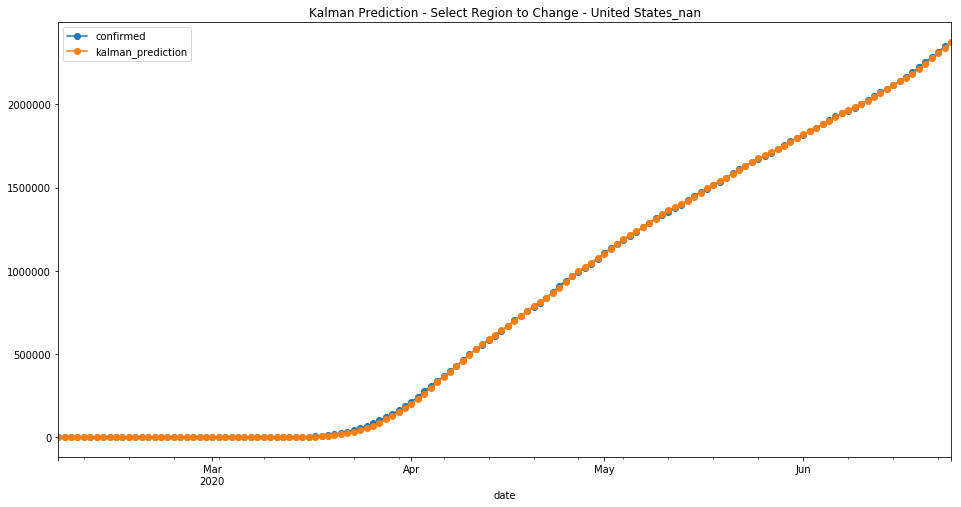

In [40]:
# Select region
region='United States_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

         region           mse          rmse          mae
208  Russia_nan  2.652030e+09  51497.861221  5109.690647


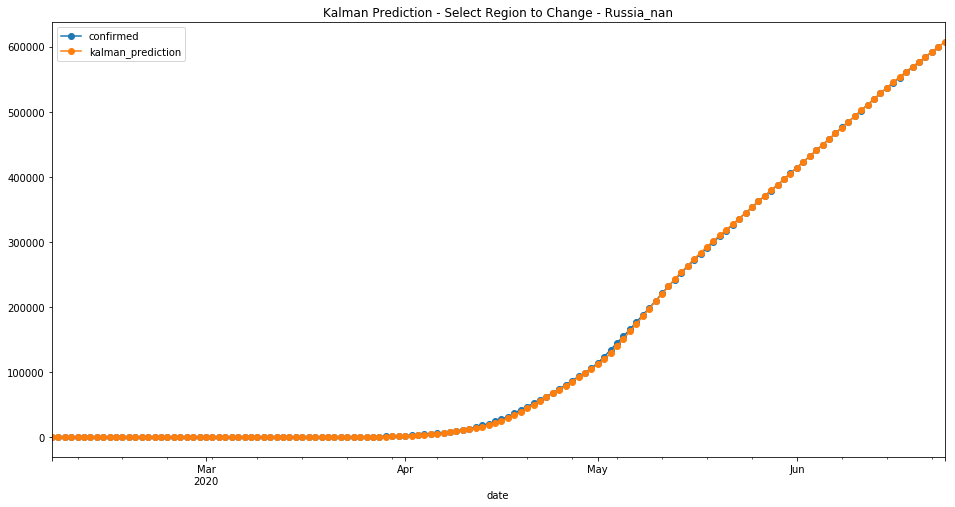

In [41]:
# Select region
region='Russia_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

        region           mse          rmse          mae
30  Brazil_nan  9.976814e+09  99884.004037  11358.52518


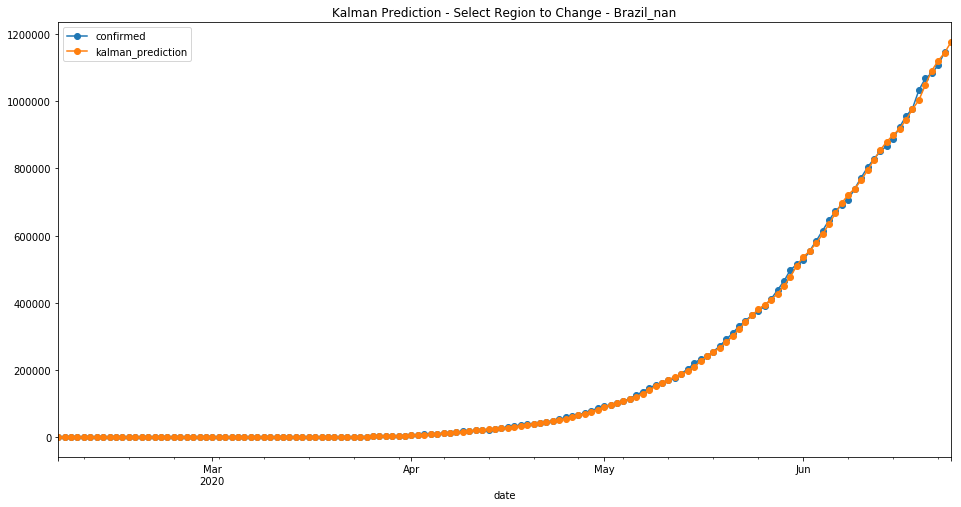

In [42]:
# Select region
region='Brazil_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

                 region           mse          rmse          mae
255  United Kingdom_nan  6.817035e+08  26109.453253  2889.201439


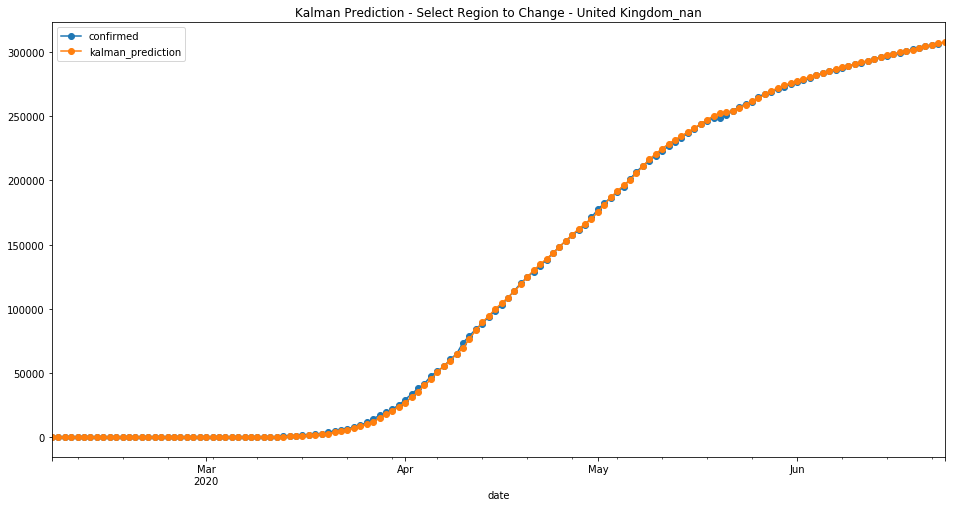

In [43]:
# Select region
region='United Kingdom_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

## Regression - 1 Day Prediction

In [44]:
#!pip install h2o
import h2o
from h2o.estimators import H2ORandomForestEstimator
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.grid.grid_search import H2OGridSearch
h2o.init(min_mem_size='5G')
import numpy as np
from sklearn.linear_model import LinearRegression

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.7" 2020-04-14; OpenJDK Runtime Environment (build 11.0.7+10-post-Ubuntu-2ubuntu218.04); OpenJDK 64-Bit Server VM (build 11.0.7+10-post-Ubuntu-2ubuntu218.04, mixed mode, sharing)
  Starting server from /home/notebookuser/anaconda3/lib/python3.7/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpk9a_368l
  JVM stdout: /tmp/tmpk9a_368l/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpk9a_368l/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


--------------------------  ----------------------------------------
H2O cluster uptime:         02 secs
H2O cluster timezone:       Etc/GMT
H2O data parsing timezone:  UTC
H2O cluster version:        3.22.0.1
H2O cluster version age:    1 year, 7 months and 28 days !!!
H2O cluster name:           H2O_from_python_unknownUser_2efe73
H2O cluster total nodes:    1
H2O cluster free memory:    5 Gb
H2O cluster total cores:    8
H2O cluster allowed cores:  8
H2O cluster status:         accepting new members, healthy
H2O connection url:         http://127.0.0.1:54321
H2O connection proxy:
H2O internal security:      False
H2O API Extensions:         XGBoost, Algos, AutoML, Core V3, Core V4
Python version:             3.7.3 final
--------------------------  ----------------------------------------

In [45]:

train=train.fillna(0)

########################################################

### Joao - Training  progression - When growth happened 2020/03/05 to 2020/04/12
### Joao - FIX - Refresh this daily forward

### Old Fixed manual ### Last run 17April2020
##
#train_df=train[train['date']>'2020-03-04']
#train_df=train[train['date']<'2020-04-16']
#boots=train_df[train_df['date']>='2020-04-08'] # some bootstrap to give more weight for recent days
#train_df=train_df.append([boots[boots['date']>='2020-04-12']]*1000,ignore_index=True)

### Train progression of the Virus ### In Country list or Spain only
#region_to_train=my_train_list
#train_df_v2=train_df[train_df['region'].isin(region_to_train)] # =='Spain_nan'] #
#test=train[train['date']>='2020-04-03']
#test=test[test['date']<'2020-04-17']
#test_v2=test[test['region'].isin(region_to_train)]
#valid_v2=test_v2[test_v2['date']>='2020-04-16']

########################################################

# Set minimum of 14 training day 2weeks.
#
if number_past_days_training>=7 : 
    ntraindays=number_past_days_training 
else : 
    ntraindays=7
#
to_day=pd.to_datetime('today')
first_train_date=(to_day+pd.DateOffset(days=-ntraindays)).strftime('%Y-%m-%d') # ntraindays/7 weeks =ntraindays days training
last_train_date=(to_day+pd.DateOffset(days=-1)).strftime('%Y-%m-%d')
first_bootstrap_date=(to_day+pd.DateOffset(days=-9)).strftime('%Y-%m-%d')
boost_bootstrap_date=(to_day+pd.DateOffset(days=-4)).strftime('%Y-%m-%d')
first_test_date=(to_day+pd.DateOffset(days=-10)).strftime('%Y-%m-%d')
last_test_date=to_day.strftime('%Y-%m-%d')
first_valid_date=(to_day+pd.DateOffset(days=-2)).strftime('%Y-%m-%d')

print('first_train_date=',first_train_date)
print('last_train_date=',last_train_date)
print('first_bootstrap_date=',first_bootstrap_date)
print('boost_bootstrap_date=',boost_bootstrap_date)
print('first_test_date=',first_test_date)
print('last_test_date=',last_test_date)
print('first_valid_date=',first_valid_date)

train_df=train[train['date']>first_train_date]
train_df=train[train['date']<last_train_date]
boots=train_df[train_df['date']>=first_bootstrap_date] # some bootstrap to give more weight for recent days
train_df=train_df.append([boots[boots['date']>=boost_bootstrap_date]]*5,ignore_index=True)

### Train progression of the Virus ### In Country list or Spain only
region_to_train=my_train_list
train_df_v2=train_df[train_df['region'].isin(region_to_train)] # =='Spain_nan'] #
test=train[train['date']>first_test_date]
test=test[test['date']<=last_test_date]
test_v2=test[test['region'].isin(region_to_train)]
valid_v2=test_v2[test_v2['date']>=first_valid_date]


first_train_date= 2020-05-19
last_train_date= 2020-06-23
first_bootstrap_date= 2020-06-15
boost_bootstrap_date= 2020-06-20
first_test_date= 2020-06-14
last_test_date= 2020-06-24
first_valid_date= 2020-06-22


In [46]:
x_col=[#'region',
            '1_day_change', '3_day_change','7_day_change',
            '1_day_change_rate', 
            '3_day_change_rate',
            '7_day_change_rate', 
            'last_day',
            'min', 'max',
            'infected_rate',
            'kalman_prediction'
          #  ,'population_percent_infected_rate_confirmed'
          #  ,'delta_new_cases'
          #  ,'delta_new_cases_per_1M_hab'
          ]

In [47]:
x=train_df[x_col]
y=train_df['confirmed']
reg = LinearRegression().fit(x,y)

pred2=reg.predict(test[x_col]); pred2=pd.DataFrame(pred2); pred2=round(pred2)
pred2['confirmed']=test['confirmed'].values; pred2['date']=test['date'].values; pred2['region']=test['region'].values


In [48]:
pred2.iloc[:25]

0  confirmed       date           region
0   25467.0      25527 2020-06-15  Afghanistan_nan
1   26251.0      26310 2020-06-16  Afghanistan_nan
2   27028.0      26874 2020-06-17  Afghanistan_nan
3   27510.0      27532 2020-06-18  Afghanistan_nan
4   28236.0      27878 2020-06-19  Afghanistan_nan
5   28452.0      28424 2020-06-20  Afghanistan_nan
6   29084.0      28833 2020-06-21  Afghanistan_nan
7   29400.0      29157 2020-06-22  Afghanistan_nan
8   29671.0      29481 2020-06-23  Afghanistan_nan
9   29976.0          0 2020-06-24  Afghanistan_nan
10   1565.0       1590 2020-06-15      Albania_nan
11   1641.0       1672 2020-06-16      Albania_nan
12   1731.0       1722 2020-06-17      Albania_nan
13   1772.0       1788 2020-06-18      Albania_nan
14   1851.0       1838 2020-06-19      Albania_nan
15   1895.0       1891 2020-06-20      Albania_nan
16   1952.0       1962 2020-06-21      Albania_nan
17   2029.0       1995 2020-06-22      Albania_nan
18   2045.0       2047 2020-06-23      Albania_nan
19   2107.0          0 2020-06-24      Albania_nan
20  11065.0      11031 2020-06-15      Algeria_nan
21  11179.0      11147 2020-06-16      Algeria_nan
22  11297.0      11268 2020-06-17      Algeria_nan
23  11420.0      11385 2020-06-18      Algeria_nan
24  11536.0      11504 2020-06-19      Algeria_nan

In [49]:
pred2.iloc[175:195]

0  confirmed       date          region
175  12153.0      12238 2020-06-20  Azerbaijan_nan
176  12630.0      12729 2020-06-21  Azerbaijan_nan
177  13134.0      13207 2020-06-22  Azerbaijan_nan
178  13619.0      13715 2020-06-23  Azerbaijan_nan
179  14157.0          0 2020-06-24  Azerbaijan_nan
180    111.0        103 2020-06-15     Bahamas_nan
181    111.0        104 2020-06-16     Bahamas_nan
182    113.0        104 2020-06-17     Bahamas_nan
183    112.0        104 2020-06-18     Bahamas_nan
184    112.0        104 2020-06-19     Bahamas_nan
185    112.0        104 2020-06-20     Bahamas_nan
186    112.0        104 2020-06-21     Bahamas_nan
187    112.0        104 2020-06-22     Bahamas_nan
188    112.0        104 2020-06-23     Bahamas_nan
189    112.0          0 2020-06-24     Bahamas_nan
190  18609.0      19013 2020-06-15     Bahrain_nan
191  19506.0      19553 2020-06-16     Bahrain_nan
192  19926.0      19961 2020-06-17     Bahrain_nan
193  20312.0      20430 2020-06-18     Bahrain_nan
194  20826.0      20916 2020-06-19     Bahrain_nan

In [50]:
pred2.iloc[220:240]

0  confirmed       date       region
220  54701.0      54680 2020-06-15  Belarus_nan
221  55380.0      55369 2020-06-16  Belarus_nan
222  56050.0      56032 2020-06-17  Belarus_nan
223  56693.0      56657 2020-06-18  Belarus_nan
224  57293.0      57333 2020-06-19  Belarus_nan
225  57979.0      57936 2020-06-20  Belarus_nan
226  58537.0      58505 2020-06-21  Belarus_nan
227  59087.0      59023 2020-06-22  Belarus_nan
228  59577.0      59487 2020-06-23  Belarus_nan
229  60008.0          0 2020-06-24  Belarus_nan
230  60128.0      60100 2020-06-15  Belgium_nan
231  60180.0      60155 2020-06-16  Belgium_nan
232  60226.0      60244 2020-06-17  Belgium_nan
233  60325.0      60348 2020-06-18  Belgium_nan
234  60427.0      60476 2020-06-19  Belgium_nan
235  60558.0      60550 2020-06-20  Belgium_nan
236  60607.0      60550 2020-06-21  Belgium_nan
237  60583.0      60550 2020-06-22  Belgium_nan
238  60587.0      60810 2020-06-23  Belgium_nan
239  60944.0          0 2020-06-24  Belgium_nan

In [51]:
#
train_h20 = h2o.H2OFrame(train_df)
###train_h20_hubei = h2o.H2OFrame(train_df_hubei) # different model for Hubei
#
### Joao - Italian Model
train_h20_v2 = h2o.H2OFrame(train_df_v2) # different model for V2 region ### Spain This time


test_h20 = h2o.H2OFrame(test)
#test_h20_hubei = h2o.H2OFrame(test_hubei)
test_h20_v2 = h2o.H2OFrame(test_v2)

valid_h20_v2=h2o.H2OFrame(valid_v2)

#training_columns = ['region','1_day_change', '3_day_change', '7_day_change','1_day_change_rate','3_day_change_rate','7_day_change_rate','last_day', 'kalman_prediction','infected_rate', 'min', 'max']
training_cols_v2 = ['region']+x_col #+['population_percent_infected_rate_confirmed','delta_new_cases','delta_new_cases_per_1M_hab']
training_columns = training_cols_v2

# Output parameter train against input parameters
response_column = 'confirmed'

# model = H2ORandomForestEstimator(ntrees=300, max_depth=12)
# model.train(x=training_columns, y=response_column, training_frame=train_h20)

###model_hubei = H2ORandomForestEstimator(ntrees=300, max_depth=12)
###model_hubei.train(x=training_columns, y=response_column, training_frame=train_h20_hubei)

### Joao - Model V2
model_v2 = H2ORandomForestEstimator(ntrees=500, max_depth=23)
model_v2.train(x=training_columns, y=response_column, training_frame=train_h20_v2, validation_frame=valid_h20_v2)


/home/notebookuser/anaconda3/lib/python3.7/site-packages/h2o/utils/shared_utils.py:177: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  data = _handle_python_lists(python_obj.as_matrix().tolist(), -1)[1]


Parse progress: | (failed)


OSError: Job with key $03017f00000132d4ffffffff$_a099669cbe8302cc41b5b21d11564504 failed with an exception: java.lang.NullPointerException
stacktrace: 
java.lang.NullPointerException
	at javassist.CannotCompileException.<init>(CannotCompileException.java:77)
	at javassist.util.proxy.DefineClassHelper.toClass(DefineClassHelper.java:249)
	at javassist.ClassPool.toClass(ClassPool.java:1120)
	at javassist.ClassPool.toClass(ClassPool.java:1083)
	at javassist.CtClass.toClass(CtClass.java:1335)
	at water.Weaver.javassistLoadClass(Weaver.java:236)
	at water.Weaver.genDelegate(Weaver.java:86)
	at water.TypeMap.getIcer(TypeMap.java:205)
	at water.TypeMap.getIcer(TypeMap.java:192)
	at water.Iced.icer(Iced.java:55)
	at water.Iced.frozenType(Iced.java:83)
	at water.Value.<init>(Value.java:353)
	at water.TAtomic.atomic(TAtomic.java:22)
	at water.Atomic.compute2(Atomic.java:56)
	at water.Atomic.fork(Atomic.java:39)
	at water.Atomic.invoke(Atomic.java:31)
	at water.fvec.Vec$VectorGroup.reserveKeys(Vec.java:1532)
	at water.parser.ParseDataset$MultiFileParseTask.<init>(ParseDataset.java:597)
	at water.parser.ParseDataset.parseAllKeys(ParseDataset.java:241)
	at water.parser.ParseDataset.access$000(ParseDataset.java:26)
	at water.parser.ParseDataset$ParserFJTask.compute2(ParseDataset.java:191)
	at water.H2O$H2OCountedCompleter.compute(H2O.java:1310)
	at jsr166y.CountedCompleter.exec(CountedCompleter.java:468)
	at jsr166y.ForkJoinTask.doExec(ForkJoinTask.java:263)
	at jsr166y.ForkJoinPool$WorkQueue.runTask(ForkJoinPool.java:974)
	at jsr166y.ForkJoinPool.runWorker(ForkJoinPool.java:1477)
	at jsr166y.ForkJoinWorkerThread.run(ForkJoinWorkerThread.java:104)


In [52]:
#Print Model

print('# MSE on the training data = ',model_v2.mse())
print('# MSE on the validation data = ',model_v2.mse(valid=True))
print('# R^2 on the training data = ',model_v2.r2())
print('# R^2 on the validation data = ',model_v2.r2(valid=True))

NameError: name 'model_v2' is not defined

In [53]:
model_v2.show()

NameError: name 'model_v2' is not defined

In [54]:
#model_hubei.varimp(True).iloc[:,:] # Feature importance for Hubei Model RF
### Joao -  Model V2
modlv2=model_v2.varimp(True).iloc[:,:] # Feature importance for Model V2 Global RF
modlv2.sort_values('percentage',ascending=False)

NameError: name 'model_v2' is not defined

In [55]:
## Joao - Model Predictions - Country_nan _v2
performance = model_v2.model_performance(test_data=test_h20_v2)
# # Model Create Predictions
pred=model_v2.predict(test_h20_v2);pred=pred.as_data_frame(); pred=round(pred)
# #pred['daily_outcome']=test['daily_outcome'].values
pred['confirmed']=test_v2['confirmed'].values
pred['date']=test_v2['date'].values
pred['region']=test_v2['region'].values

NameError: name 'model_v2' is not defined

## Correlation Matrix And Temperature

Correlation Matrix


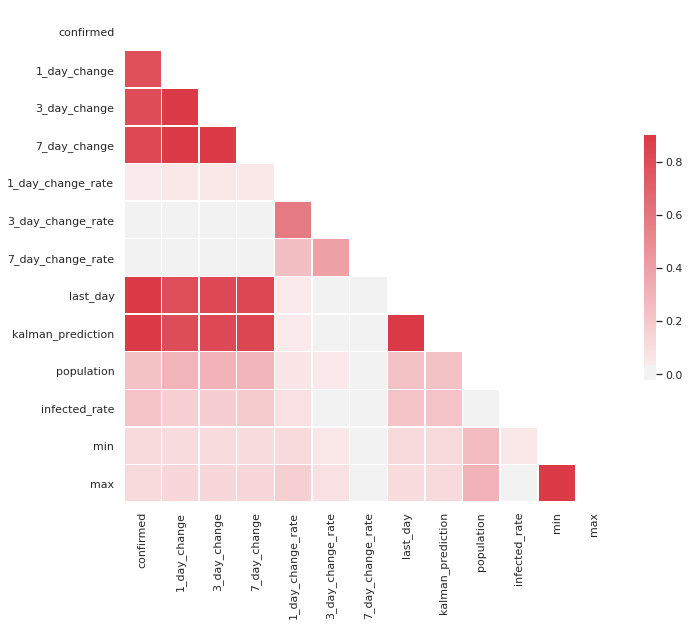

In [56]:
from string import ascii_letters
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white")
# Compute the correlation matrix
corr = train.iloc[:,2:].corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
print ('Correlation Matrix')

In [57]:
print('Correlation To Confirmed') 
print (corr.confirmed)

Correlation To Confirmed
confirmed            1.000000
1_day_change         0.787044
3_day_change         0.810426
7_day_change         0.824386
1_day_change_rate    0.043664
3_day_change_rate    0.011669
7_day_change_rate   -0.008168
last_day             0.982418
kalman_prediction    0.982555
population           0.233539
infected_rate        0.223382
min                  0.112715
max                  0.112568
Name: confirmed, dtype: float64


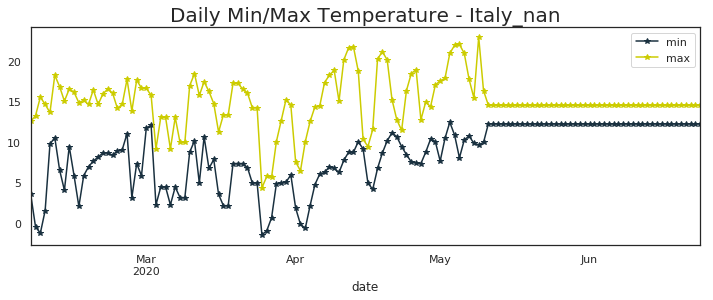

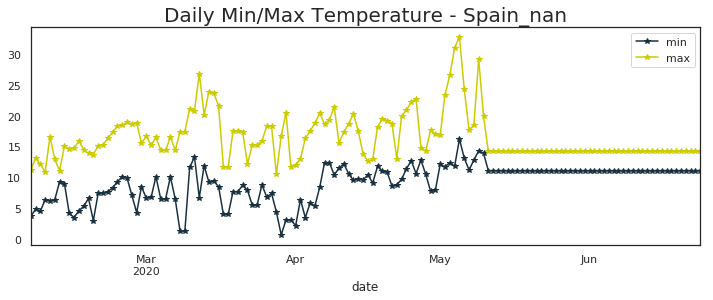

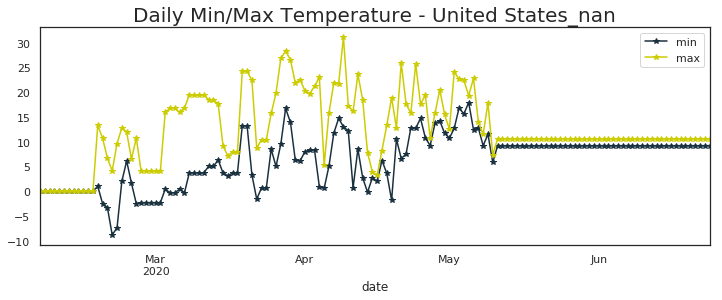

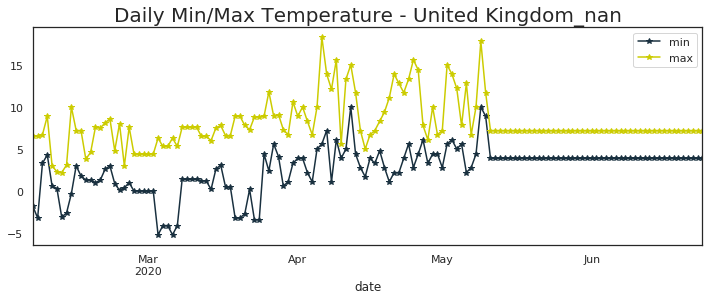

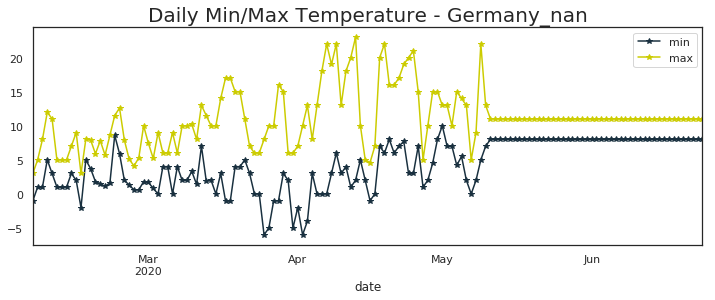

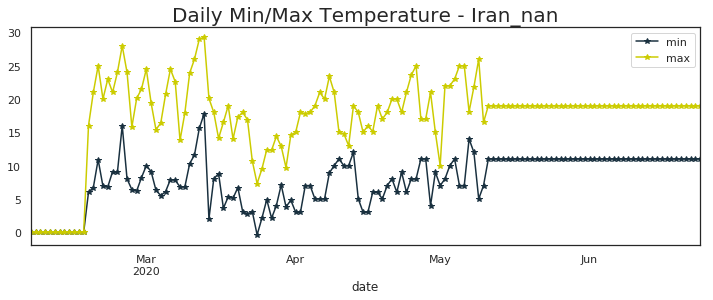

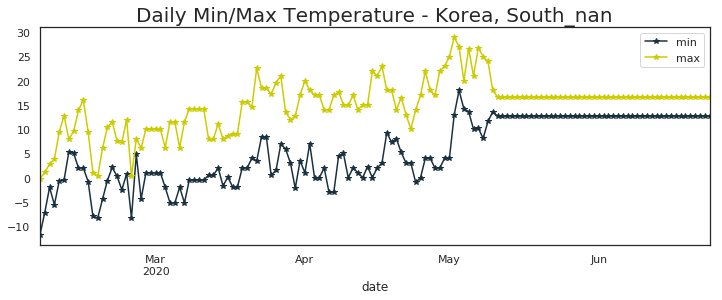

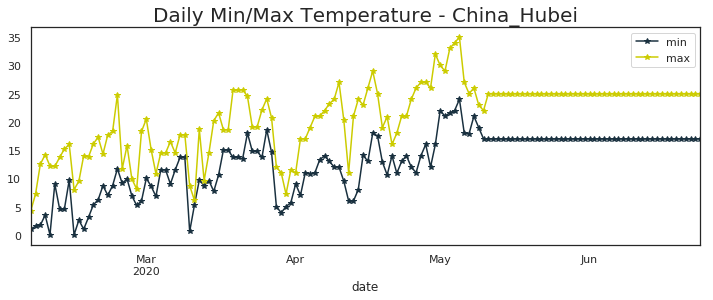

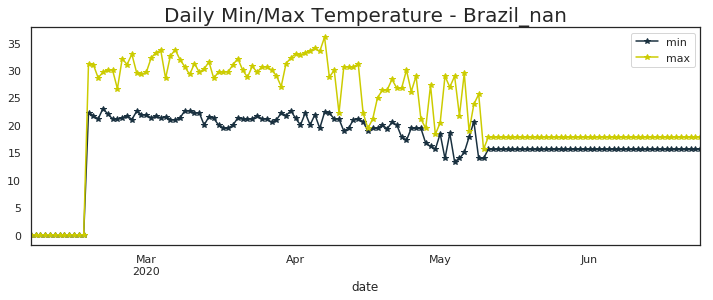

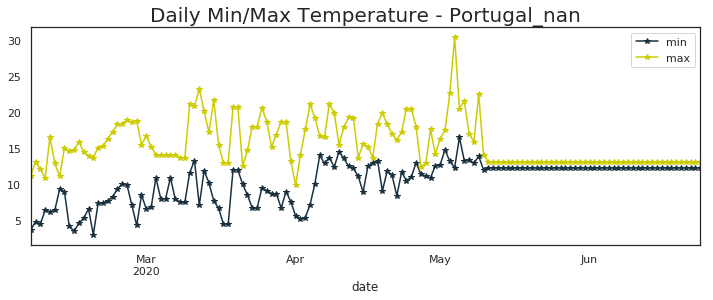

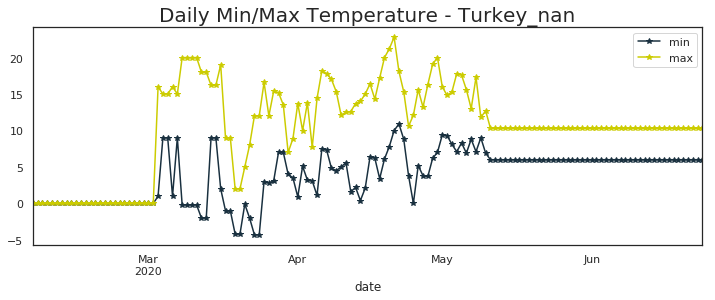

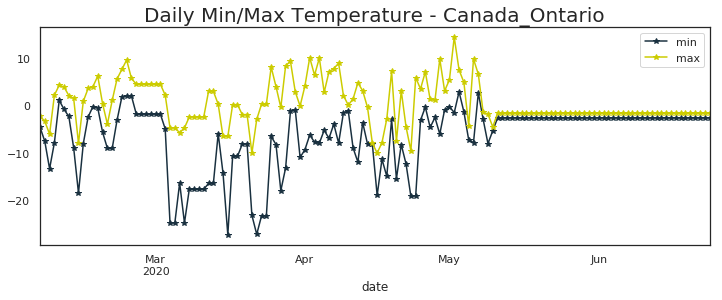

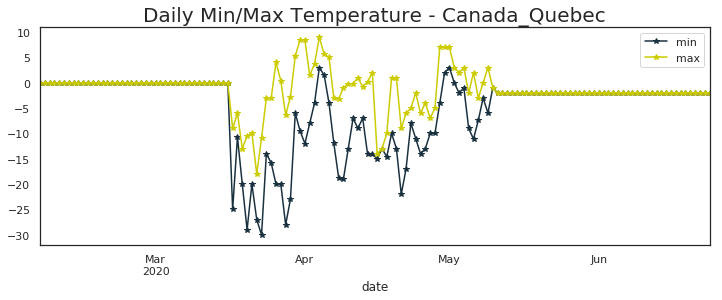

In [58]:
import matplotlib.pyplot as plt
p=train[['date','region','min','max']].set_index('date')
#
#rg1='China_Hubei'
#p=p[p['region']==rg1]
#p.iloc[:,:].plot(marker='*',figsize=(12,4),color=['#19303f','#cccc00']).set_title('Daily Min/Max Temperature - '+rg1,fontdict={'fontsize': 20})
#
## JOAO - Temp. Teast Italy - Data Supply finishes 13/03/2020
region_s=['Italy_nan','Spain_nan','United States_nan','United Kingdom_nan','Germany_nan','Iran_nan',
          'Korea, South_nan','China_Hubei','Brazil_nan','Portugal_nan','Turkey_nan',
          'Canada_Ontario','Canada_Quebec']
p=train[['date','region','min','max']].set_index('date')
for i in range(0,len(region_s)):     
    pv=p[p['region']==region_s[i]]
    pv.iloc[:,:].plot(marker='*',figsize=(12,4),color=['#19303f','#cccc00']).set_title('Daily Min/Max Temperature - '+region_s[i],fontdict={'fontsize': 20})
#

In [59]:
avg_temp=train[['region','confirmed','min','max']]  # from 20-02-20 to 06-04-2020
avg_temp=avg_temp.groupby(by='region').max()
avg_temp=avg_temp.sort_values('confirmed',ascending=False)
print( 'Most infected Areas Avg Temperature')
print(avg_temp.iloc[:100,1:])

Most infected Areas Avg Temperature
                               min   max
region                                  
United States_nan             17.9  31.1
Brazil_nan                    23.0  36.0
Russia_nan                    13.0  30.0
India_nan                     30.0  43.0
United Kingdom_nan            10.0  18.3
Peru_nan                       0.0   0.0
Chile_nan                      0.0   0.0
Spain_nan                     16.2  32.7
Italy_nan                     12.4  22.9
Iran_nan                      17.8  29.3
Germany_nan                   10.0  23.0
France_nan                    14.2  23.8
Mexico_nan                     0.0   0.0
Turkey_nan                    10.9  22.8
Pakistan_nan                  16.0  28.0
Saudi Arabia_nan               0.0   0.0
Bangladesh_nan                 0.0   0.0
South Africa_nan               0.0   0.0
Qatar_nan                      0.0   0.0
Colombia_nan                   0.0   0.0
China_Hubei                   24.0  35.0
Sweden_nan           

### Kalman X Days Ahead Prediction

In [60]:
%%R

#install.packages('reshape')

NULL


In [61]:
%%R

require(pracma)
require(Metrics)
require(readr)
library(reshape)
all<- read_csv("/home/notebookuser/notebooks/covid19/data/ts_conf_r.csv")
all$X1<-NULL

### JOAO - FIX
#
### Flexy Days maximum forward prediction =A Hint!= "Error increases as number of days increases"
days_prediction<-max_days_prediction # Set i days prediction # max_days_prediction=90 days forward prediction with Kalman Filter

for (i in 1: days_prediction) { 
  if( i>1) {all<-all_new}
  date<-all[,1]
  date[nrow(date) + 1,1] <-all[nrow(all),1]+1
  pred_all<-NULL
  for (n in 2:ncol(all)-1) {
    Y<-ts(data = all[n+1], start = 1, end =nrow(all)+1)  
    sig_w<-0.01
    w<-sig_w*randn(1,100) # acceleration which denotes the fluctuation (Q/R) rnorm(100, mean = 0, sd = 1)
    sig_v<-0.01
    v<-sig_v*randn(1,100)  
    t<-0.45
    phi<-matrix(c(1,0,t,1),2,2)
    gama<-matrix(c(0.5*t^2,t),2,1)
    H<-matrix(c(1,0),1,2)
    #Kalman
    x0_0<-p0_0<-matrix(c(0,0),2,1)
    p0_0<-matrix(c(1,0,0,1),2,2)
    Q<-0.01
    R<-0.01
    X<-NULL
    X2<-NULL
    pred<-NULL
    for (i in 0:nrow(all)) {
      namp <-paste("p", i+1,"_",i, sep = "")
      assign(namp, phi%*%(get(paste("p", i,"_",i, sep = "")))%*%t(phi)+gama%*%Q%*%t(gama))
      namk <- paste("k", i+1, sep = "")
      assign(namk,get(paste("p", i+1,"_",i, sep = ""))%*%t(H)%*%(1/(H%*%get(paste("p", i+1,"_",i, sep = ""))%*%t(H)+R)))
      namx <- paste("x", i+1,"_",i, sep = "")
      assign(namx,phi%*%get(paste("x", i,"_",i, sep = "")))
      namE <- paste("E", i+1, sep = "")
      assign(namE,Y[i+1]-H%*%get(paste("x", i+1,"_",i, sep = "")))
      namx2 <- paste("x", i+1,"_",i+1, sep = "")
      assign(namx2,get(paste("x", i+1,"_",i, sep = ""))+get(paste("k", i+1, sep = ""))%*%get(paste("E", i+1, sep = "")))
      namp2 <- paste("p", i+1,"_",i+1, sep = "")
      assign(namp2,(p0_0-get(paste("k", i+1, sep = ""))%*%H)%*%get(paste("p", i+1,"_",i, sep = "")))
      X<-rbind(X,get(paste("x", i+1,"_",i,sep = ""))[1])
      X2<-rbind(X2,get(paste("x", i+1,"_",i,sep = ""))[2])
      if(i>2){
        remove(list=(paste("p", i-1,"_",i-2, sep = "")))
        remove(list=(paste("k", i-1, sep = "")))
        remove(list=(paste("E", i-1, sep = "")))
        remove(list=(paste("p", i-2,"_",i-2, sep = "")))
        remove(list=(paste("x", i-1,"_",i-2, sep = "")))
        remove(list=(paste("x", i-2,"_",i-2, sep = "")))}
    } 
    pred<-NULL
    pred<-cbind(Y,X,round(X2,4))
    pred<-as.data.frame(pred)
    pred$region<-colnames(all[,n+1])
    pred$date<-date$date
    pred$actual<-rbind(0,(cbind(pred[2:nrow(pred),1])/pred[1:nrow(pred)-1,1]-1)*100)
    pred$predict<-rbind(0,(cbind(pred[2:nrow(pred),2])/pred[1:nrow(pred)-1,2]-1)*100)
    pred$pred_rate<-(pred$X/pred$Y-1)*100
    pred$X2_change<-rbind(0,(cbind(pred[2:nrow(pred),3]-pred[1:nrow(pred)-1,3])))
    pred_all<-rbind(pred_all,pred)
  }
  pred_all<-cbind(pred_all[,4:5],pred_all[,1:3])
  names(pred_all)[5]<-"X2"
  pred_all<-pred_all[,1:5]
       
pred_all_today=pred_all[with( pred_all, order(region, date)), ]
all_new=all
#all_new[nrow(all_new),1]<-all_new[nrow(all),1]+1
temp<-with(pred_all_today, pred_all_today[date == all[nrow(all),1]+1, ])
temp<-cbind(temp[,1:2],temp[,4])
temp2<-reshape(temp, direction = "wide", idvar = "date", timevar = "region")
rand_num<-runif(ncol(temp2)-1, 0.9, 1.05)
temp2[,2:ncol(temp2)]<-temp2[,2:ncol(temp2)]*rand_num
colnames(temp2)=colnames(all_new)
all_new<-rbind(all_new,temp2)
all_new[,2:ncol(all_new)]<-round(all_new[,2:ncol(all_new)])
for (i in 2:ncol(all_new)) {
  all_new[nrow(all_new),i]=max(all_new[nrow(all_new)-1,i],all_new[nrow(all_new),i])}
}

cols(
  .default = col_double(),
  date = col_date(format = "")
)




In [62]:
all_new=%R all_new

In [63]:
all_new['date']=pd.to_datetime(all_new['date'],unit='d')

Text(0.5, 1.0, 'Kalman Prediction - Select Country/Region to Change - Spain_nan')

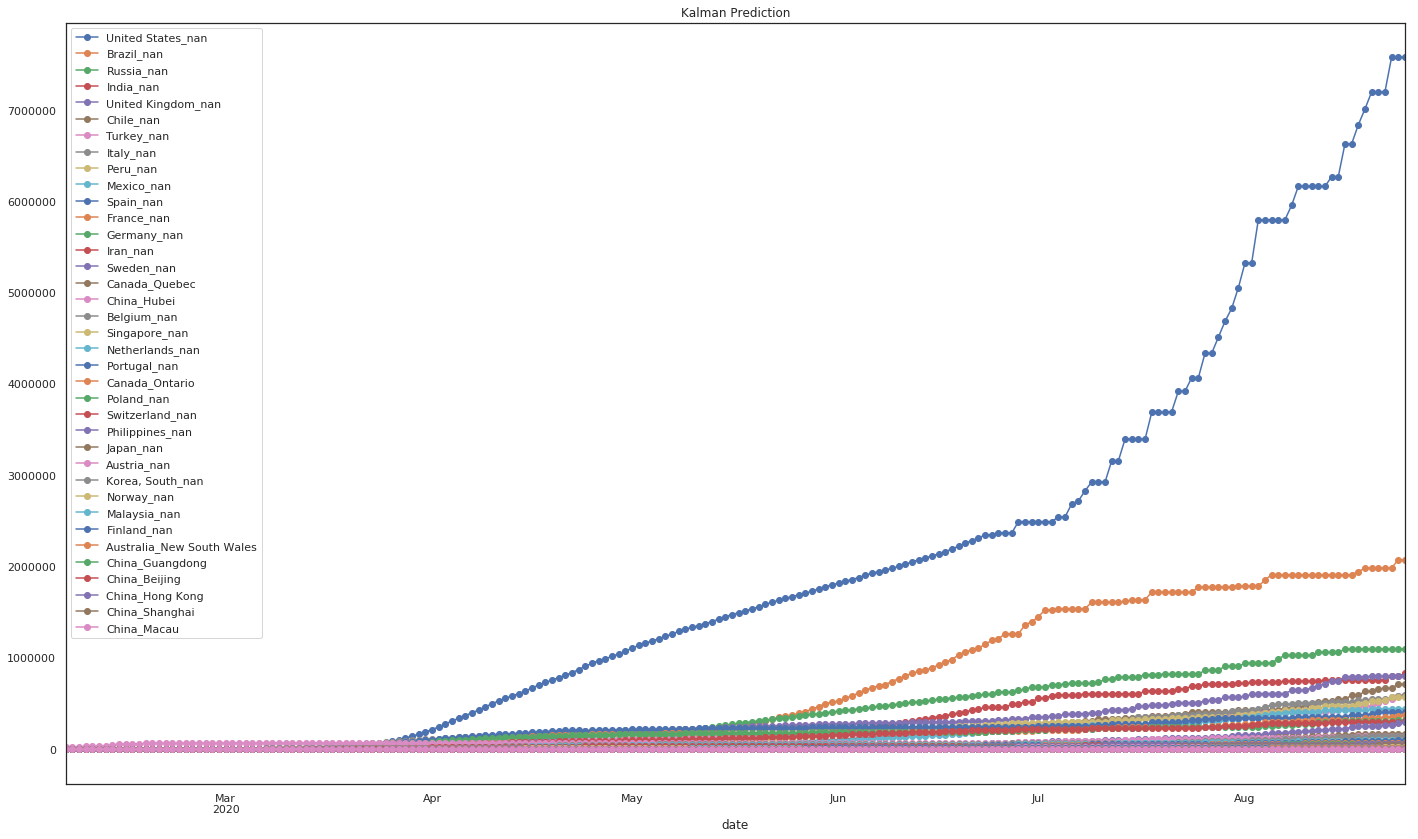

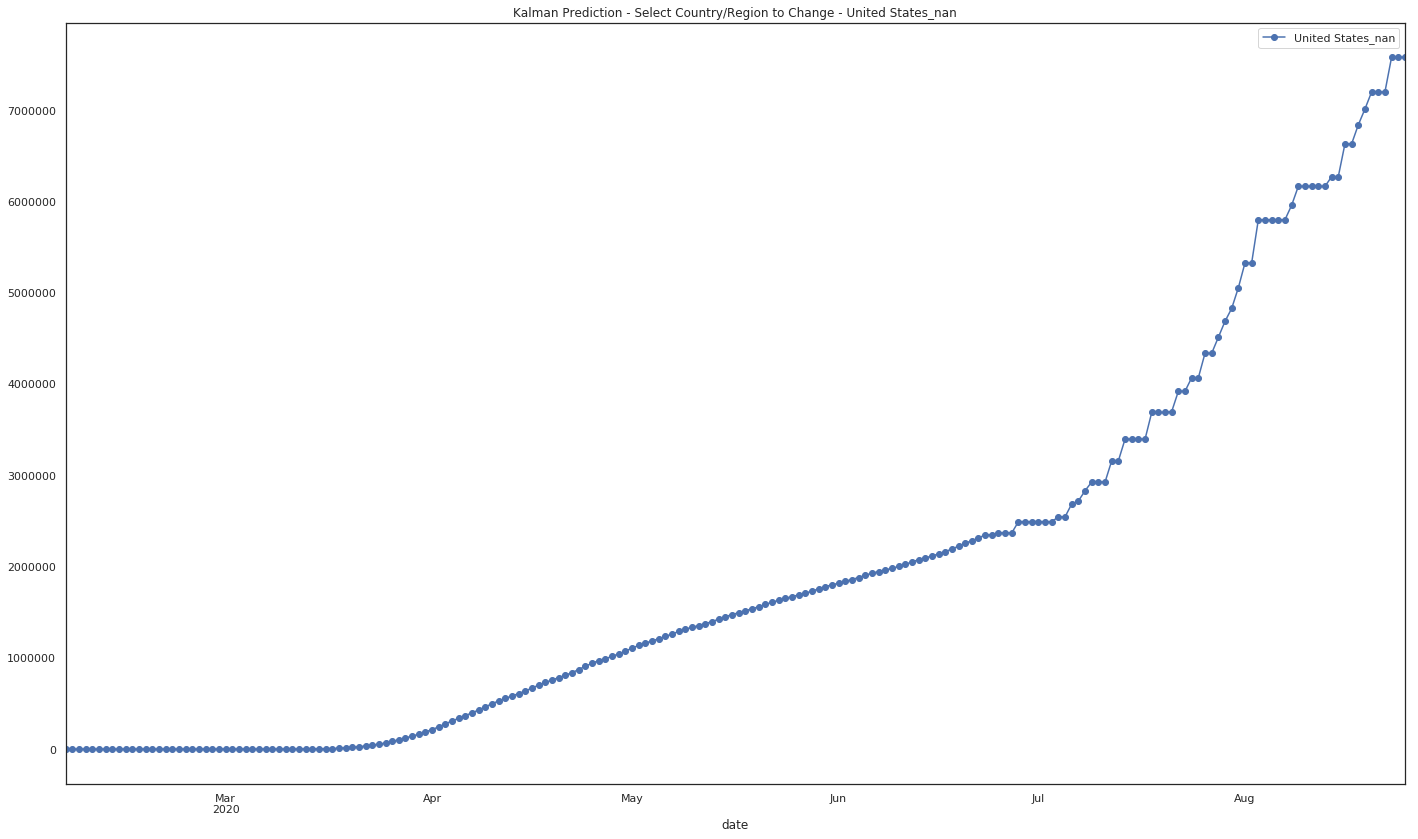

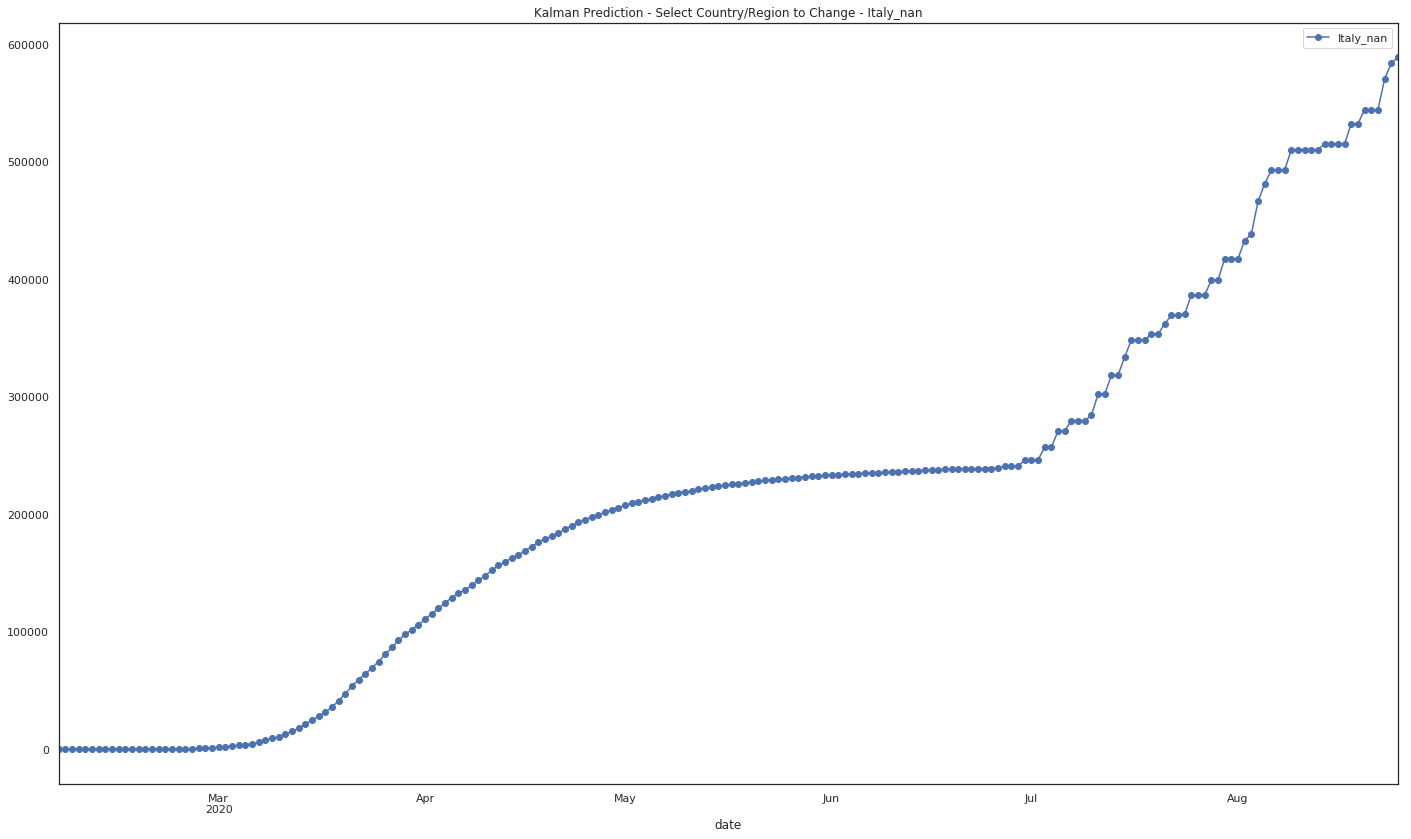

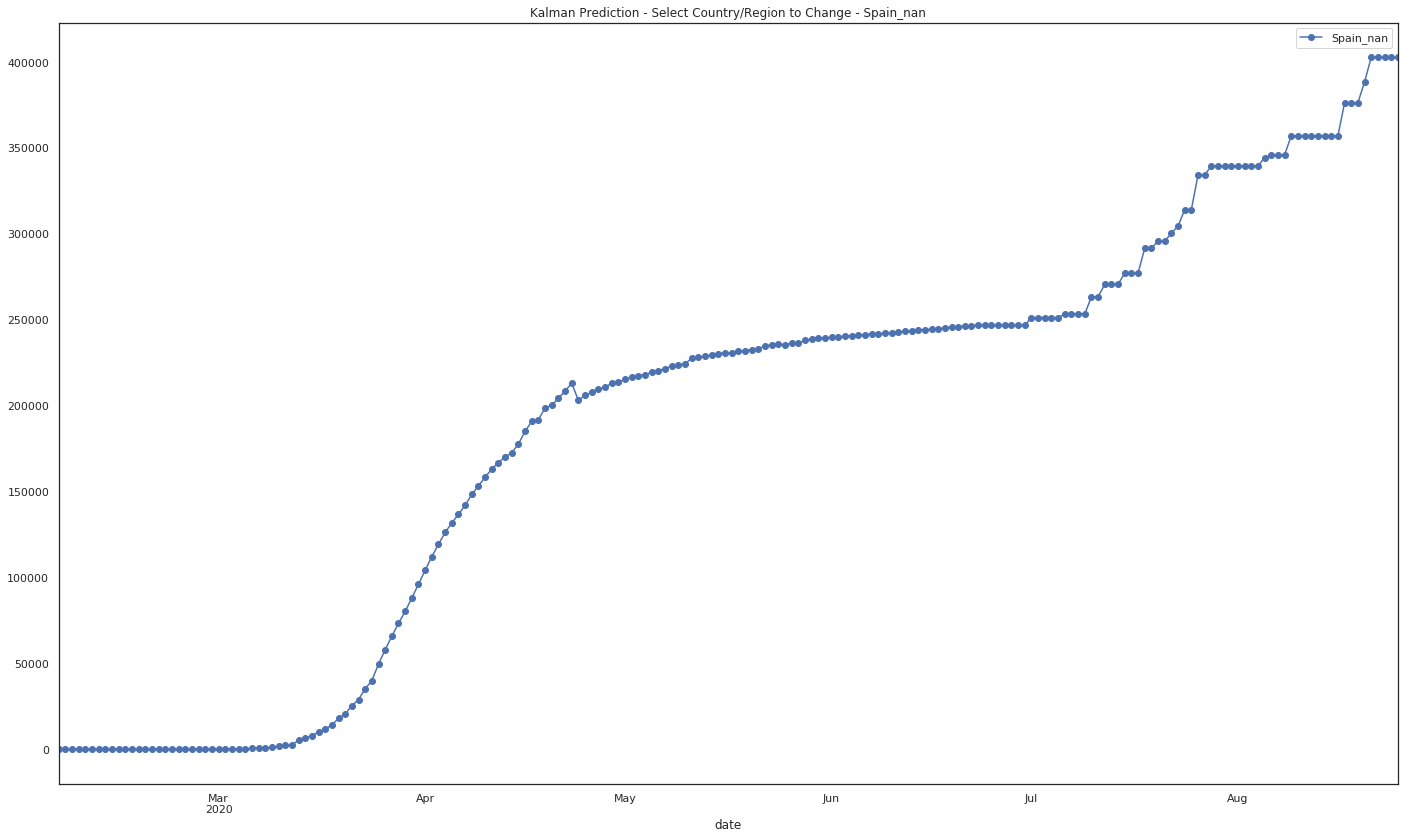

In [64]:
#
### Joao - Moving Forward ...
# Select regions From my_train_list
#
region=['date']+my_train_list
p_kalman=all_new[region]
#p=all_new
#p.iloc[len(p)-1,2]=None
p_kalman=p_kalman.set_index(['date'])
p_kalman=p_kalman.reindex(p_kalman.max().sort_values(ascending=False).index, axis=1)
p_kalman.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction')
#
p_kalman2=all_new[['date','United States_nan']] ## Joao
p_kalman2=p_kalman2.set_index(['date'])
p_kalman2.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman2.columns[0]))
#
p_kalman3=all_new[['date','Italy_nan']] ## Joao
p_kalman3=p_kalman3.set_index(['date'])
p_kalman3.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman3.columns[0]))
#
p_kalman4=all_new[['date','Spain_nan']] ## Joao
p_kalman4=p_kalman4.set_index(['date'])
p_kalman4.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman4.columns[0]))
#

/home/notebookuser/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


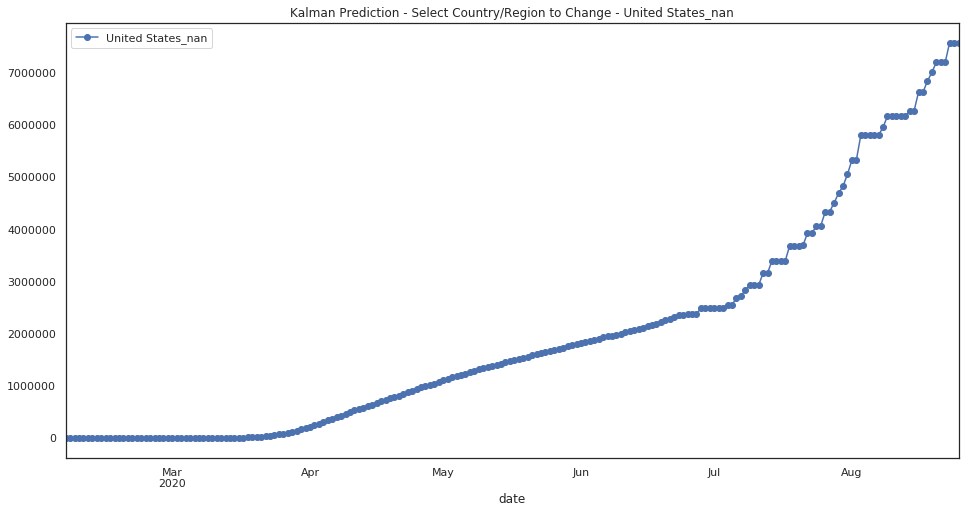

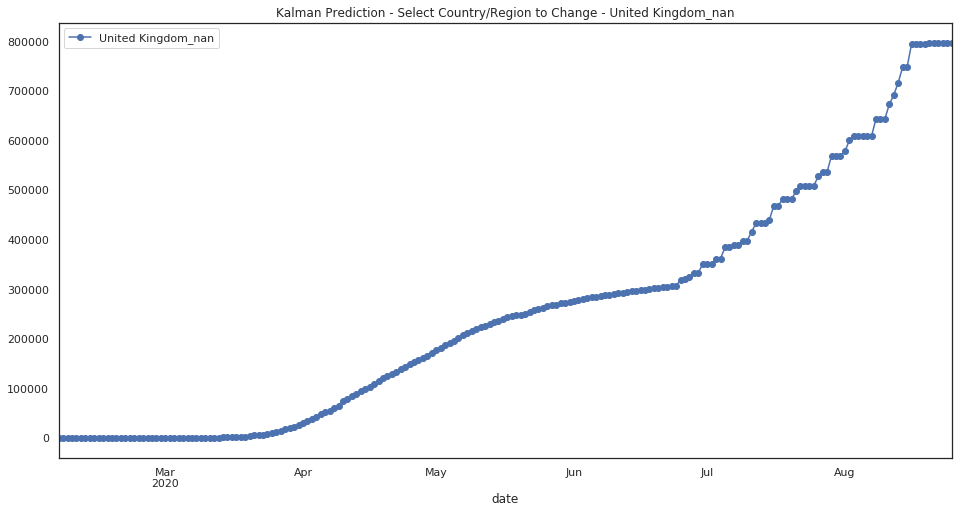

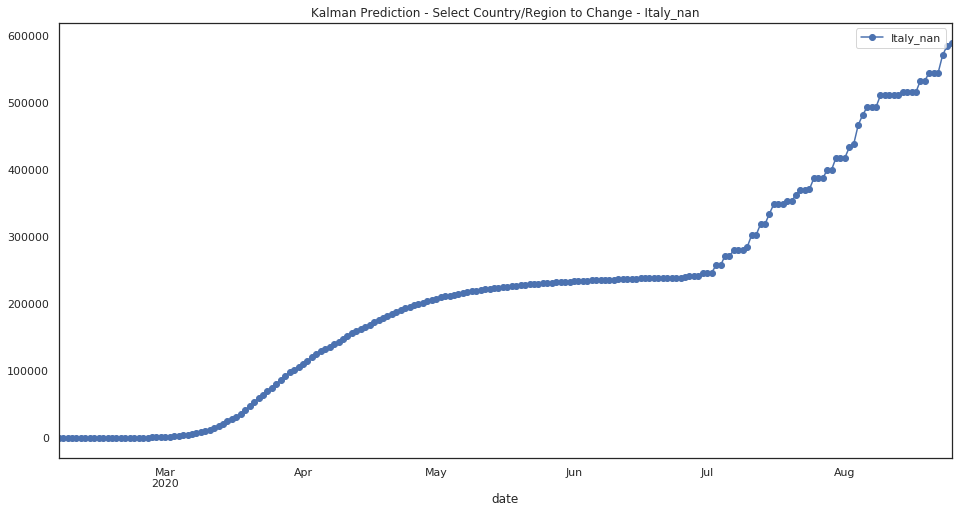

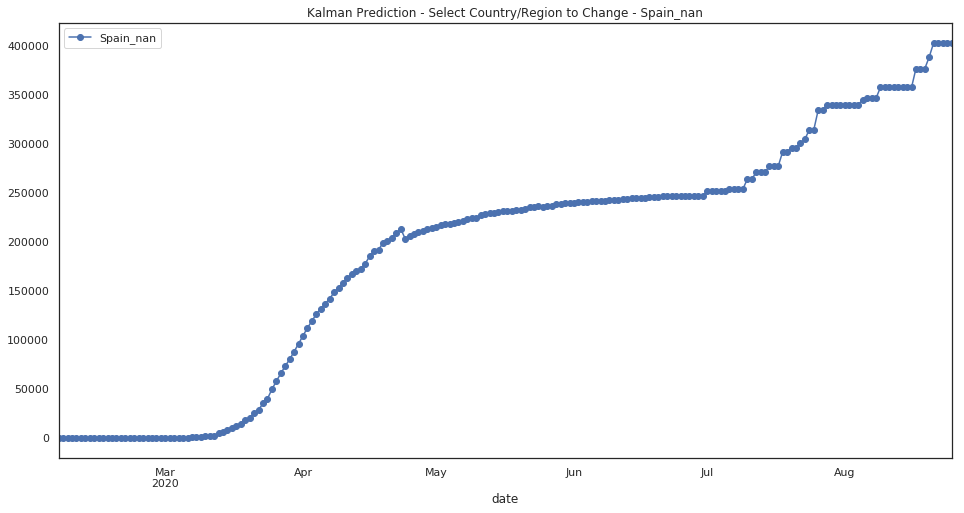

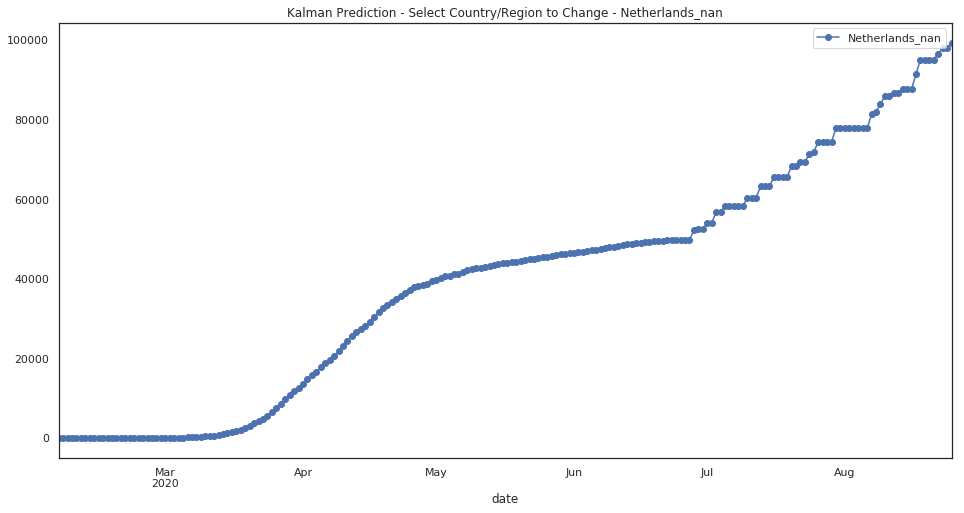

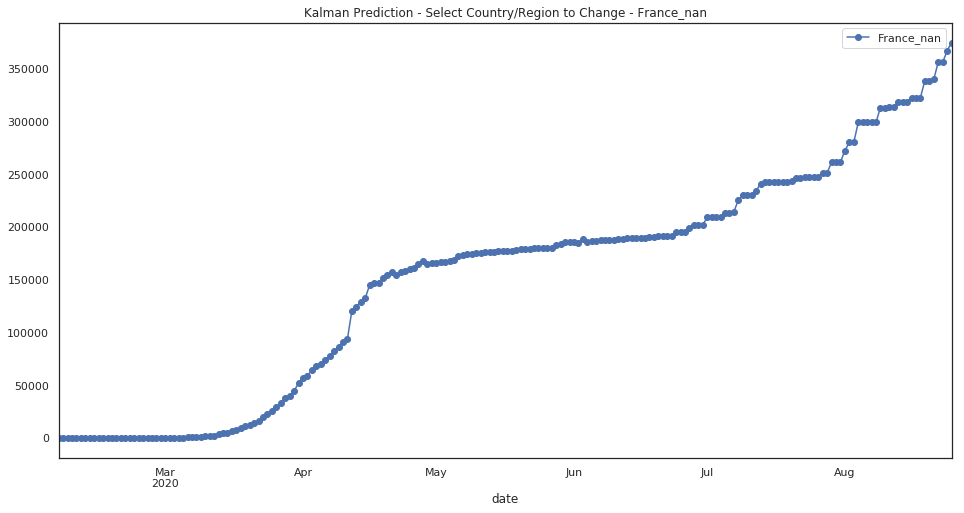

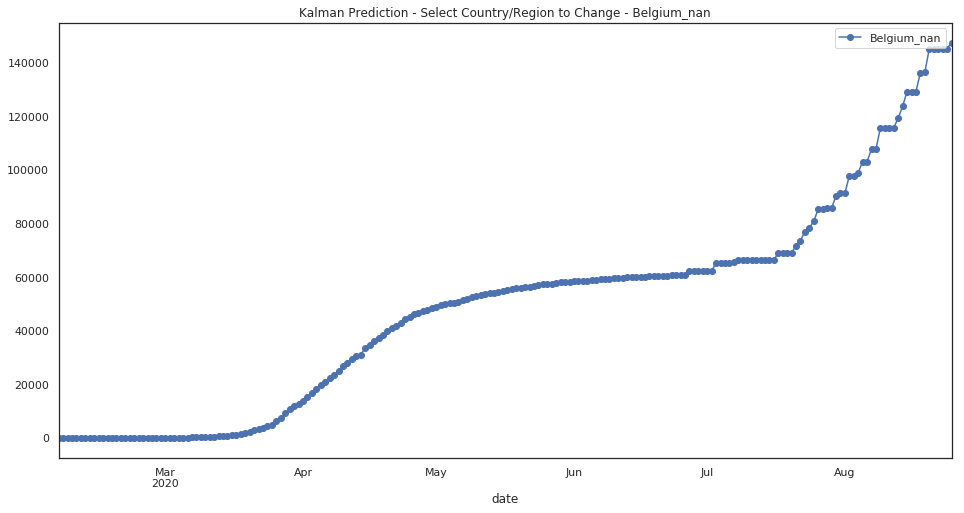

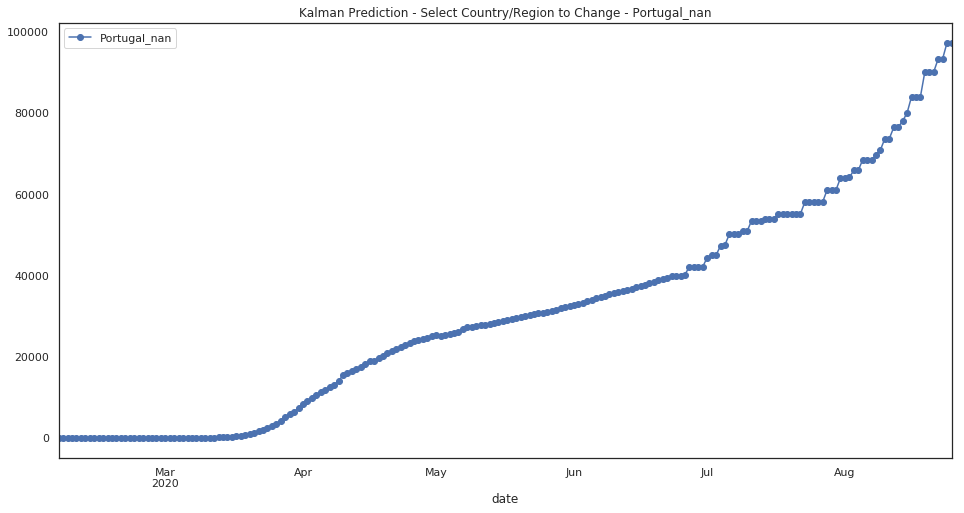

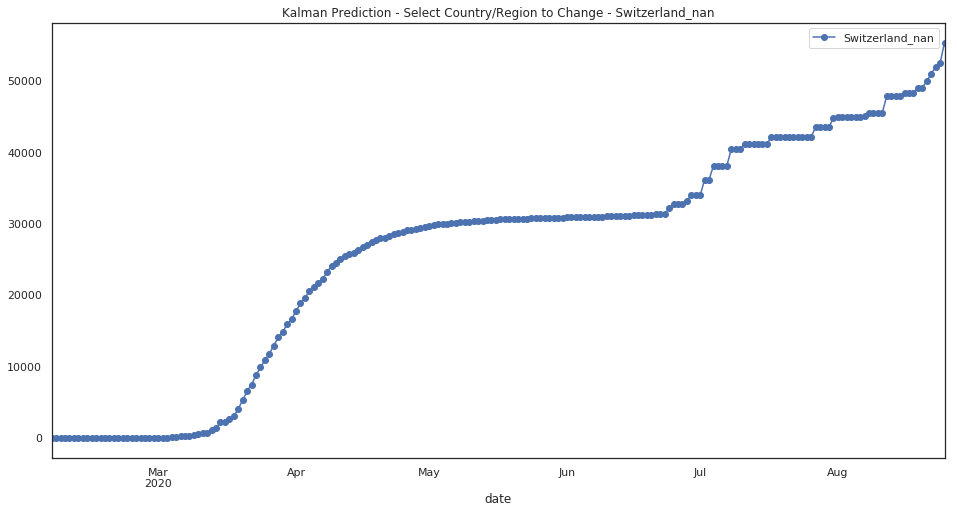

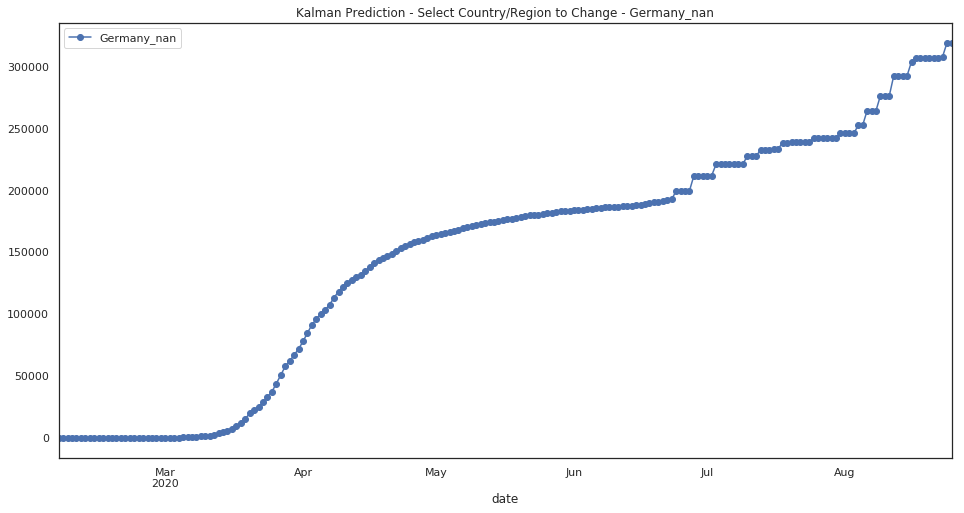

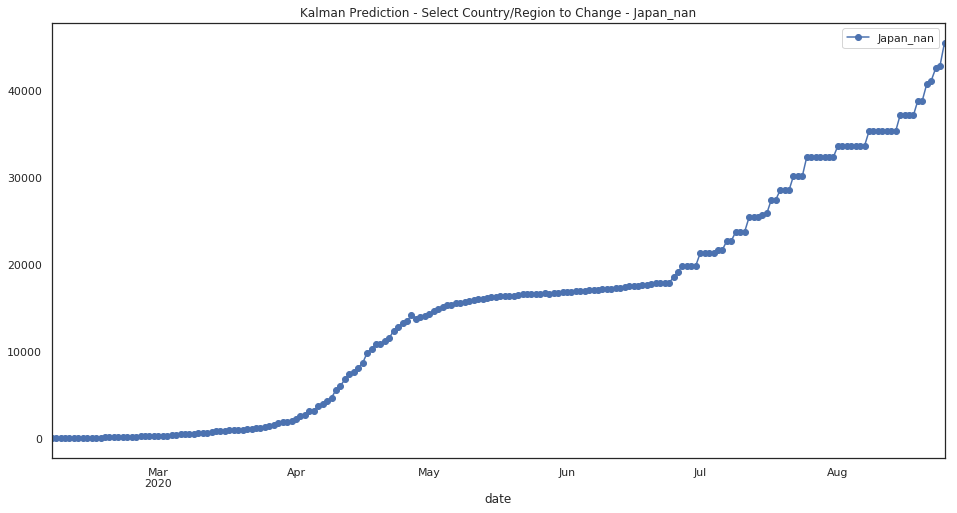

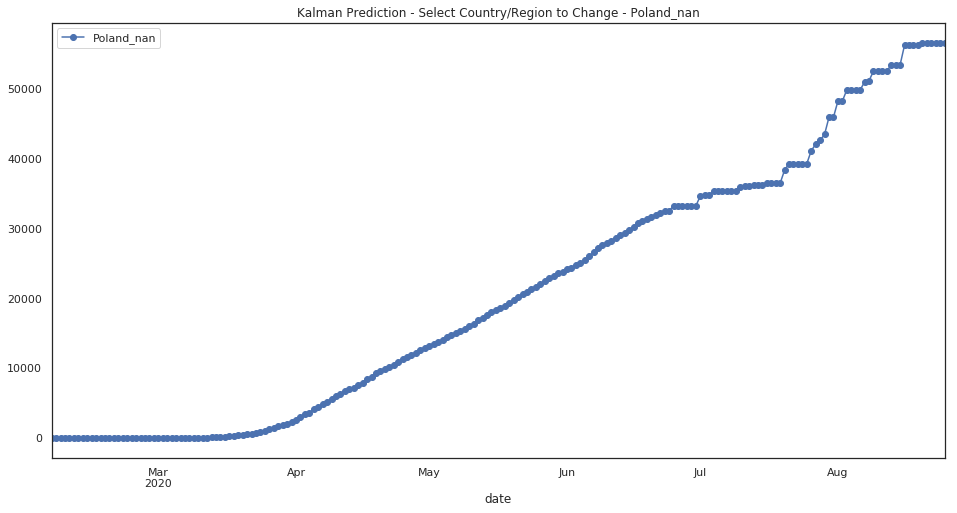

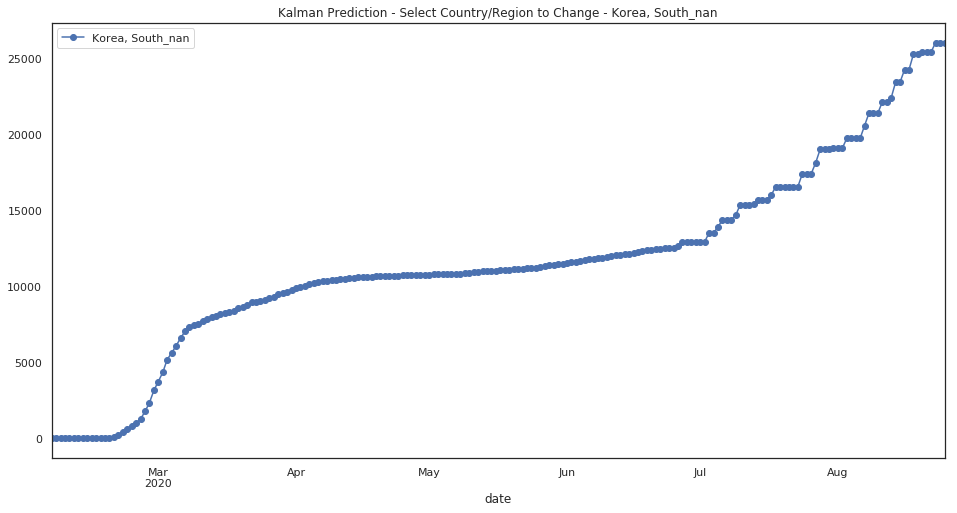

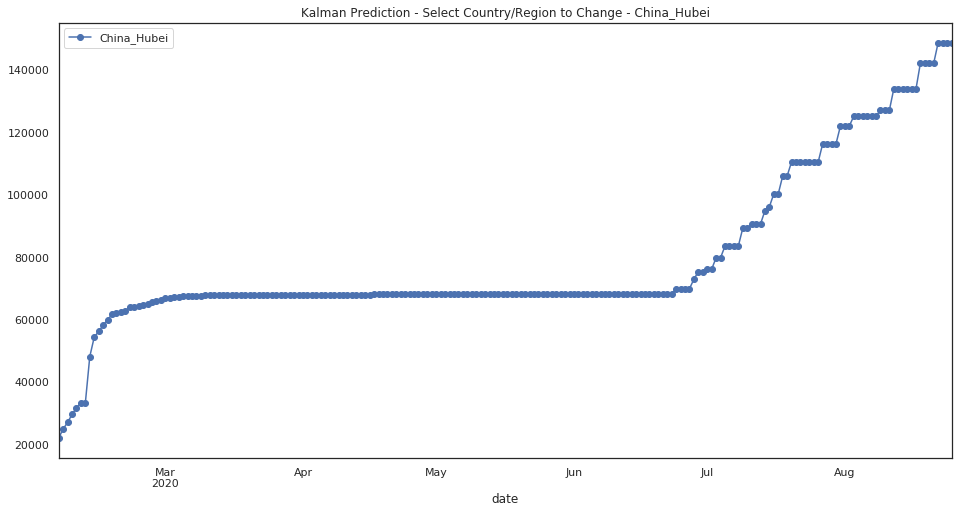

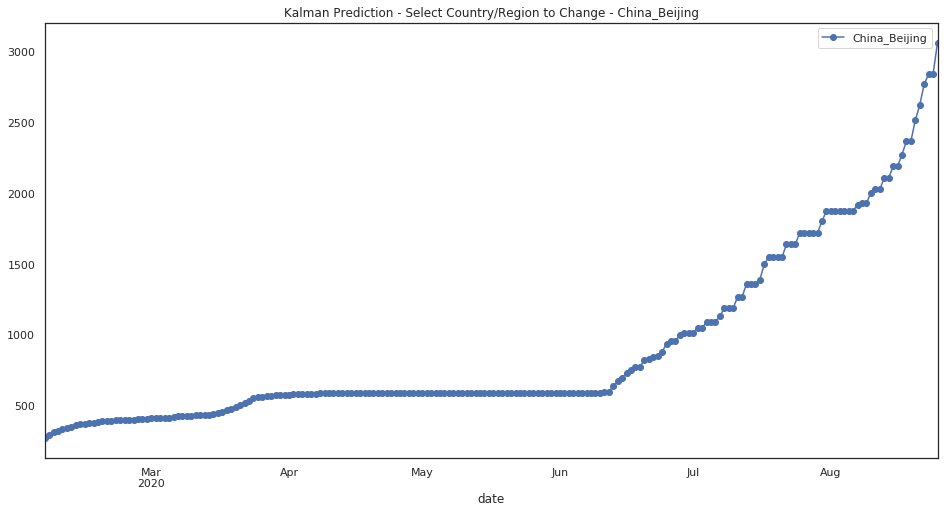

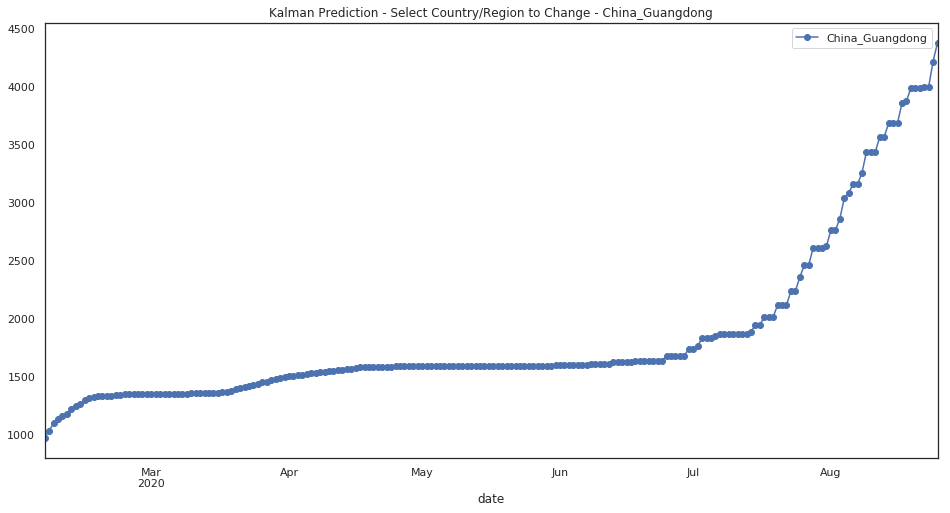

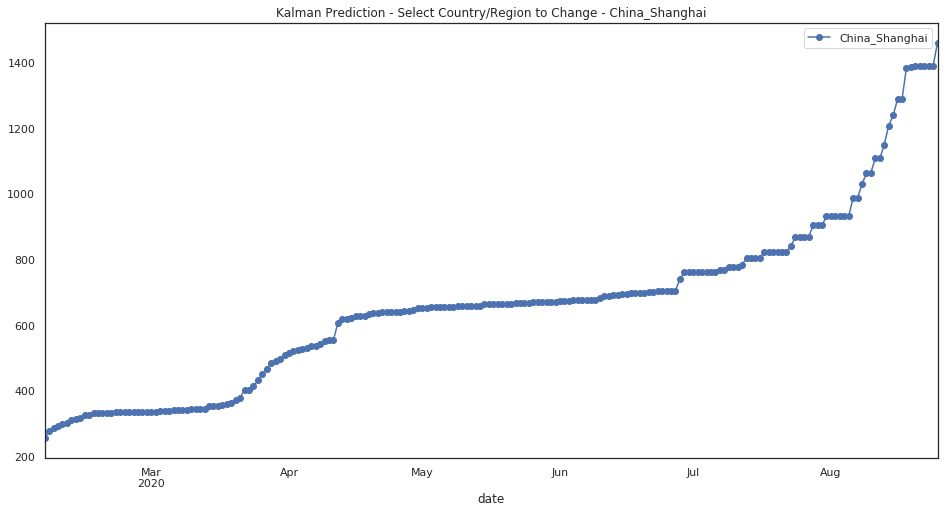

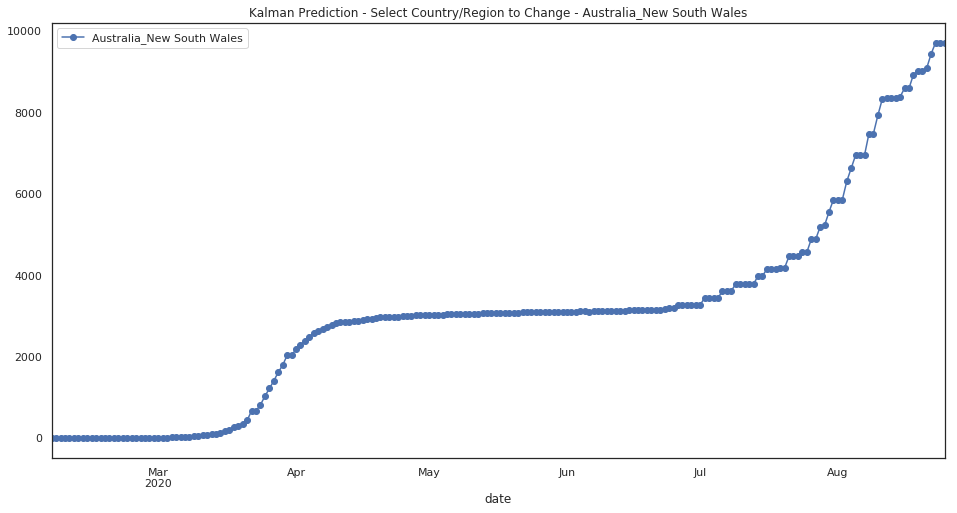

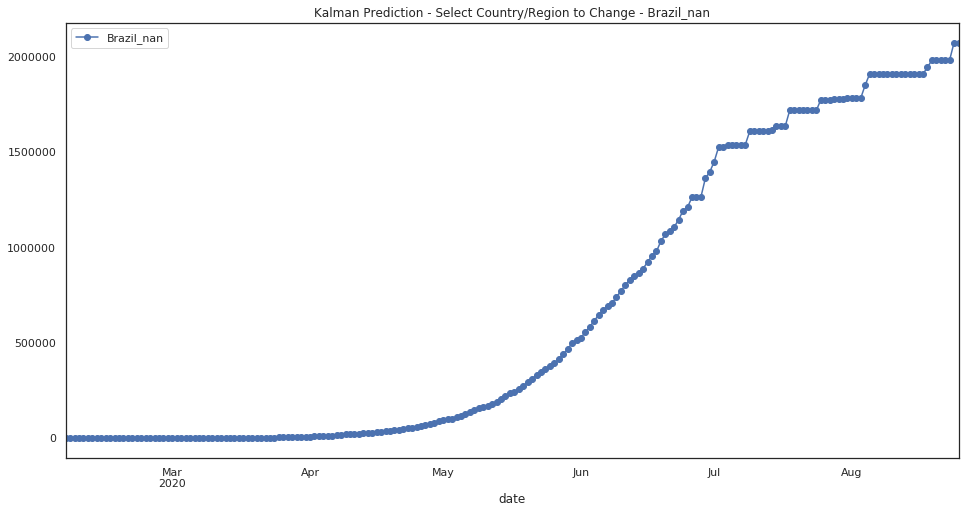

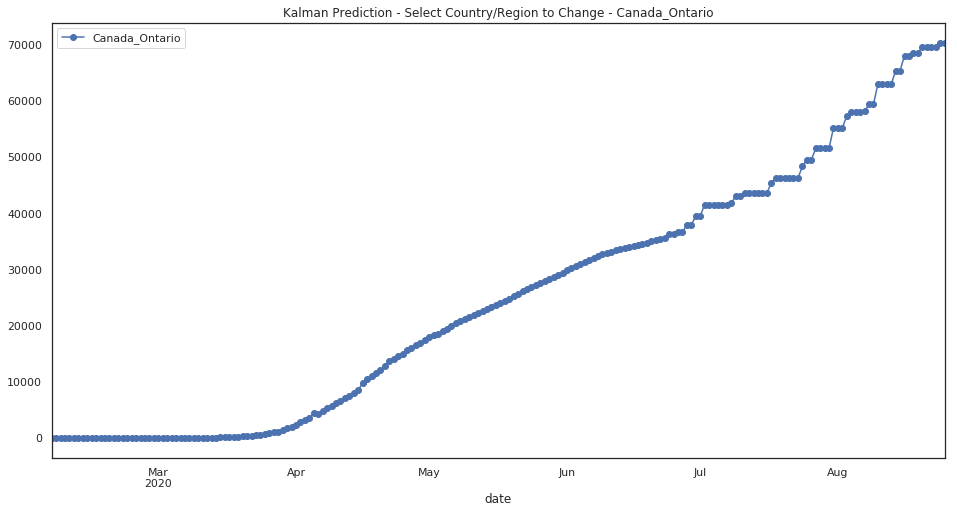

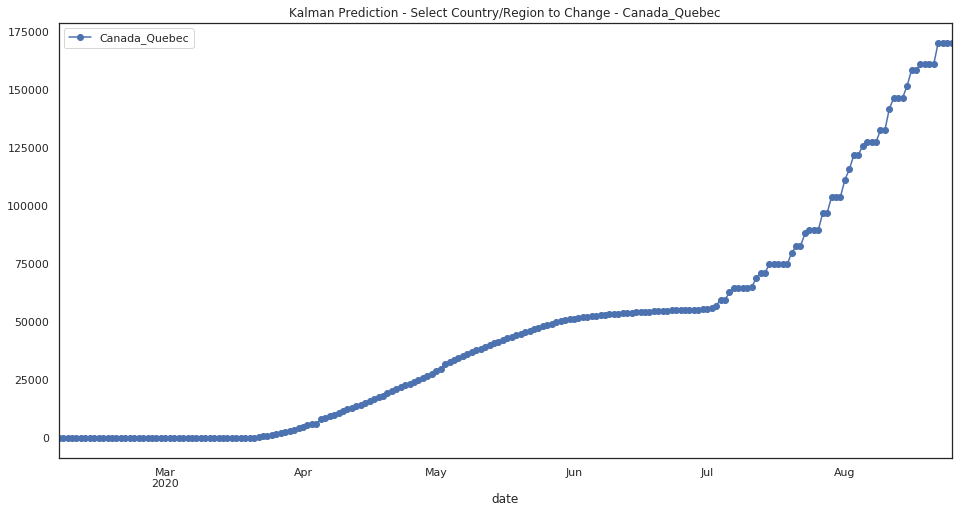

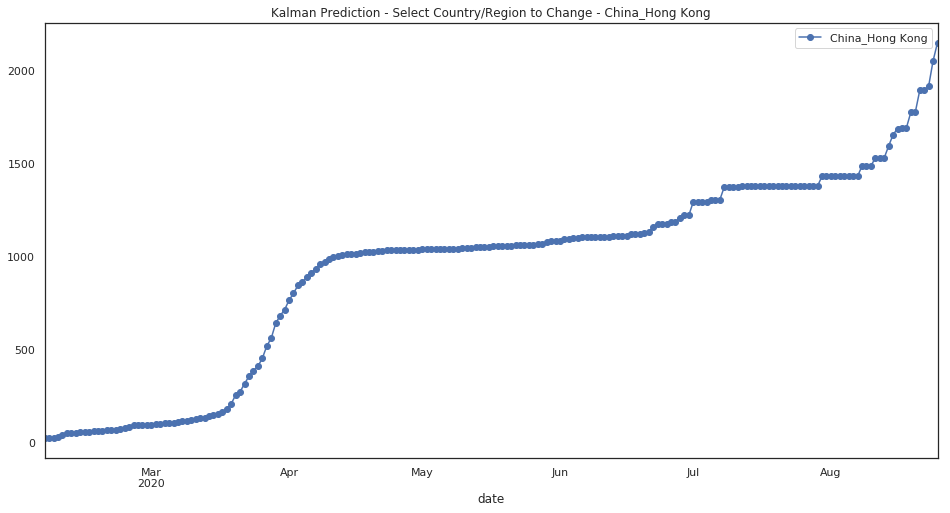

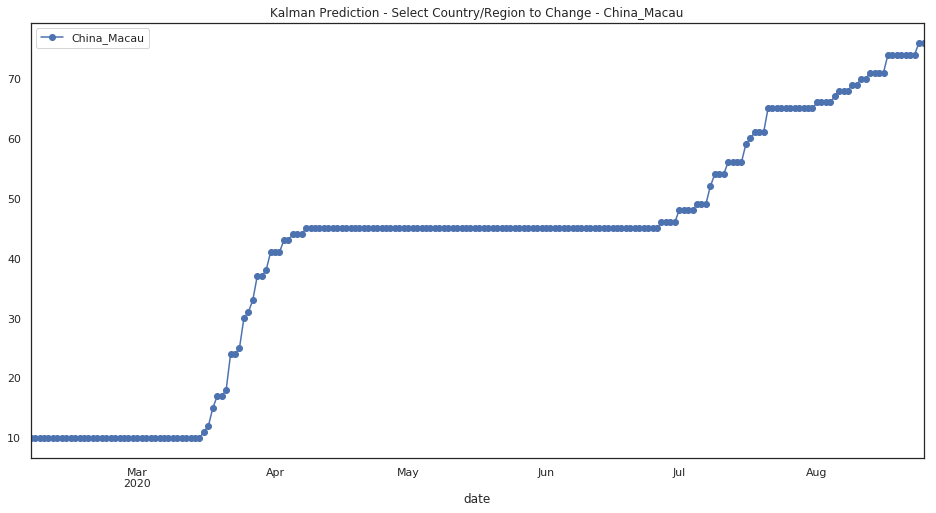

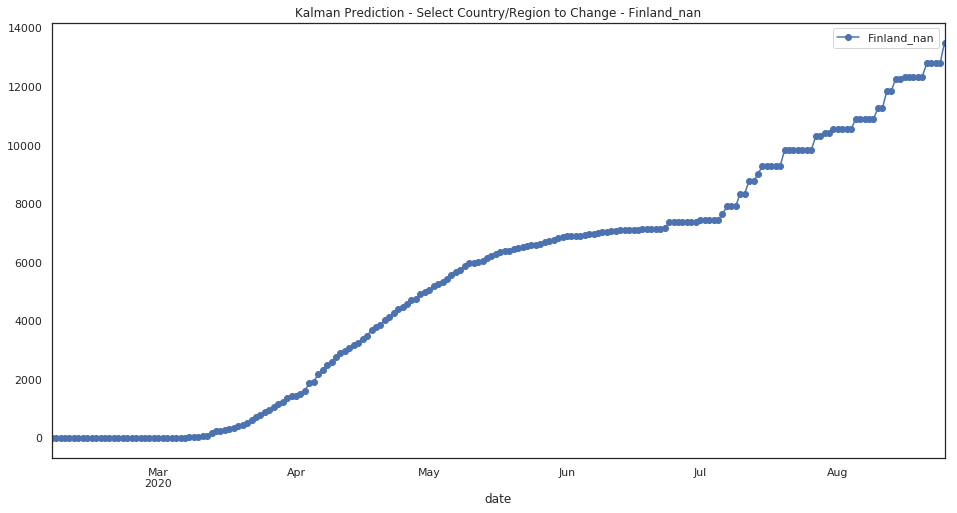

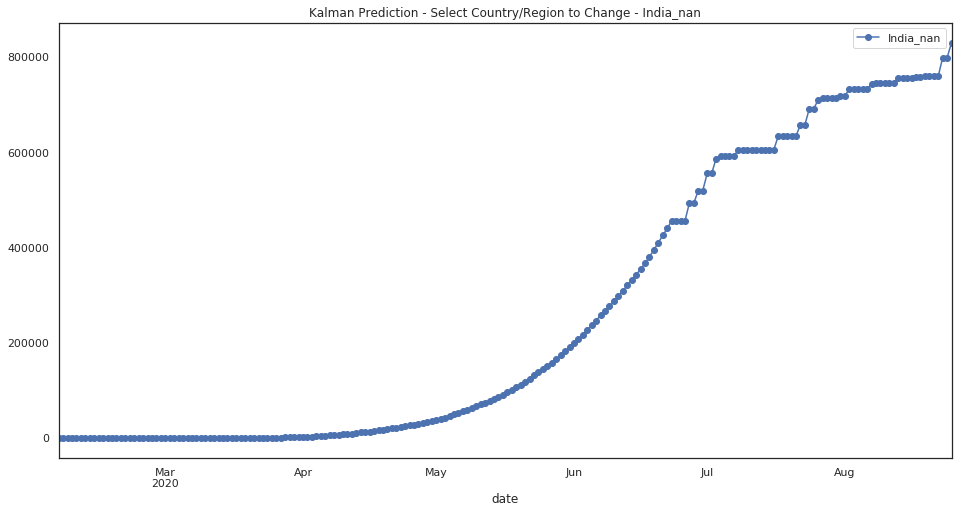

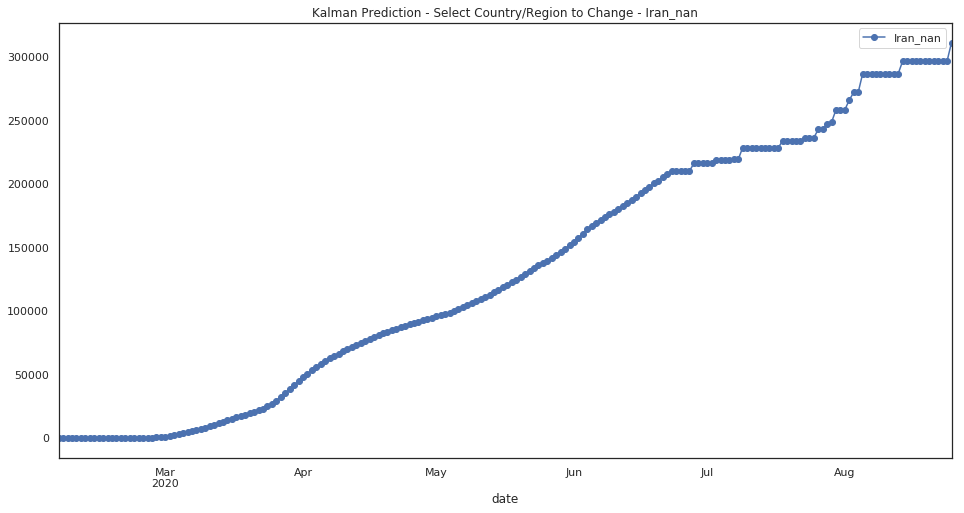

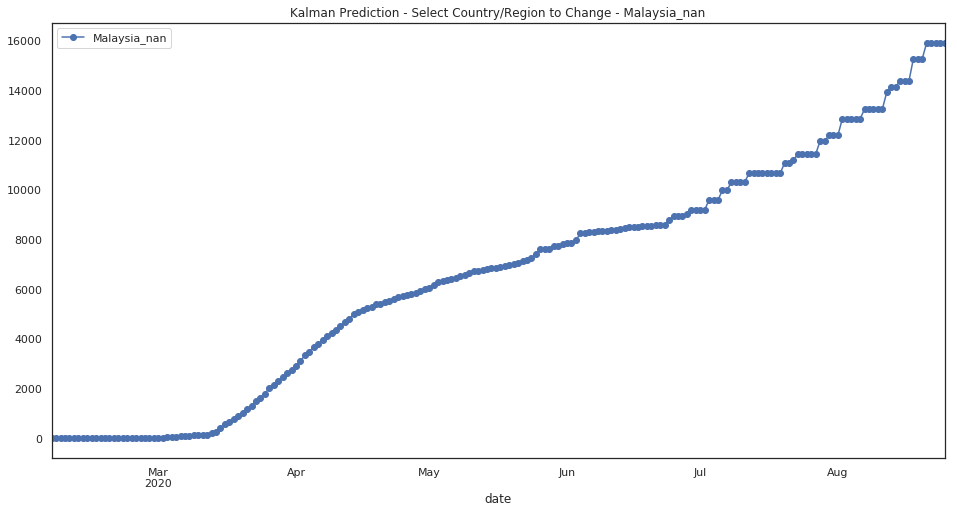

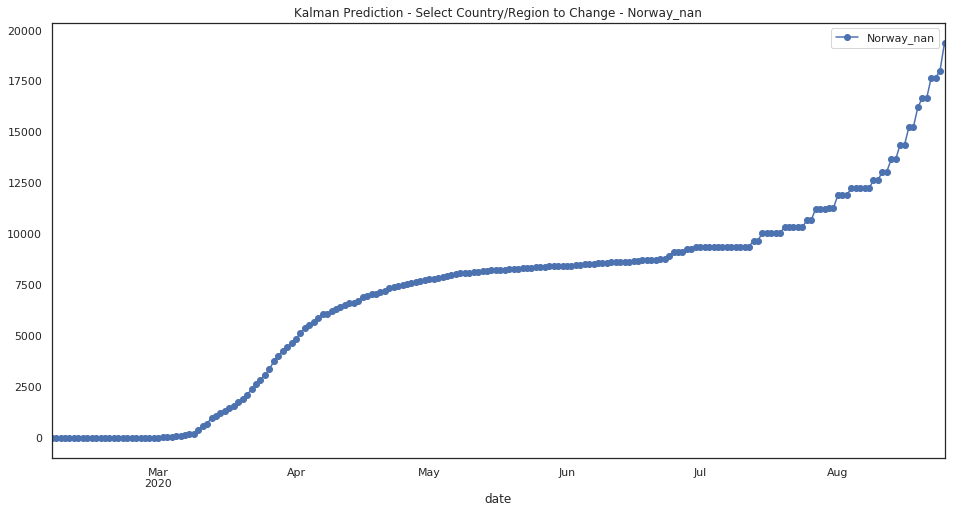

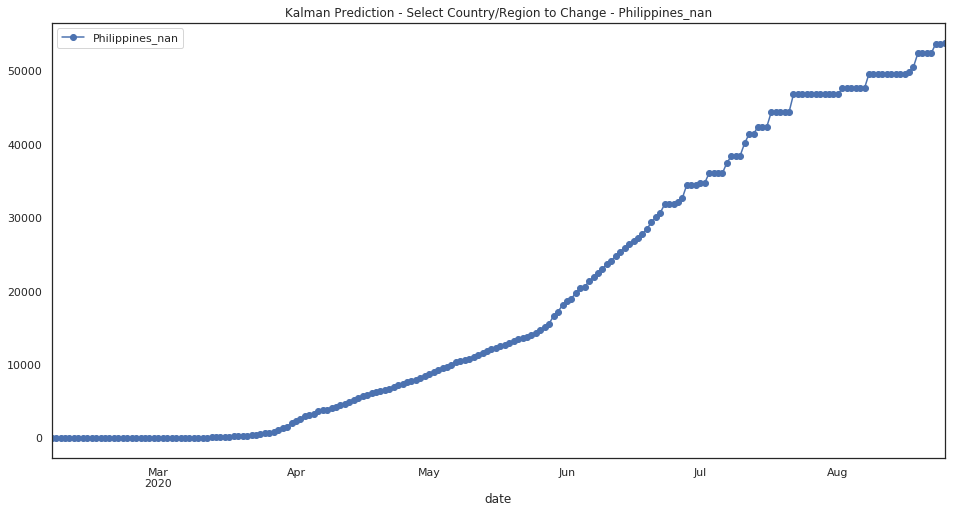

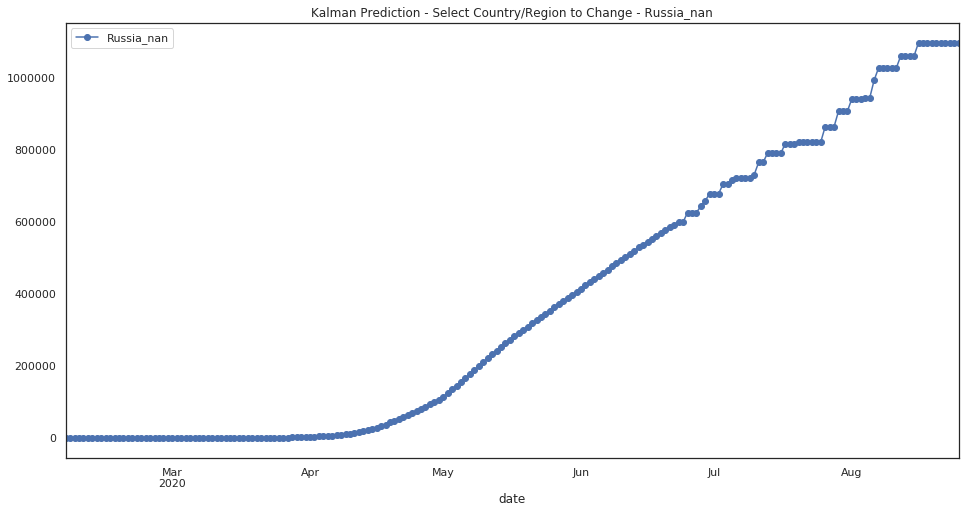

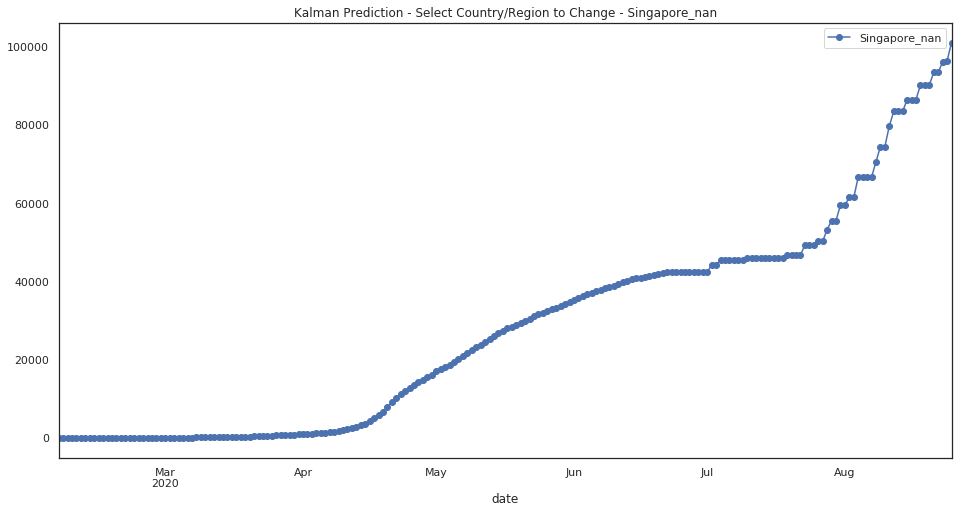

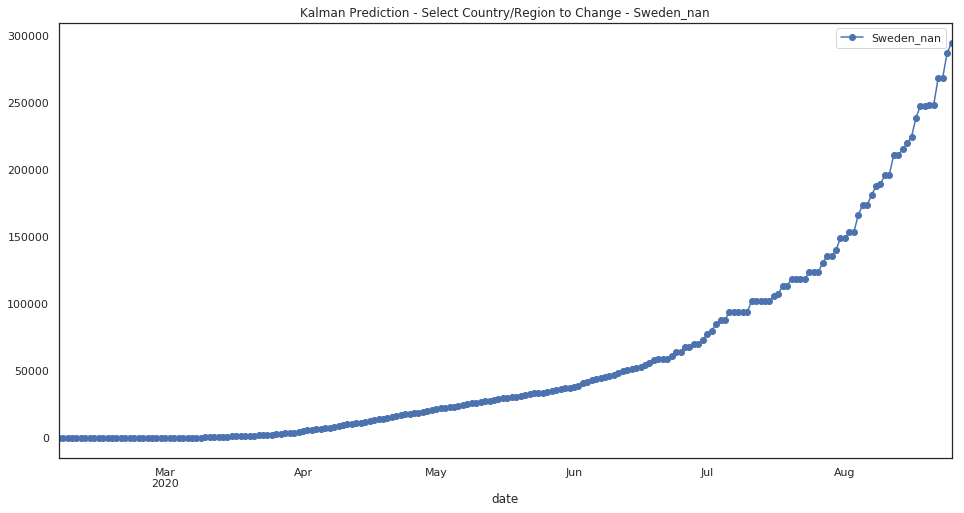

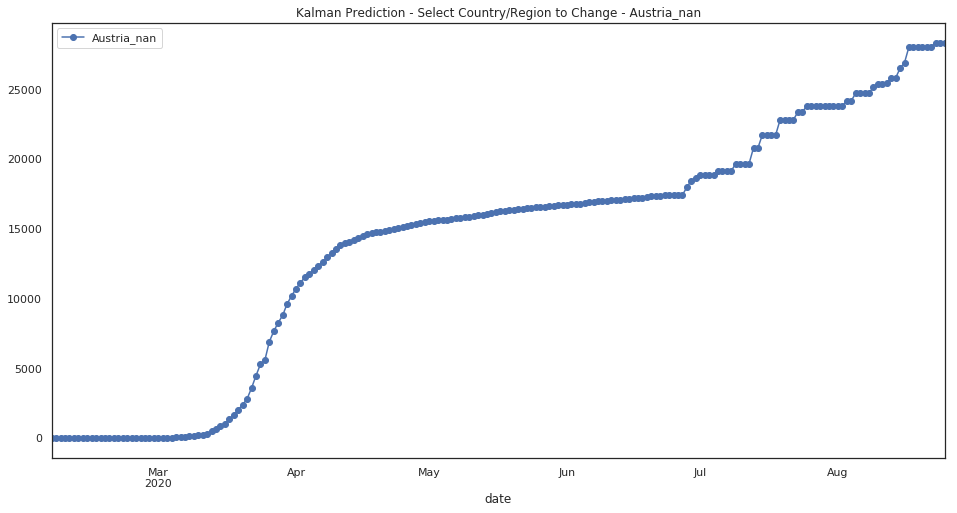

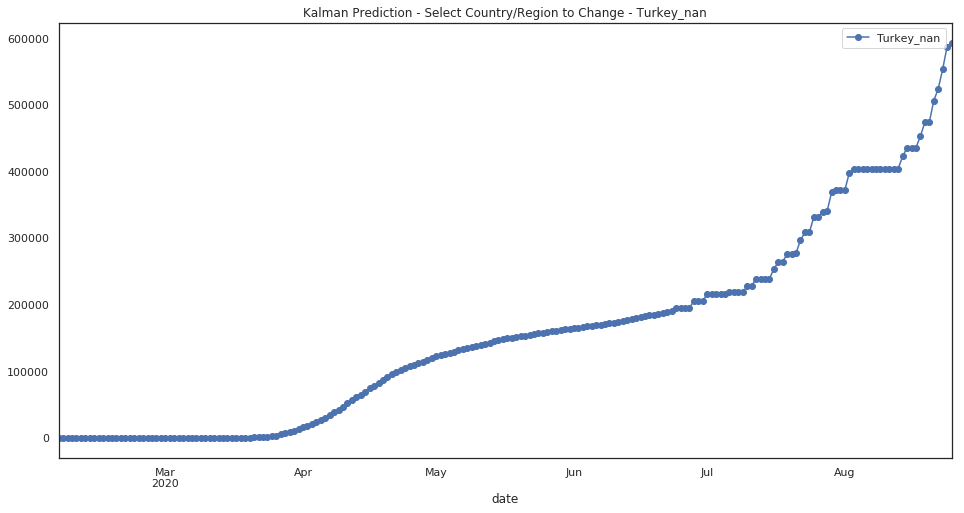

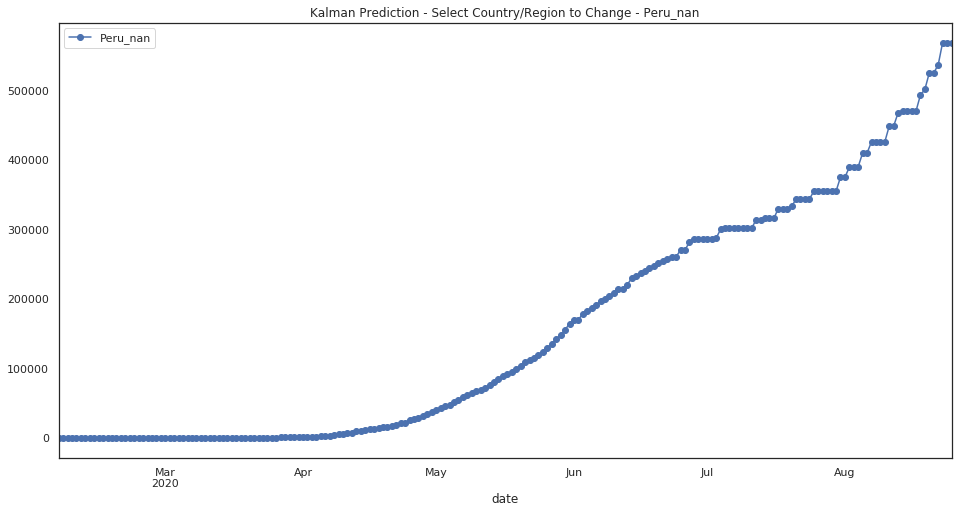

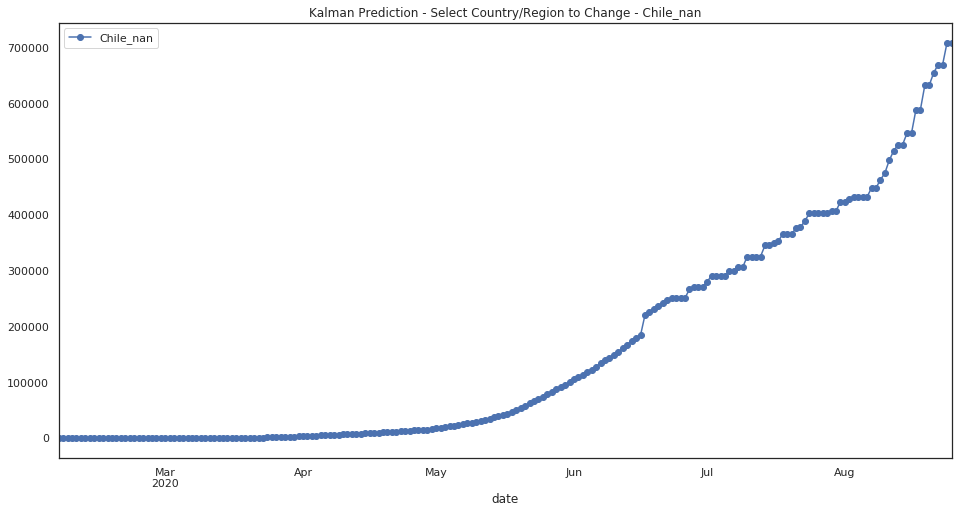

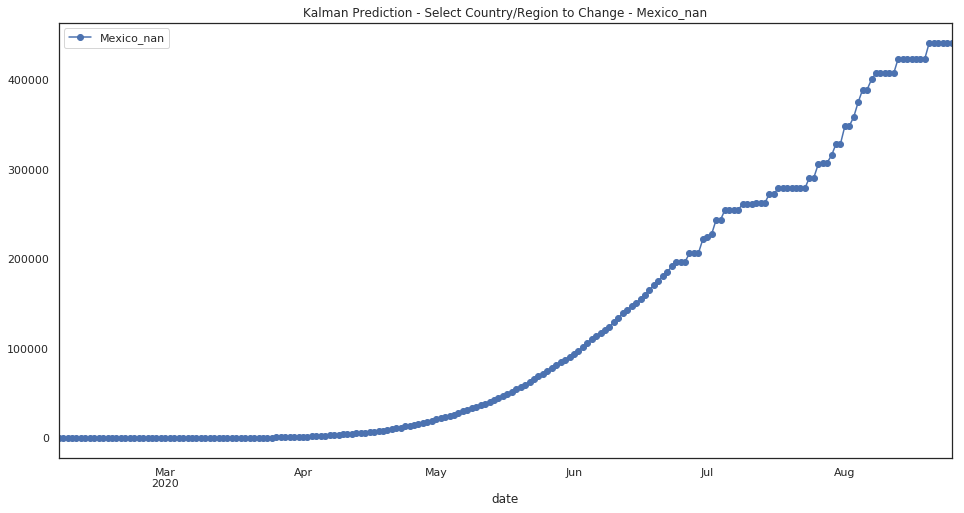

In [65]:
### Joao - Dynamic plot all regions individually
#print(region[:])
for i in range(1,len(region)):
    country_print=region[i]
    #print("here:"+country_print)
    p_kalman_rg=all_new[['date',country_print]]
    p_kalman_rg=p_kalman_rg.set_index(['date'])
    p_kalman_rg.iloc[:,:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman_rg.columns[0]))
    

In [66]:
max_p0=all_new[:]
max_p0=max_p0.max()
max_date=max_p0[:1]
max_p0=max_p0[1:]
max_p0=pd.DataFrame(max_p0)
max_p0=max_p0.astype(str)
max_p0['pred_confirmed']=max_p0[max_p0.columns[0]].str.split(' ').str[-1].astype(float)
max_p0[max_p0.columns[0]]=max_p0[max_p0.columns[0]][:-len(max_p0['pred_confirmed'])]
max_p0=max_p0.sort_values(by='pred_confirmed', ascending=False)
#
print("### -- Confirmed max cases per country at last prediction date -- ###")
print(max_date)
max_p0[:]

### -- Confirmed max cases per country at last prediction date -- ###
date    2020-08-25 00:00:00
dtype: object


0  pred_confirmed
United States_nan                             NaN       7577377.0
Brazil_nan                                    NaN       2074184.0
Russia_nan                                    NaN       1096567.0
India_nan                                     NaN        830444.0
United Kingdom_nan                            NaN        797425.0
Chile_nan                                     NaN        708597.0
Turkey_nan                                    NaN        593365.0
Italy_nan                                     NaN        588897.0
Peru_nan                                      NaN        569159.0
Pakistan_nan                                  NaN        529173.0
Saudi Arabia_nan                              NaN        505402.0
Mexico_nan                                    NaN        441348.0
Spain_nan                                     NaN        402756.0
France_nan                                    NaN        374948.0
Germany_nan                                   NaN        319077.0
Iran_nan                                      NaN        311122.0
Sweden_nan                                    NaN        295113.0
Qatar_nan                                     NaN        290153.0
South Africa_nan                              NaN        256280.0
Bangladesh_nan                                NaN        240287.0
Canada_Quebec                                 NaN        170224.0
Belarus_nan                                   NaN        159416.0
China_Hubei                                   NaN        148810.0
Belgium_nan                                   NaN        147583.0
Colombia_nan                                  NaN        137171.0
Iraq_nan                                      NaN        103337.0
Egypt_nan                                     NaN        102856.0
Singapore_nan                                 NaN        101074.0
Indonesia_nan                                 NaN        101008.0
Netherlands_nan                               NaN         99352.0
...                                           ...             ...
Antigua and Barbuda_nan                       NaN            50.0
Australia_Northern Territory                  NaN            49.0
France_New Caledonia                          NaN            47.0
Grenada_nan                                   NaN            45.0
Belize_nan                                    NaN            44.0
Saint Lucia_nan                               NaN            42.0
Laos_nan                                      NaN            40.0
Timor-Leste_nan                               NaN            39.0
Denmark_Greenland                             NaN            36.0
Papua New Guinea_nan                          NaN            34.0
Canada_Grand Princess                         NaN            33.0
United Kingdom_Turks and Caicos Islands       NaN            31.0
China_Qinghai                                 NaN            31.0
Saint Kitts and Nevis_nan                     NaN            29.0
Western Sahara_nan                            NaN            27.0
Dominica_nan                                  NaN            27.0
Canada_Yukon                                  NaN            23.0
United Kingdom_Falkland Islands (Malvinas)    NaN            23.0
United Kingdom_Montserrat                     NaN            22.0
Seychelles_nan                                NaN            14.0
Holy See_nan                                  NaN            14.0
MS Zaandam_nan                                NaN             9.0
United Kingdom_British Virgin Islands         NaN             8.0
Netherlands_Bonaire, Sint Eustatius and Saba  NaN             7.0
France_Saint Barthelemy                       NaN             6.0
Canada_Northwest Territories                  NaN             5.0
United Kingdom_Anguilla                       NaN             3.0
China_Tibet                                   NaN             1.0
Canada_Diamond Princess                       NaN             1.0
France_Saint Pierre an

In [67]:
t.to_csv(r'data/t_confirmed_global.csv', index = False, header=True)

In [68]:
all_new.to_csv(r'data/prediction_kalman_filter_global.csv', index = False, header=True)

## Iterative Regression

In [69]:
t_iter=all_new.set_index(['date'])
t_iter=t_iter.stack().reset_index(name='confirmed')
t_iter.columns=['date', 'region','confirmed']
t_iter['date']=pd.to_datetime(t_iter['date'] ,errors ='coerce')
t_iter=t_iter.sort_values(['region', 'date'])

t_iter=t_iter.reset_index(drop=True)
for i in range(1,len(t_iter)+1):
    if(t_iter.iloc[i,1] is not t_iter.iloc[i-1,1]):
        t_iter.loc[len(t_iter)+1] = [t_iter.iloc[i-1,0]+ pd.DateOffset(1),t_iter.iloc[i-1,1], 0] 
t_iter=t_iter.sort_values(['region', 'date'])
t_iter=t_iter.reset_index(drop=True)

### Joao - Fix - RuntimeWarning: divide by zero encountered in double_scalars
#
t_iter['1_day_change']=t_iter['3_day_change']=t_iter['7_day_change']=t_iter['1_day_change_rate']=t_iter['3_day_change_rate']=t_iter['7_day_change_rate']=t_iter['last_day']=0
for i in range(1,len(t_iter)):
    if(t_iter.iloc[i,1] is t_iter.iloc[i-2,1]):
        t_iter.iloc[i,3]=t_iter.iloc[i-1,2]-t_iter.iloc[i-2,2]
        t_iter.iloc[i,6]=((t_iter.iloc[i-1,2]*100 +1)/(t_iter.iloc[i-2,2]*100 -1 +1))*100
        t_iter.iloc[i,9]=t_iter.iloc[i-1,2]
    if(t_iter.iloc[i,1] is t_iter.iloc[i-4,1]):
        t_iter.iloc[i,4]=t_iter.iloc[i-1,2]-t_iter.iloc[i-4,2]
        t_iter.iloc[i,7]=((t_iter.iloc[i-1,2]*100 +1)/(t_iter.iloc[i-4,2]*100 -1 +1))*100
    if(t_iter.iloc[i,1] is t_iter.iloc[i-8,1]):
        t_iter.iloc[i,5]=t_iter.iloc[i-1,2]-t_iter.iloc[i-8,2]
        t_iter.iloc[i,8]=((t_iter.iloc[i-1,2]*100 +1)/(t_iter.iloc[i-8,2]*100 -1 +1))*100
t_iter=t_iter.fillna(0)  

# t_iter=t_iter.merge(temp[['date','region', 'X']],how='left',on=['date','region'])
# t_iter=t_iter.rename(columns = {'X':'kalman_prediction'}) 
t_iter=t_iter.replace([np.inf, -np.inf], 0)
t_iter['kalman_prediction']=round(t_iter['confirmed'])

test_iter=t_iter.merge(confirmed[['region',' Population ']],how='left',on='region')
test_iter=test_iter.rename(columns = {' Population ':'population'})
test_iter['population']=test_iter['population'].str.replace(r" ", '')
test_iter['population']=test_iter['population'].str.replace(r",", '')
test_iter['population']=test_iter['population'].fillna(10000000) # Fill 10M population if null
test_iter['population']=test_iter['population'].astype('int32')
## Joao - Fix Divid By Zero
#test_iter['infected_rate'] =test_iter['last_day']/test_iter['population']*10000
#test_iter['infected_rate'] =((test_iter['last_day']+1)*10000)/((test_iter['population']+1)*100)*100
test_iter['infected_rate']=(((test_iter['last_day'] +1)*100)/((test_iter['population'] +1)*100000) *10)
#
test_iter=test_iter.merge(w,how='left',on=['date','region'])
#test_iter=test_iter.sort_values(['region', 'date'])

test_iter_temp=test_iter[np.isnan(test_iter['min'])]
test_iter_temp=test_iter_temp.drop(columns=['min', 'max'])
test_iter_temp=test_iter_temp.merge(w_forecast,how='left',on=['date','region'])
test_iter=test_iter.dropna()
test_iter=test_iter.append(test_iter_temp)
test_iter=test_iter.sort_values(['region', 'date'])
### fill missing weather 
for i in range(0,len(test_iter)):
    if(np.isnan(test_iter.iloc[i,13])):
        if(test_iter.iloc[i,1] is test_iter.iloc[i-1,1]):
            test_iter.iloc[i,13]=test_iter.iloc[i-1,13]+abs(test_iter.iloc[i-1,13]*.01)
            test_iter.iloc[i,14]=test_iter.iloc[i-1,14]+abs(test_iter.iloc[i-1,14]*.01)


/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in double_scalars
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in double_scalars
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in double_scalars


In [70]:
test_iter=test_iter.fillna(0) 
test_iter[test_iter.isnull().any(axis=1)]


Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, 1_day_change_rate, 3_day_change_rate, 7_day_change_rate, last_day, kalman_prediction, population, infected_rate, min, max]
Index: []

In [71]:
### JOAO - ERROR - ValueError: Index contains duplicate entries, cannot reshape
pred=reg.predict(test_iter[x_col]); pred=pd.DataFrame(pred); pred.columns = ['prediction'];pred=round(pred)
pred['confirmed']=test_iter['confirmed'].values; pred['date']=test_iter['date'].values; pred['region']=test_iter['region'].values

for i in range(1,len(pred)):
    if(pred.iloc[i,3] is pred.iloc[i-1,3]):
        if(pred.iloc[i,0]<pred.iloc[i-1,1]):
            pred.iloc[i,0]=pred.iloc[i-1,1]
### JOAO - Drop Duplicates
pred=pred.drop_duplicates(subset=['date','region'], keep='last', inplace=False)        
### Joao - Save long term predictions
pred.to_csv('data/pred_'+str(num_days_R_prediction)+'_days.csv', index = False, header=True)
###
pred=pred.pivot(index='date',columns='region',values='prediction') # pivot pred df

In [72]:
pred[:]

region      Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  \
date                                                                 
2020-02-06              5.0          5.0          5.0          5.0   
2020-02-07              5.0          5.0          5.0          5.0   
2020-02-08              5.0          5.0          5.0          5.0   
2020-02-09              5.0          5.0          5.0          5.0   
2020-02-10              5.0          5.0          5.0          5.0   
2020-02-11              5.0          5.0          5.0          5.0   
2020-02-12              5.0          5.0          5.0          5.0   
2020-02-13              5.0          5.0          5.0          5.0   
2020-02-14              5.0          5.0          5.0          5.0   
2020-02-15              5.0          5.0          5.0          5.0   
2020-02-16              5.0          5.0          5.0          5.0   
2020-02-17              5.0          5.0          5.0          5.0   
2020-02-18             33.0          5.0         34.0          5.0   
2020-02-19             18.0          5.0         37.0          5.0   
2020-02-20             28.0          5.0         36.0          5.0   
2020-02-21             34.0          5.0         39.0          5.0   
2020-02-22             30.0          5.0         38.0          5.0   
2020-02-23             28.0          5.0         34.0          5.0   
2020-02-24             34.0          5.0         41.0          5.0   
2020-02-25             35.0          5.0         36.0          5.0   
2020-02-26             17.0          5.0         38.0          5.0   
2020-02-27             36.0          5.0         43.0          5.0   
2020-02-28             22.0          5.0         33.0          5.0   
2020-02-29             23.0          5.0         39.0          5.0   
2020-03-01             25.0          5.0         37.0          5.0   
2020-03-02             27.0          5.0         38.0          5.0   
2020-03-03             29.0          5.0         43.0          6.0   
2020-03-04             23.0          5.0         68.0          3.0   
2020-03-05             23.0          5.0        116.0          3.0   
2020-03-06             24.0          5.0         88.0          7.0   
...                     ...          ...          ...          ...   
2020-07-28          40472.0       2943.0      15211.0       1244.0   
2020-07-29          41483.0       2943.0      15212.0       1244.0   
2020-07-30          43257.0       3017.0      15215.0       1244.0   
2020-07-31          42172.0       3261.0      15216.0       1297.0   
2020-08-01          43538.0       3317.0      15552.0       1307.0   
2020-08-02          45909.0       3340.0      16143.0       1361.0   
2020-08-03          45998.0       3643.0      15843.0       1361.0   
2020-08-04          48853.0       3683.0      15954.0       1361.0   
2020-08-05          47173.0       3603.0      16233.0       1361.0   
2020-08-06          47173.0       3603.0      16843.0       1361.0   
2020-08-07          48889.0       3616.0      16449.0       1361.0   
2020-08-08          52058.0       3745.0      16450.0       1432.0   
2020-08-09          50211.0       3800.0      16475.0       1432.0   
2020-08-10          50211.0       3837.0      16476.0       1432.0   
2020-08-11          50211.0       4009.0      16482.0       1477.0   
2020-08-12          50261.0       4017.0      16511.0       1477.0   
2020-08-13          51584.0       4220.0      16833.0       1477.0   
2020-08-14          53671.0       4116.0      17337.0       1477.0   
2020-08-15          54046.0       4116.0      17230.0       1477.0   
2020-08-16          56962.0       4116.0      17480.0       1477.0   
2020-08-17          55165.0       4221.0      18119.0       1477.0   
2020-08-18          55876.0       4447.0      18029.0       1477.0   
2020-08-19          57548.0       4358.0      18596.0       1477.0   
2020-08-20          57116.0       4486.0      18649.0       1477.0   
2020-08-21

In [73]:
### JOAO - FIX - issue if all source days ts[:]
## Comment for -35days start. 26feb.2020 ts=ts[35:]
#pred=pred[:-1]

In [74]:
region1=max_p0[max_p0.columns[0]].astype(str).reset_index().rename(columns={"index": "region"}).get_values()
region=[region[0] for region in region1]
region

['United States_nan',
 'Brazil_nan',
 'Russia_nan',
 'India_nan',
 'United Kingdom_nan',
 'Chile_nan',
 'Turkey_nan',
 'Italy_nan',
 'Peru_nan',
 'Pakistan_nan',
 'Saudi Arabia_nan',
 'Mexico_nan',
 'Spain_nan',
 'France_nan',
 'Germany_nan',
 'Iran_nan',
 'Sweden_nan',
 'Qatar_nan',
 'South Africa_nan',
 'Bangladesh_nan',
 'Canada_Quebec',
 'Belarus_nan',
 'China_Hubei',
 'Belgium_nan',
 'Colombia_nan',
 'Iraq_nan',
 'Egypt_nan',
 'Singapore_nan',
 'Indonesia_nan',
 'Netherlands_nan',
 'Portugal_nan',
 'Bolivia_nan',
 'Argentina_nan',
 'Ukraine_nan',
 'Ecuador_nan',
 'United Arab Emirates_nan',
 'Armenia_nan',
 'Canada_Ontario',
 'Oman_nan',
 'Kuwait_nan',
 'Dominican Republic_nan',
 'Afghanistan_nan',
 'Poland_nan',
 'Switzerland_nan',
 'Israel_nan',
 'Philippines_nan',
 'Kazakhstan_nan',
 'Bahrain_nan',
 'Romania_nan',
 'Panama_nan',
 'Nigeria_nan',
 'Japan_nan',
 'Guatemala_nan',
 'Ireland_nan',
 'Azerbaijan_nan',
 'Ghana_nan',
 'Honduras_nan',
 'Moldova_nan',
 'Cameroon_nan',
 'Au

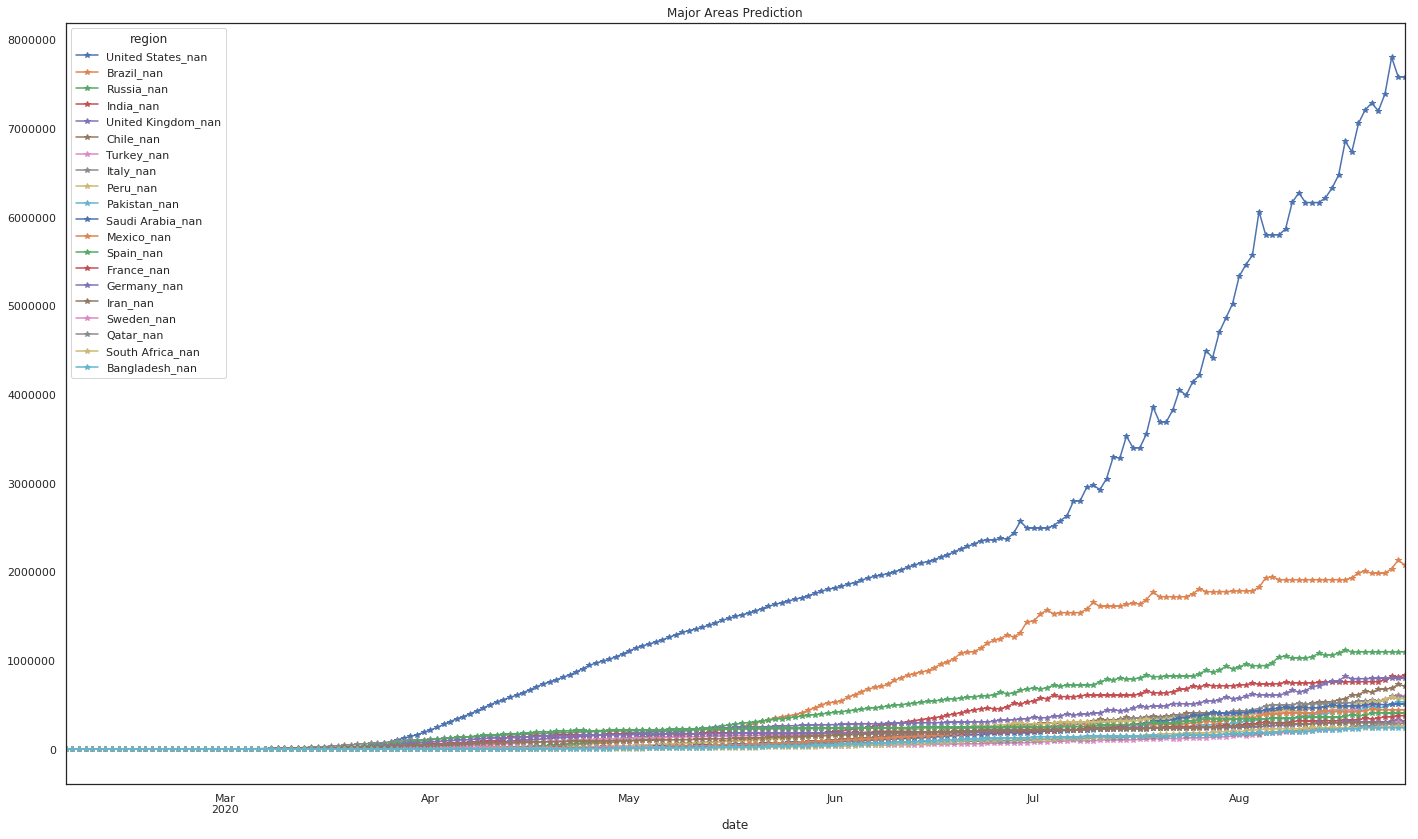

In [75]:
#
p=pred[region[:20]]
p[:].reindex(p.max().sort_values(ascending=False).index, axis=1).plot(marker='*',figsize=(24,14),title ='Major Areas Prediction')

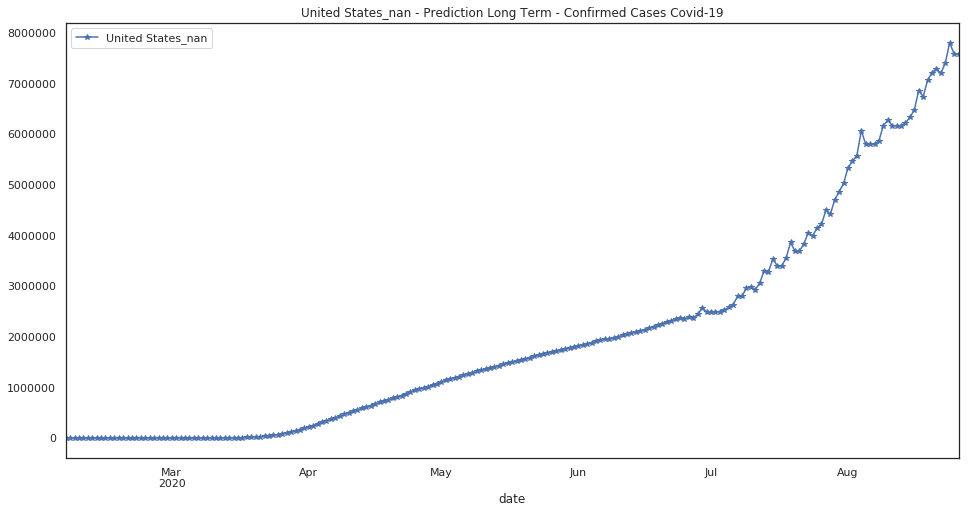

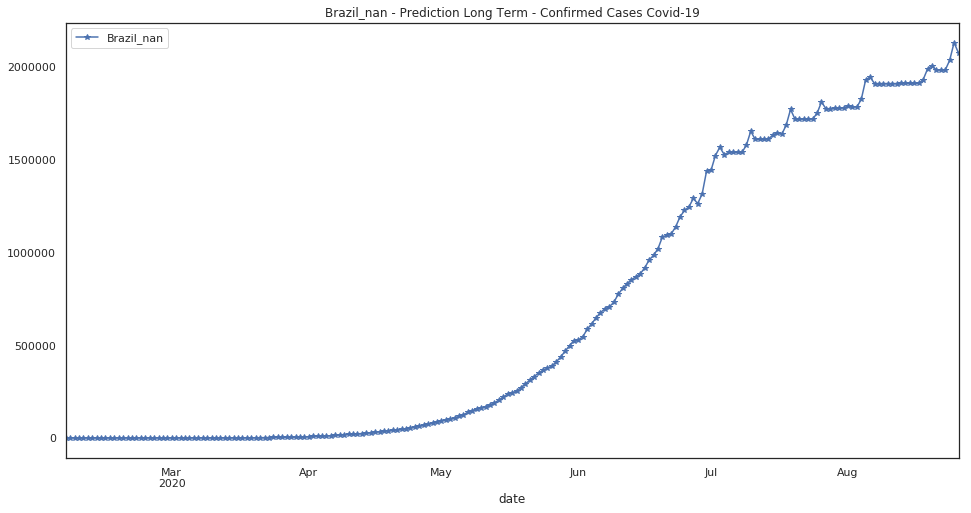

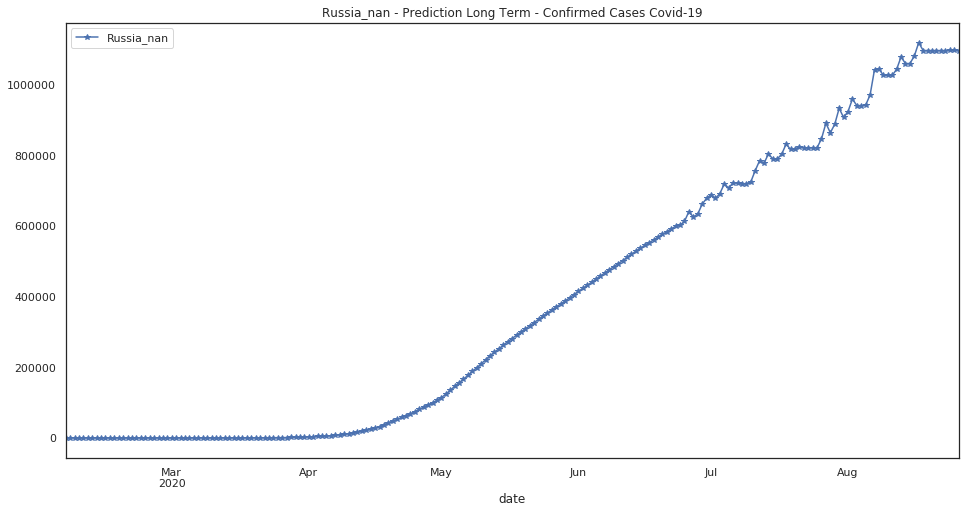

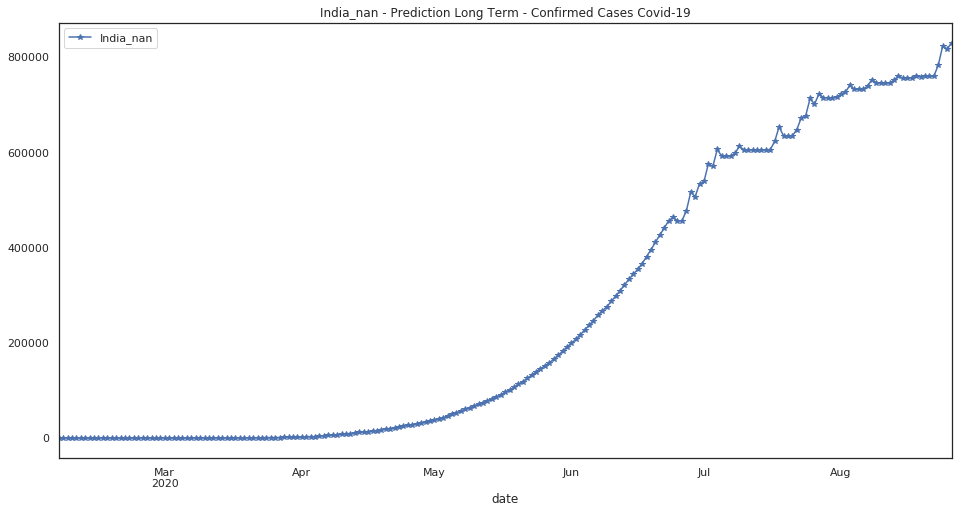

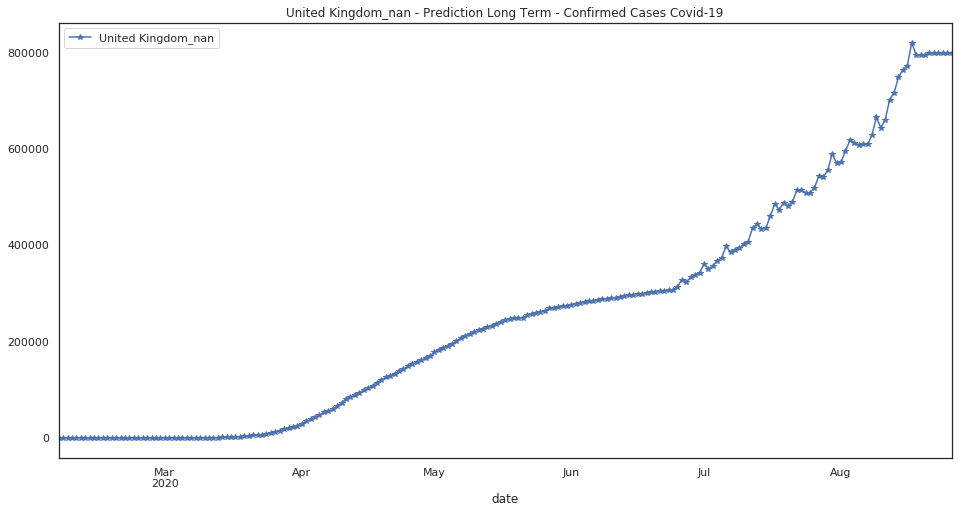

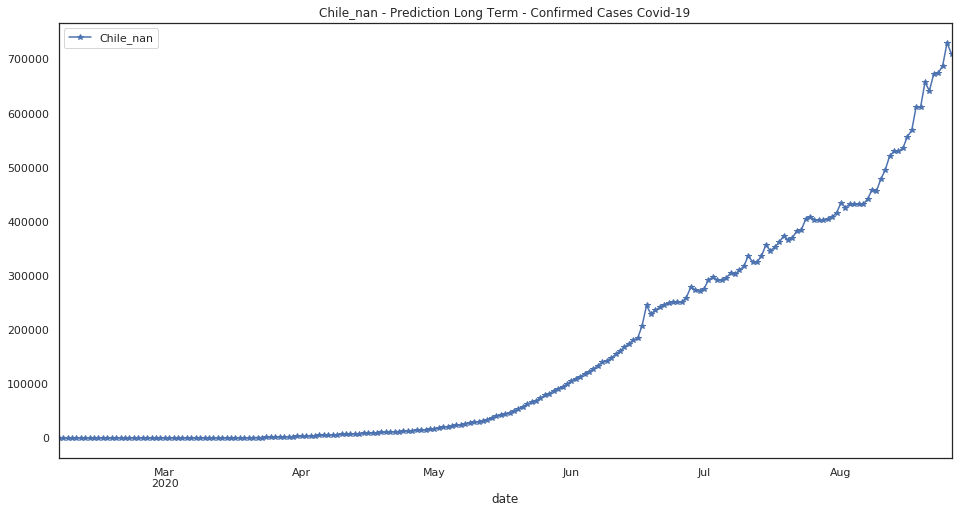

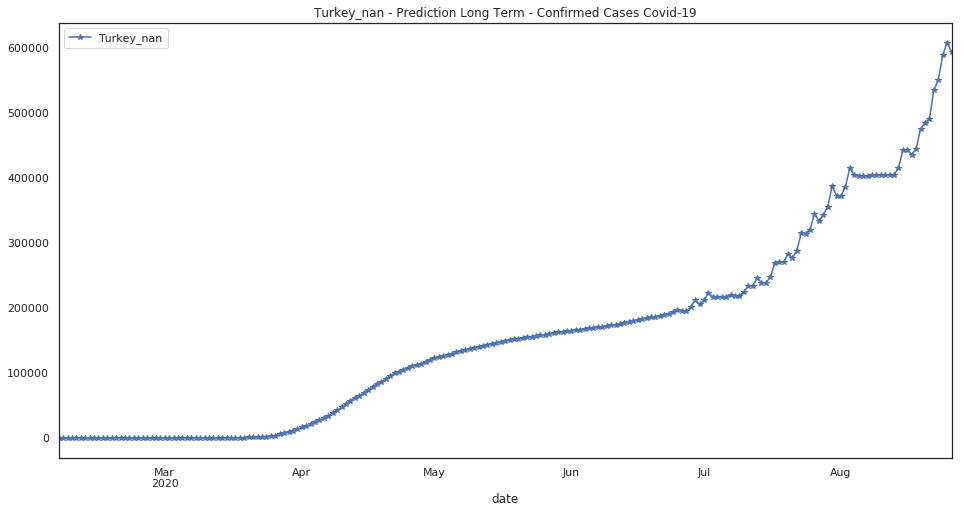

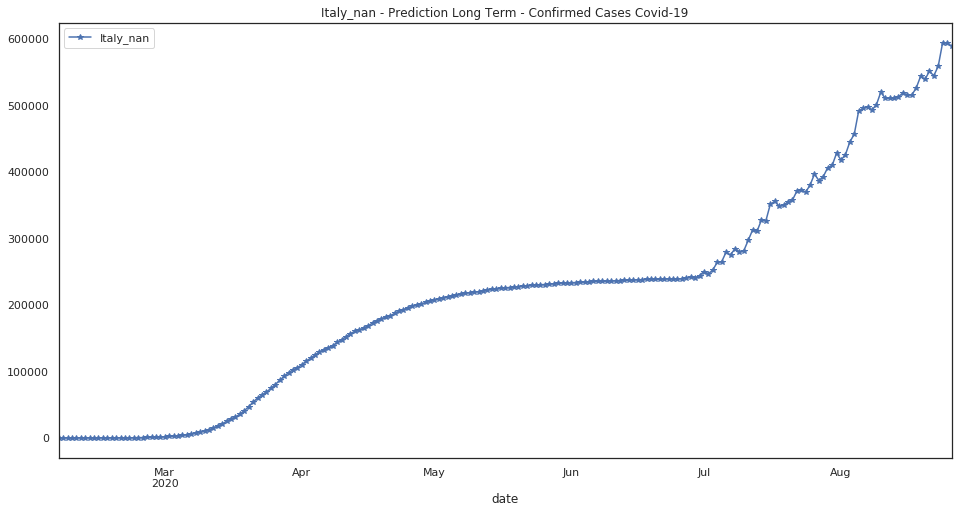

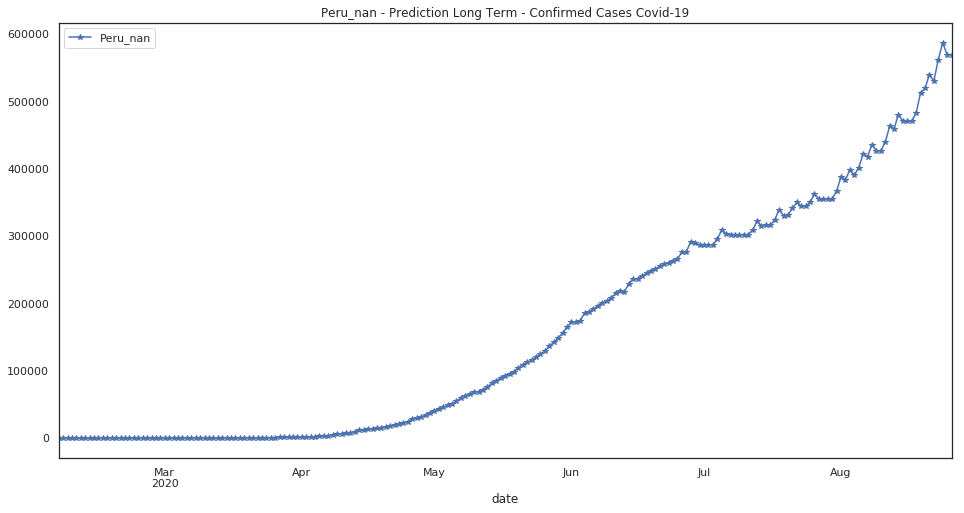

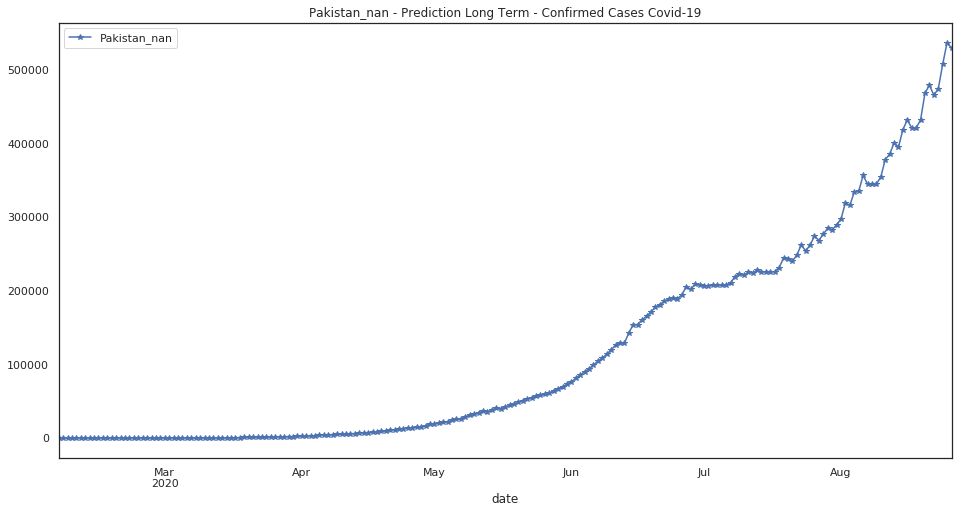

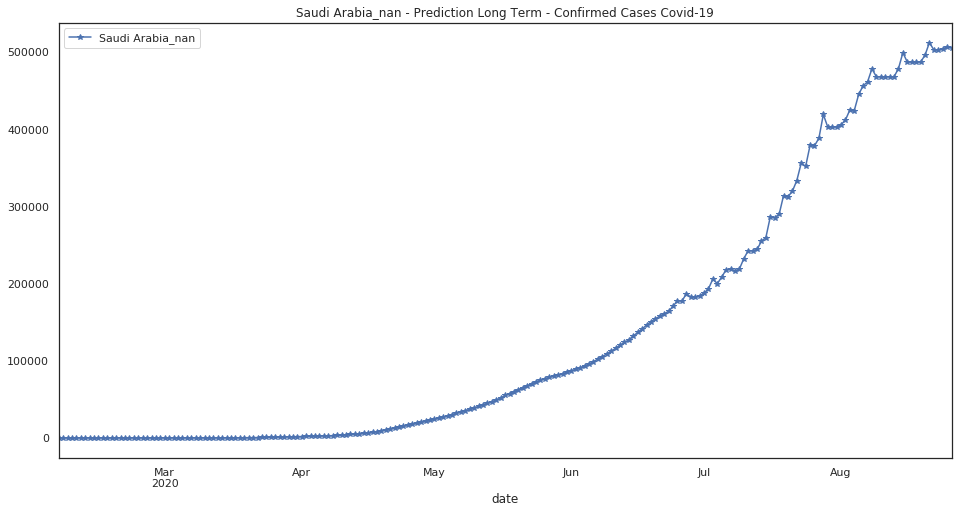

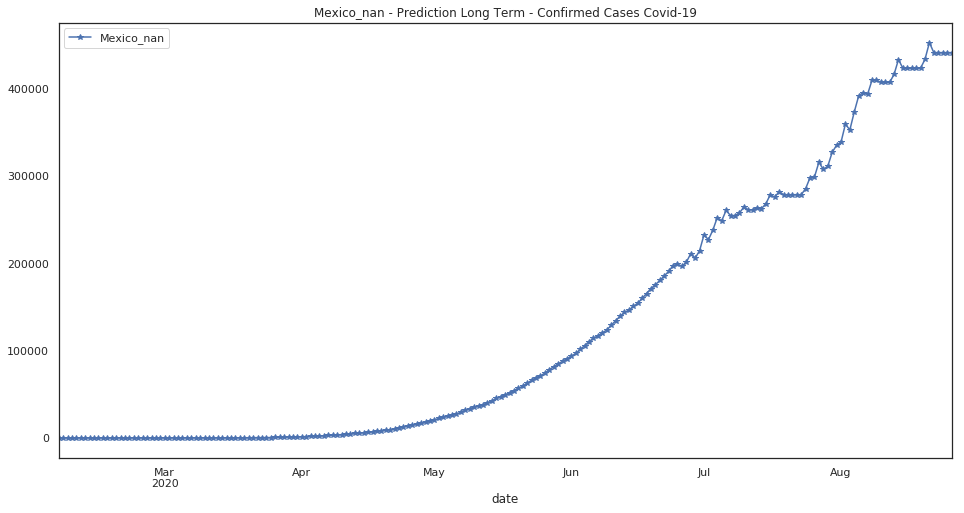

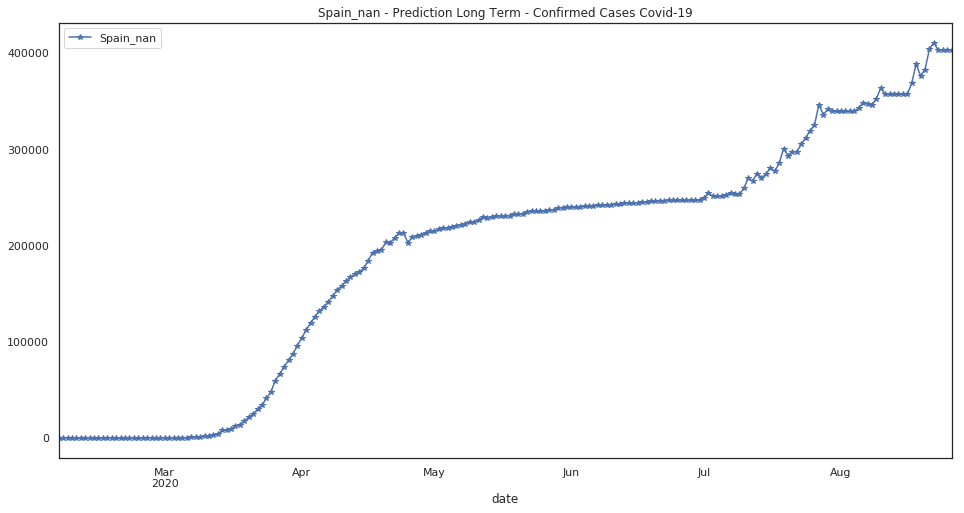

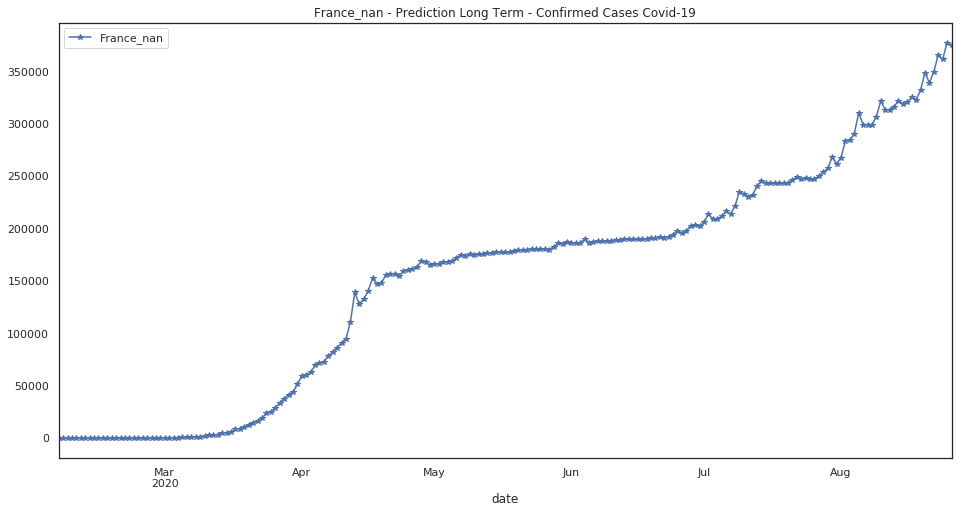

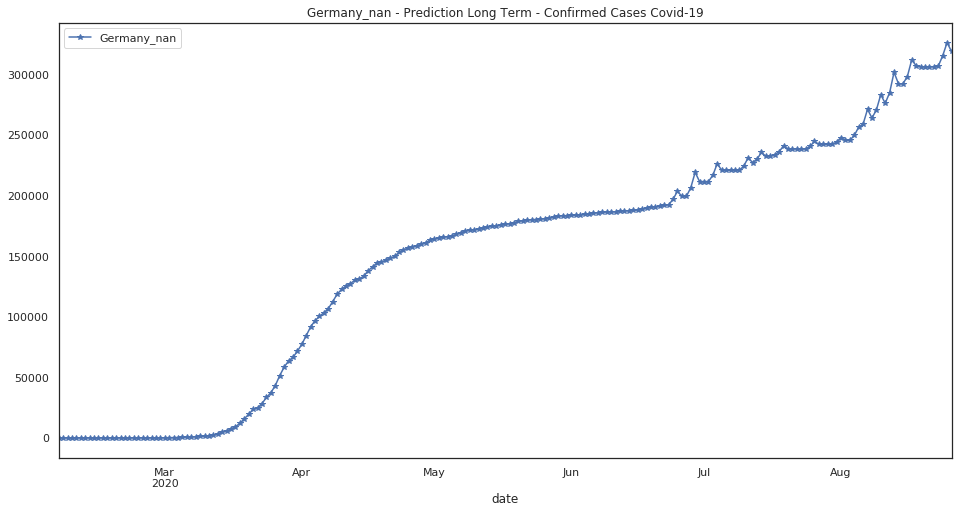

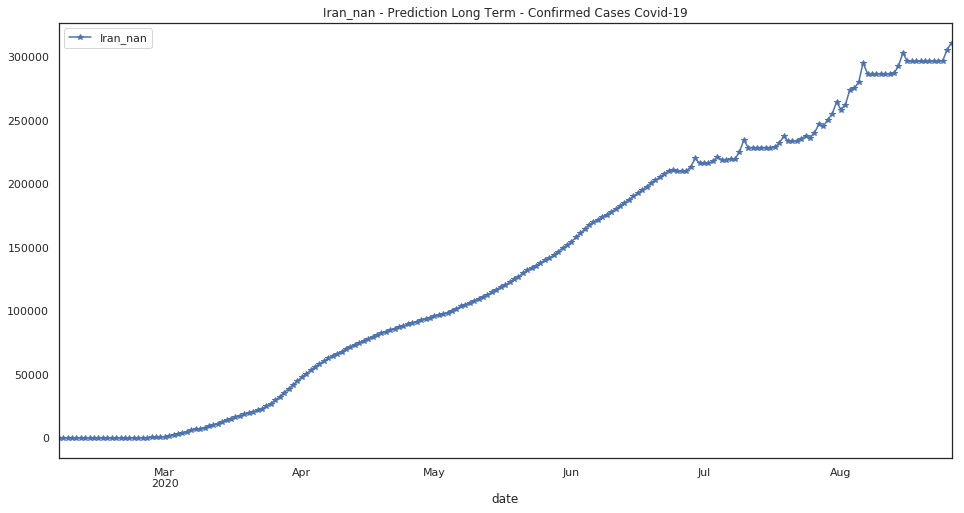

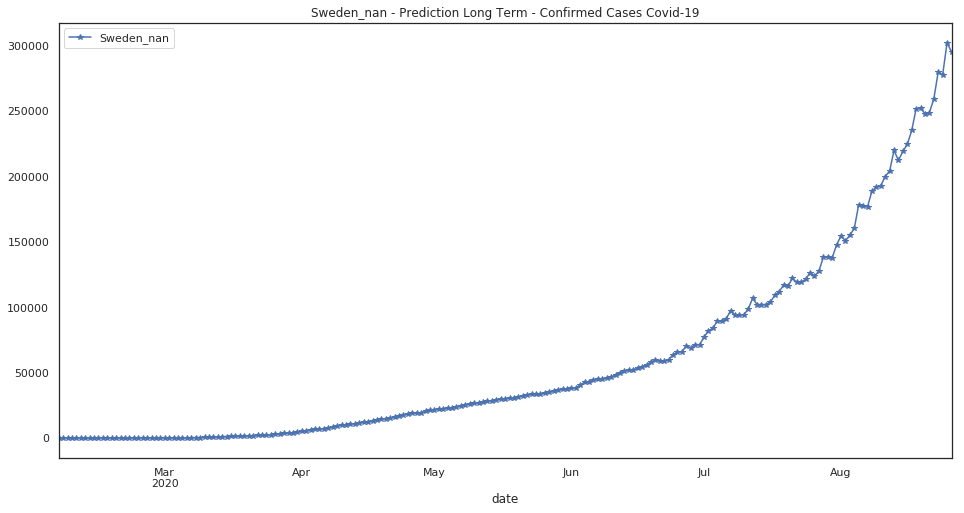

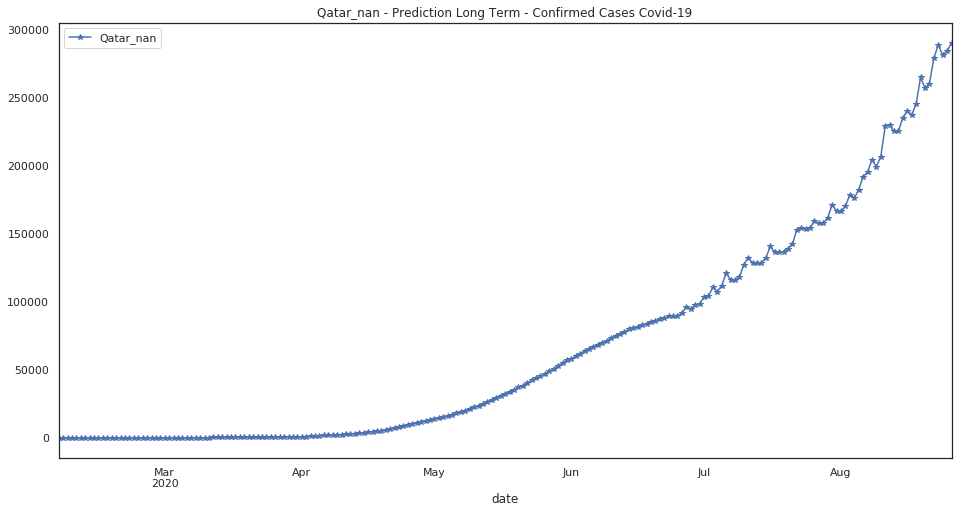

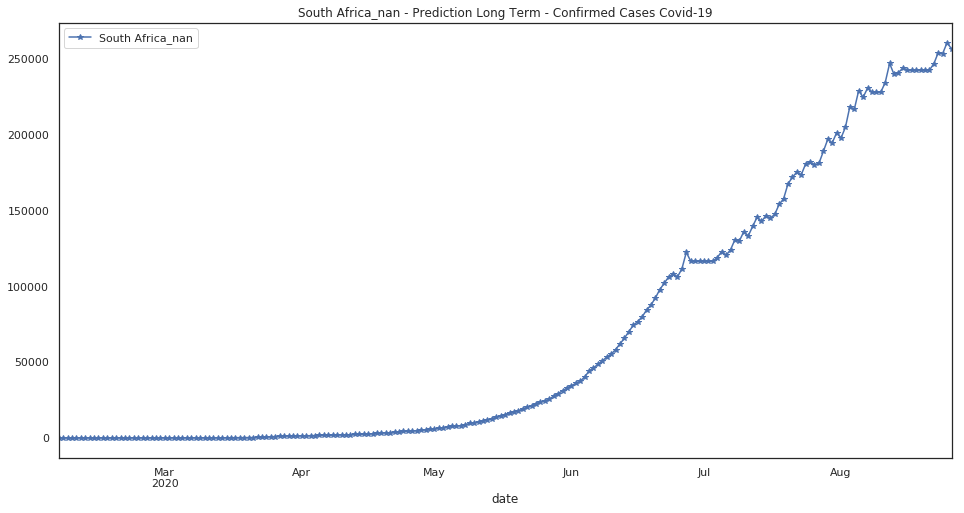

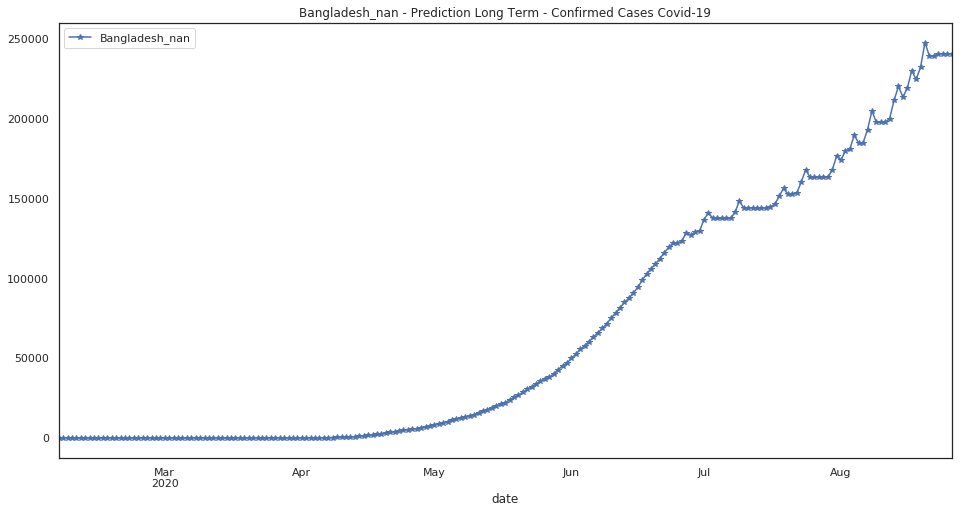

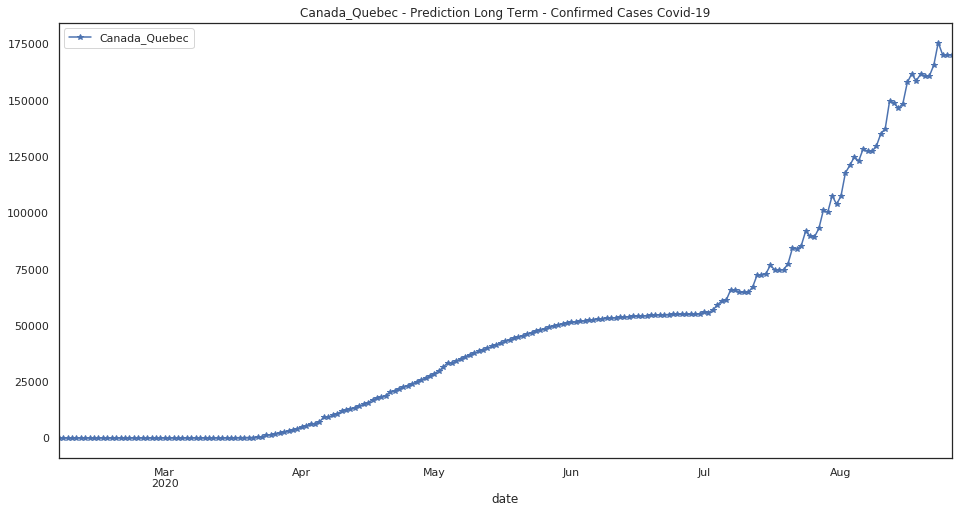

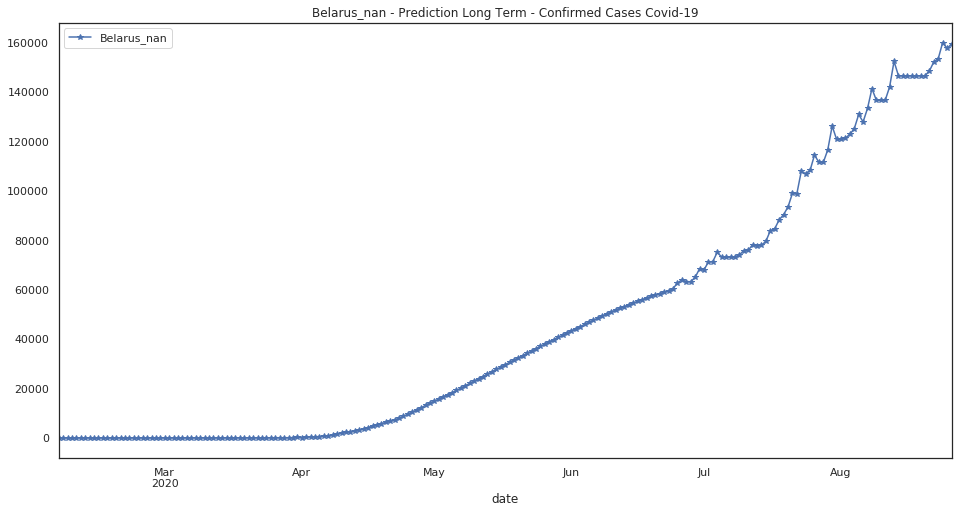

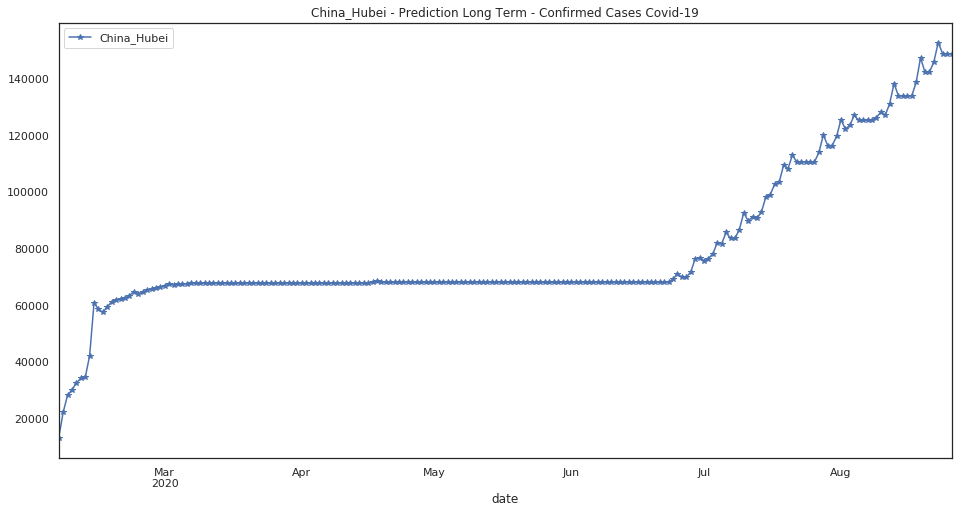

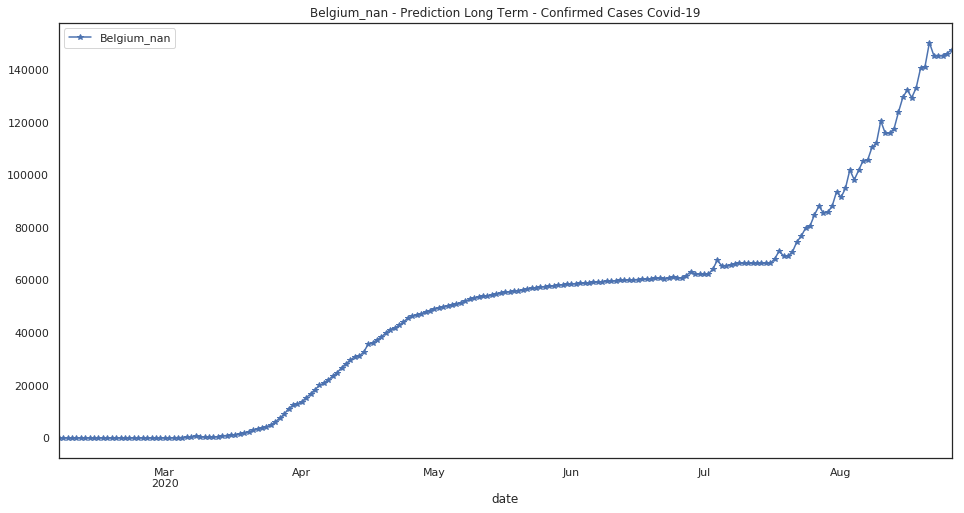

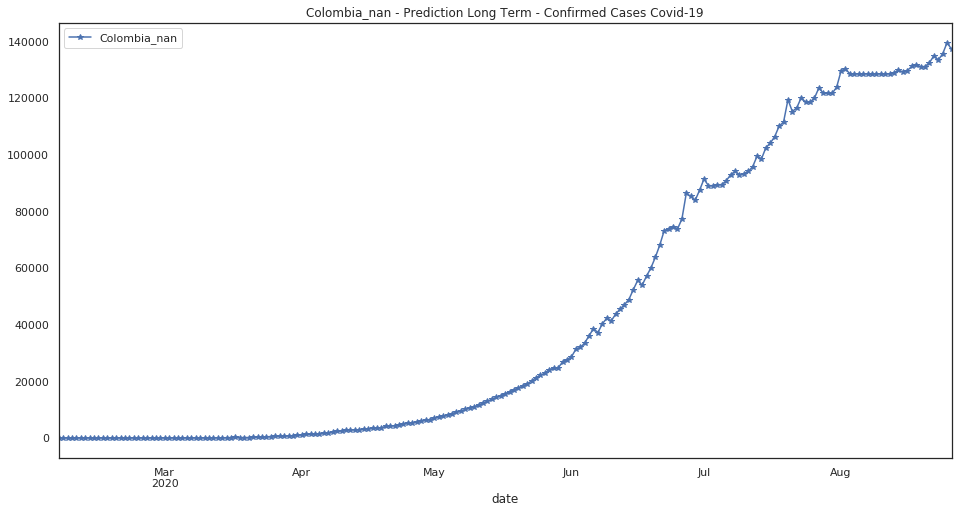

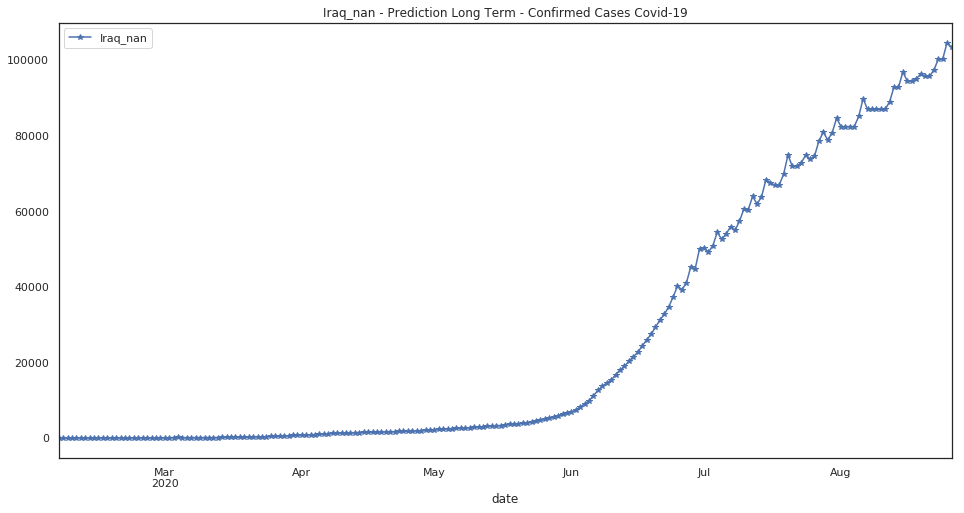

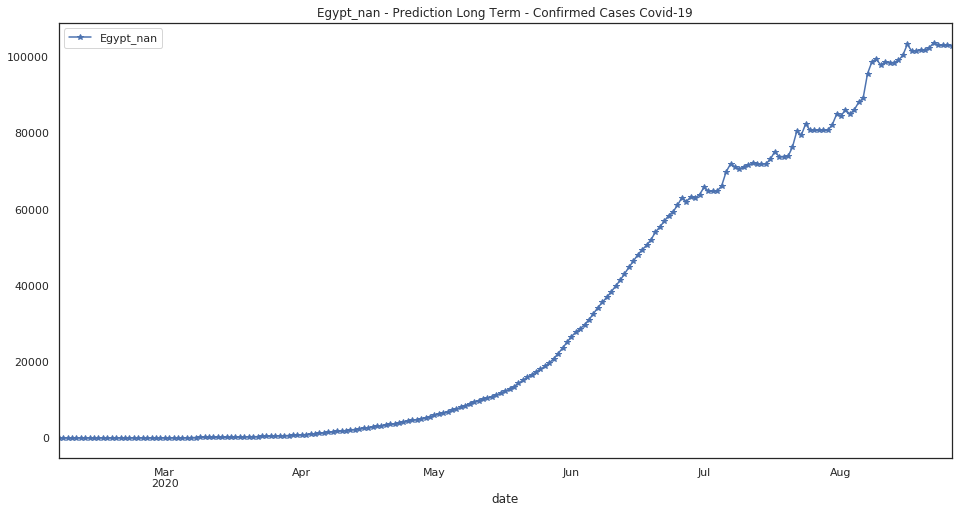

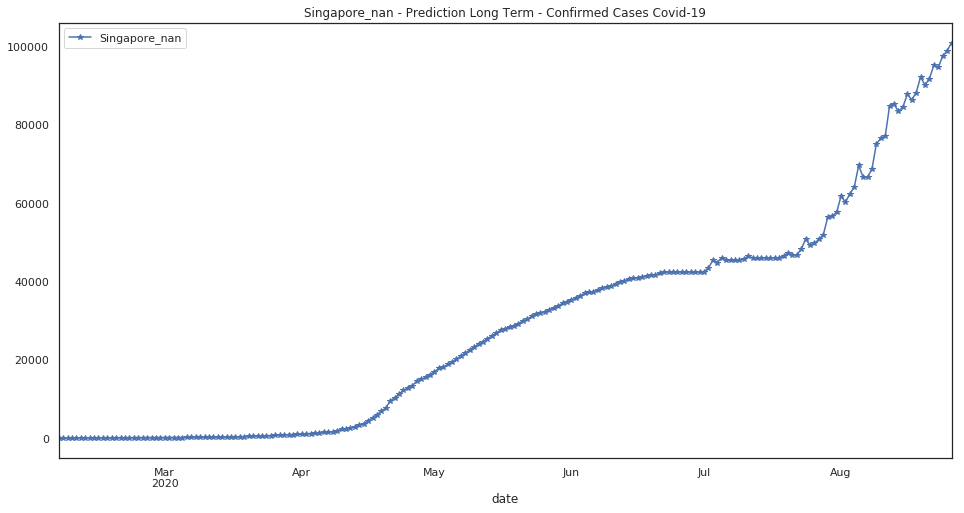

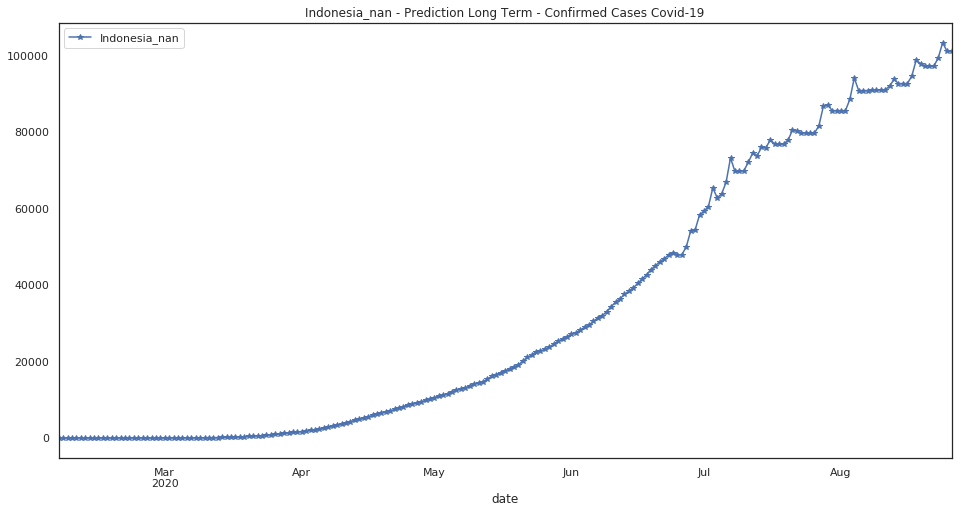

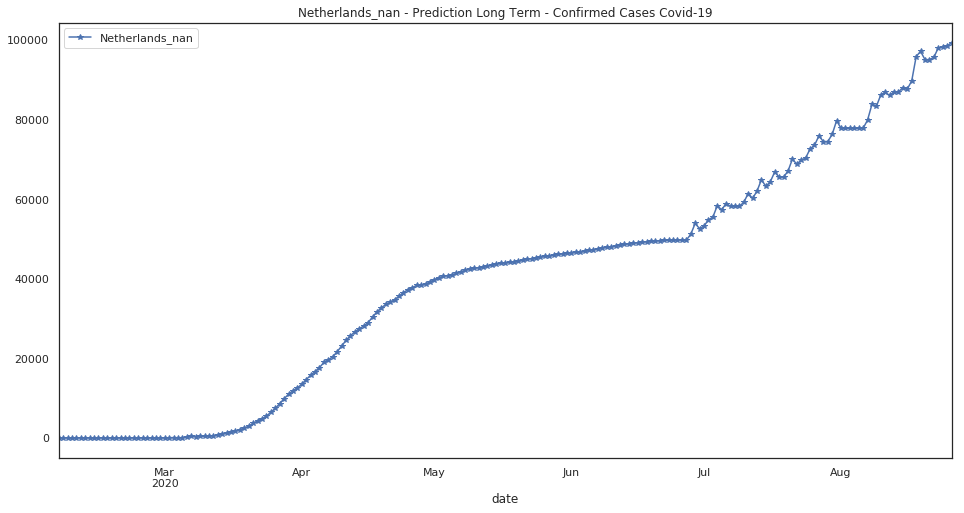

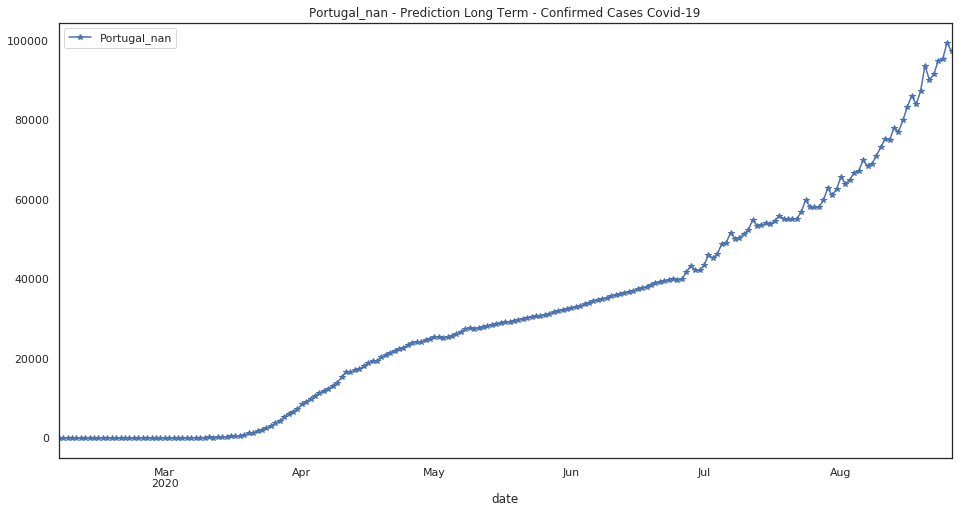

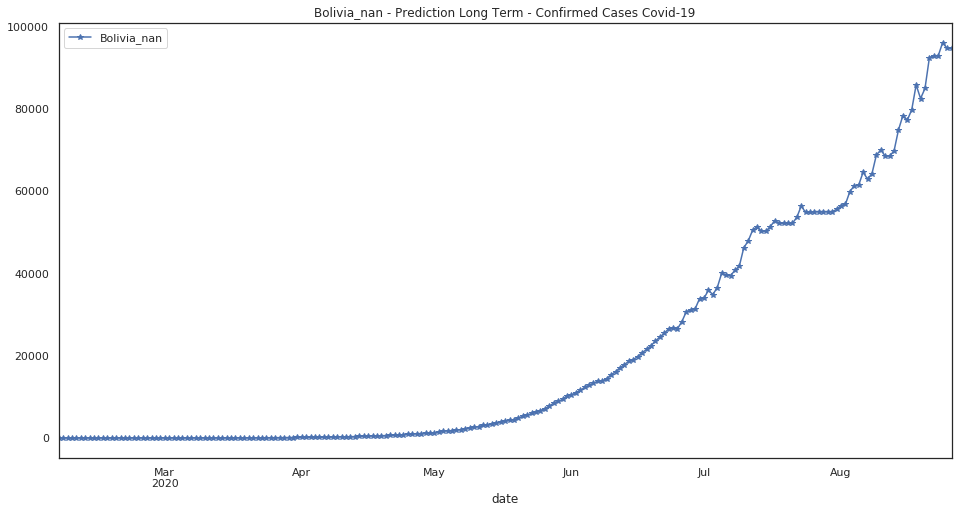

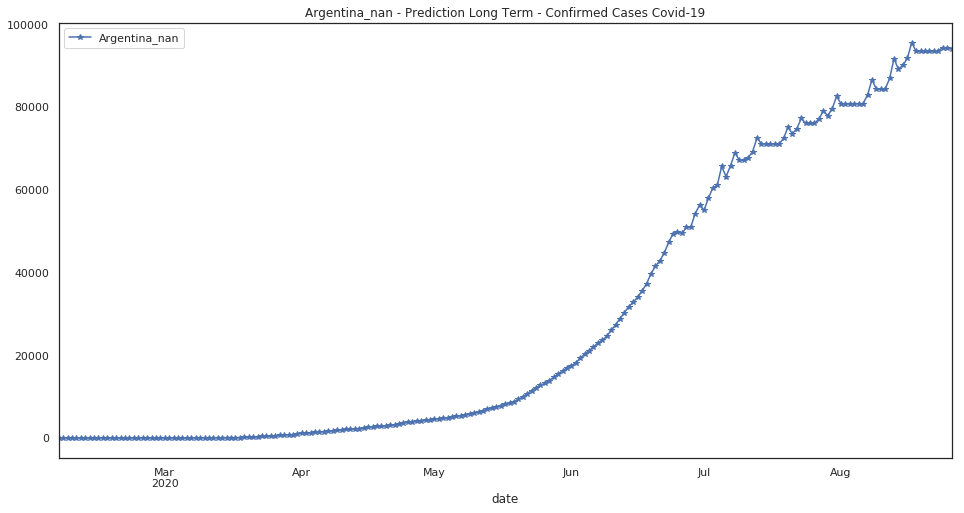

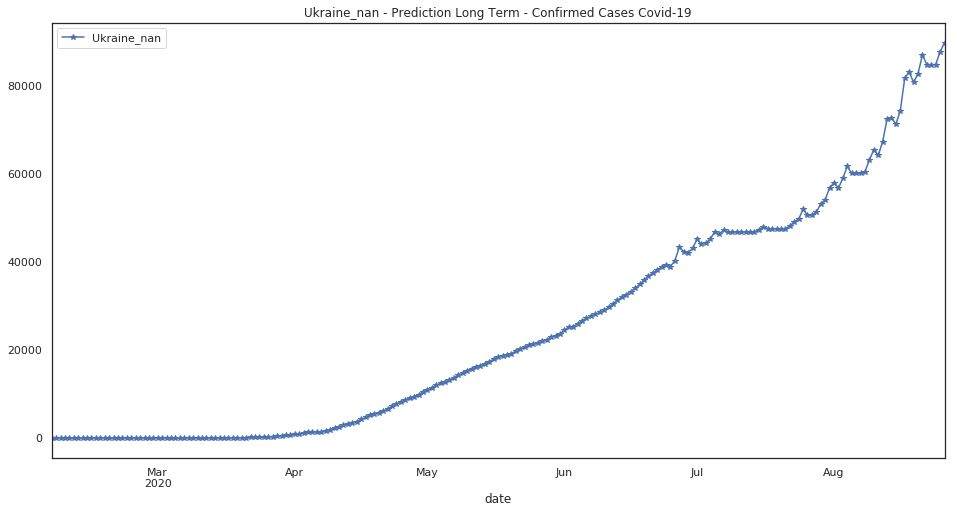

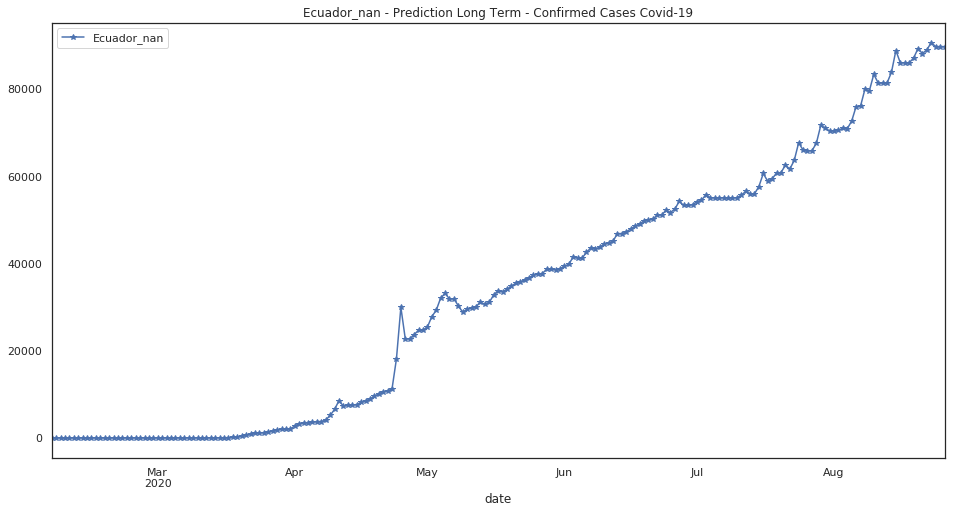

In [76]:
#
rgsx=region[:35]
for i in range (0,len(rgsx)):
        rg_print=rgsx[i]
        pred_prg=pd.DataFrame()
        pred_prg=pred[rg_print]
        pred_prg[:].plot(marker='*',figsize=(16,8),title =rg_print+' - Prediction Long Term - Confirmed Cases Covid-19')
        plt.legend(loc = 'upper left')
        plt.show()
#

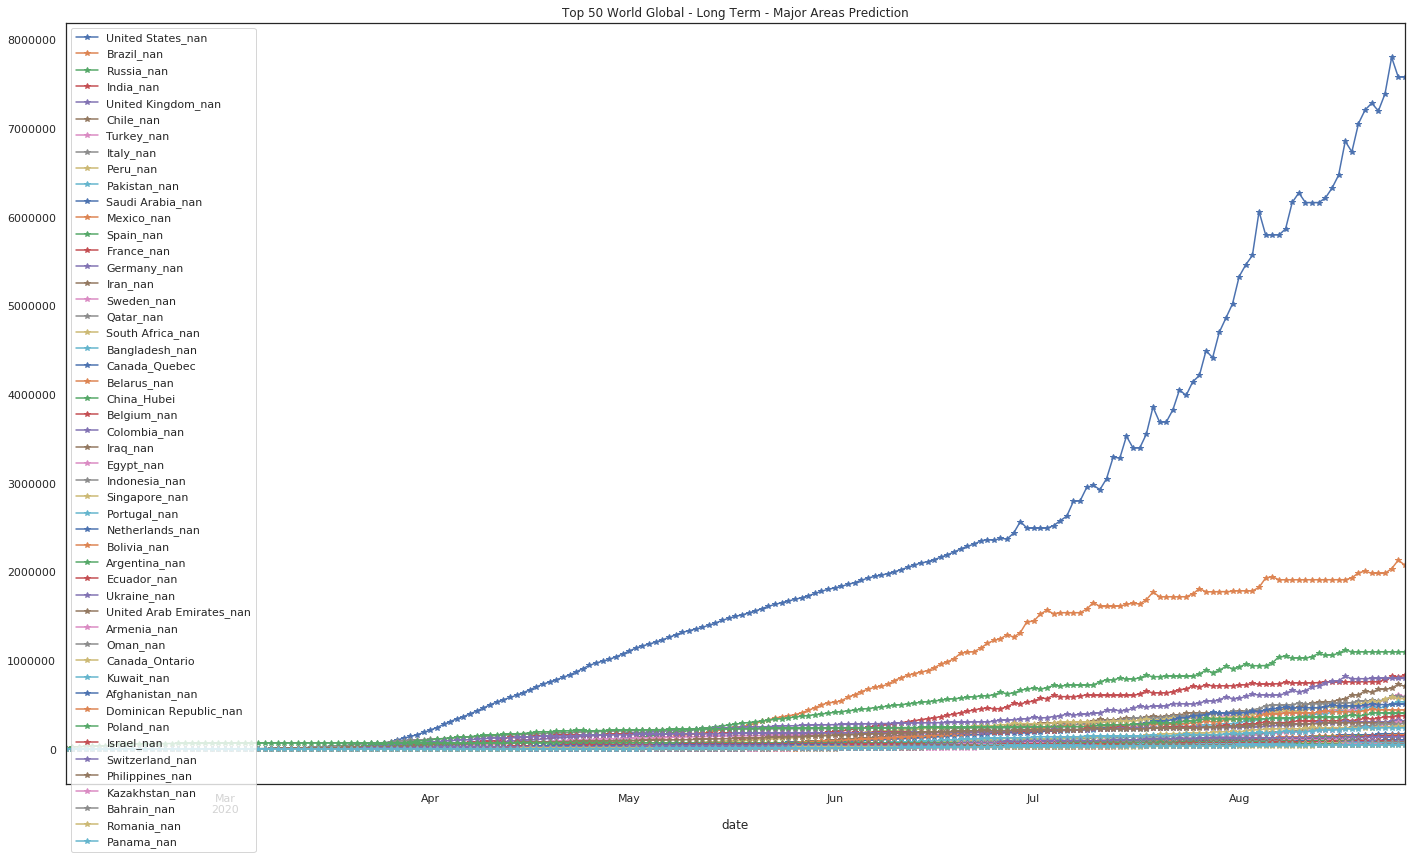

In [77]:
#region=my_train_list
pv2=pred
pv2=pv2.reindex(pv2.max().sort_values(ascending=False).index, axis=1)
pv2[:].iloc[:,0:50].plot(marker='*',figsize=(24,14),title ='Top 50 World Global - Long Term - Major Areas Prediction')
plt.legend(loc = 'upper left')
plt.show()

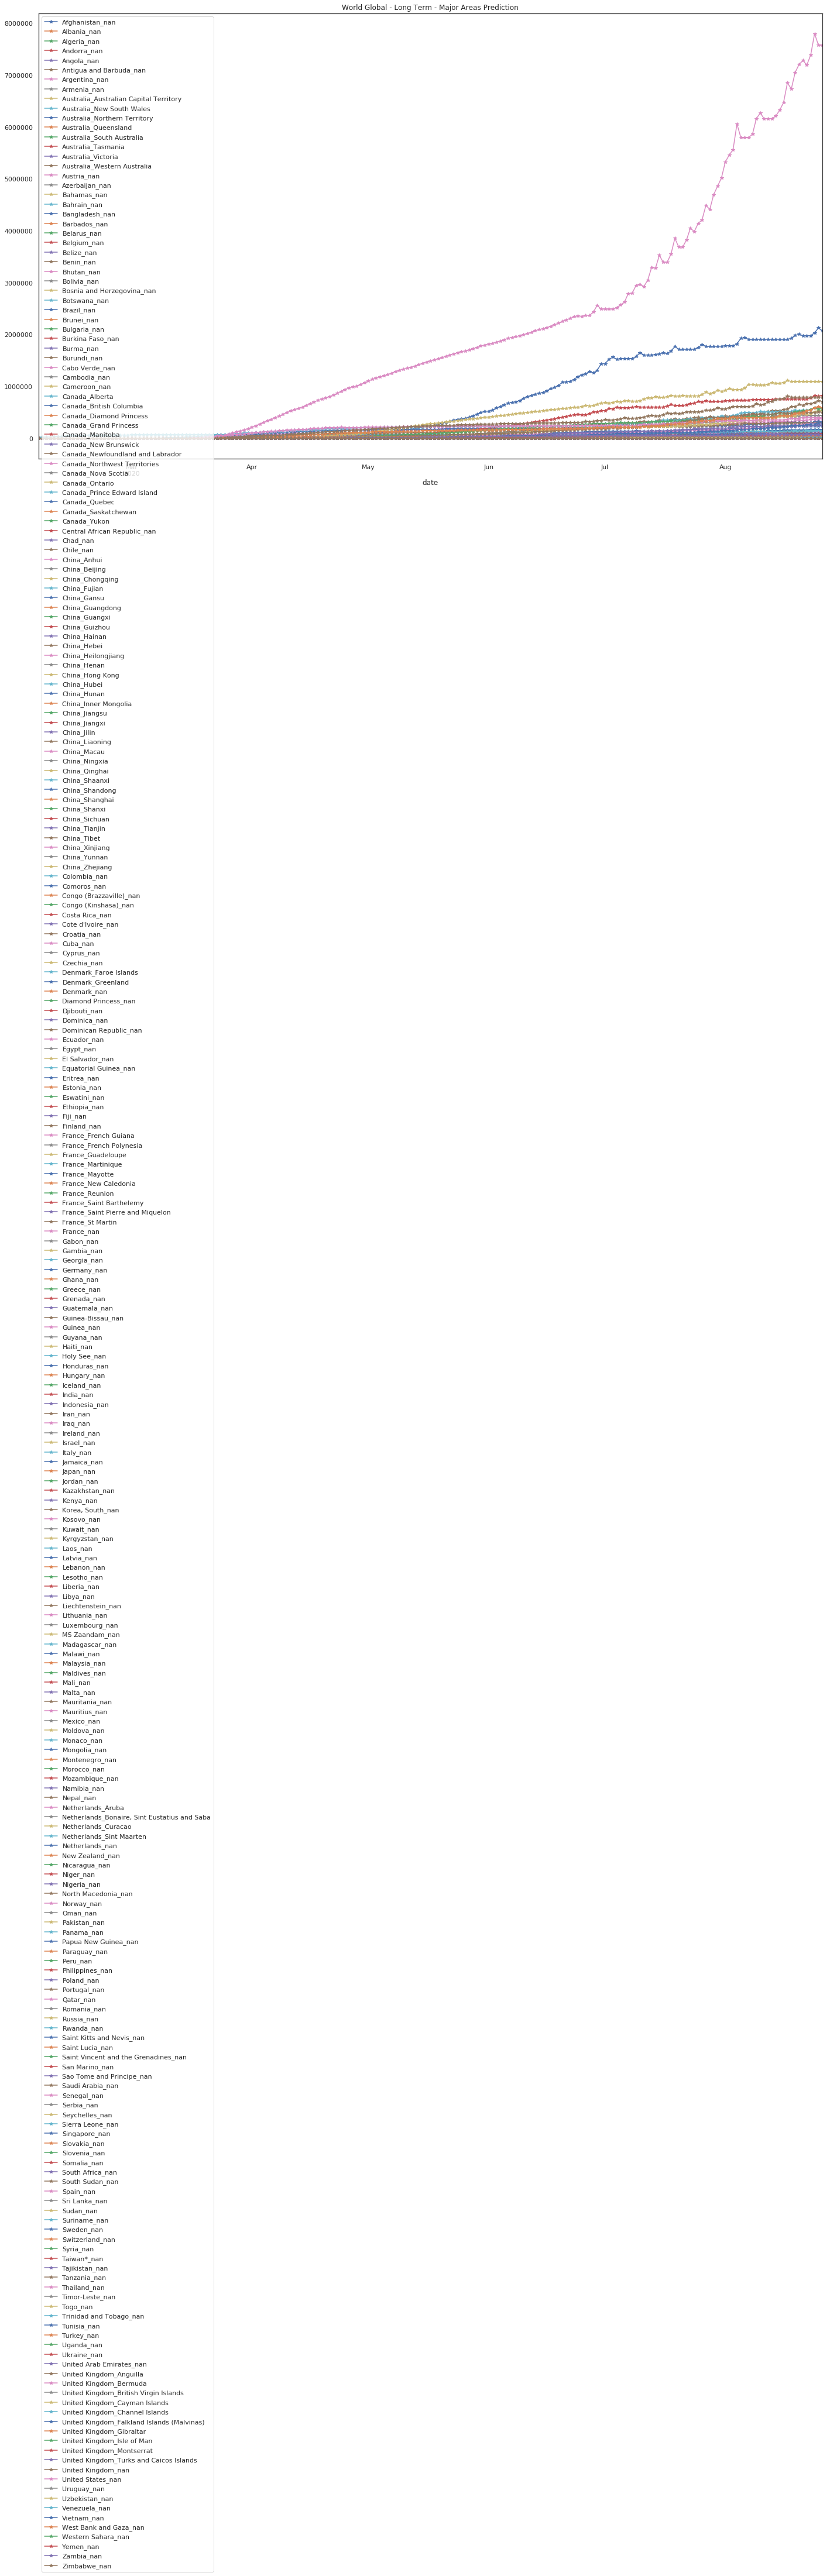

In [78]:
#region=my_train_list
pv2=pred
pv2[:].plot(marker='*',figsize=(24,14),title ='World Global - Long Term - Major Areas Prediction')
plt.legend(loc = 'upper left')
plt.show()


## Prediction Heatmap

In [79]:
pv1=pv2[:] #p  #p2.append(p3).append(p4).append(p5).append(p6).append(p8).append(p9).append(p11)
p=pd.DataFrame(pv1)

In [80]:
p[45:]

region      Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  \
date                                                                 
2020-03-22             67.0         97.0        252.0        260.0   
2020-03-23             86.0        116.0        304.0        328.0   
2020-03-24             96.0        135.0        315.0        265.0   
2020-03-25            143.0        159.0        352.0        185.0   
2020-03-26            136.0        187.0        406.0        207.0   
2020-03-27            151.0        209.0        474.0        247.0   
2020-03-28            158.0        208.0        502.0        285.0   
2020-03-29            153.0        220.0        554.0        308.0   
2020-03-30            191.0        235.0        627.0        334.0   
2020-03-31            242.0        248.0        745.0        370.0   
2020-04-01            249.0        271.0        913.0        376.0   
2020-04-02            335.0        286.0       1045.0        390.0   
2020-04-03            335.0        310.0       1214.0        428.0   
2020-04-04            330.0        344.0       1363.0        439.0   
2020-04-05            372.0        373.0       1364.0        466.0   
2020-04-06            424.0        393.0       1445.0        501.0   
2020-04-07            443.0        394.0       1536.0        525.0   
2020-04-08            503.0        400.0       1580.0        545.0   
2020-04-09            512.0        420.0       1718.0        564.0   
2020-04-10            563.0        422.0       1808.0        583.0   
2020-04-11            596.0        434.0       1889.0        601.0   
2020-04-12            638.0        456.0       1947.0        601.0   
2020-04-13            706.0        471.0       2041.0        638.0   
2020-04-14            761.0        490.0       2109.0        646.0   
2020-04-15            817.0        495.0       2209.0        659.0   
2020-04-16            891.0        525.0       2312.0        673.0   
2020-04-17            943.0        550.0       2457.0        673.0   
2020-04-18            992.0        561.0       2613.0        696.0   
2020-04-19           1015.0        565.0       2692.0        704.0   
2020-04-20           1082.0        587.0       2770.0        713.0   
...                     ...          ...          ...          ...   
2020-07-28          40472.0       2943.0      15211.0       1244.0   
2020-07-29          41483.0       2943.0      15212.0       1244.0   
2020-07-30          43257.0       3017.0      15215.0       1244.0   
2020-07-31          42172.0       3261.0      15216.0       1297.0   
2020-08-01          43538.0       3317.0      15552.0       1307.0   
2020-08-02          45909.0       3340.0      16143.0       1361.0   
2020-08-03          45998.0       3643.0      15843.0       1361.0   
2020-08-04          48853.0       3683.0      15954.0       1361.0   
2020-08-05          47173.0       3603.0      16233.0       1361.0   
2020-08-06          47173.0       3603.0      16843.0       1361.0   
2020-08-07          48889.0       3616.0      16449.0       1361.0   
2020-08-08          52058.0       3745.0      16450.0       1432.0   
2020-08-09          50211.0       3800.0      16475.0       1432.0   
2020-08-10          50211.0       3837.0      16476.0       1432.0   
2020-08-11          50211.0       4009.0      16482.0       1477.0   
2020-08-12          50261.0       4017.0      16511.0       1477.0   
2020-08-13          51584.0       4220.0      16833.0       1477.0   
2020-08-14          53671.0       4116.0      17337.0       1477.0   
2020-08-15          54046.0       4116.0      17230.0       1477.0   
2020-08-16          56962.0       4116.0      17480.0       1477.0   
2020-08-17          55165.0       4221.0      18119.0       1477.0   
2020-08-18          55876.0       4447.0      18029.0       1477.0   
2020-08-19          57548.0       4358.0      18596.0       1477.0   
2020-08-20          57116.0       4486.0      18649.0       1477.0   
2020-08-21

In [81]:
pfname='data/p+'+str(num_days_R_prediction)+'_confirmed_daily.csv'
p.to_csv(pfname, index = False, header=True)

In [82]:
#!pip install gmplot
# Import the necessary libraries
import pandas as pd
import gmplot
# For improved table display in the notebook
#from IPython.display import display
import random 

In [83]:
heatmap=confirmed[['region','Lat','Long']]
p_m=p.T # pred.T #
### JOAO - Change Global HeapMap print - USA is too small, as USA States datasets are not used! 
#heatmap=heatmap[heatmap['region'].isin(region)]  ## heatmap for region dataset only 
heatmap=heatmap[heatmap['region'].isin(confirmed['region'])] ## Global heatmap
p_m=p_m.reset_index()
heatmap_m=heatmap.merge(p_m,how='left',on='region')


In [84]:
heatmap_m[:]

region        Lat        Long  \
0                                 Afghanistan_nan  33.000000   65.000000   
1                                     Albania_nan  41.153300   20.168300   
2                                     Algeria_nan  28.033900    1.659600   
3                                     Andorra_nan  42.506300    1.521800   
4                                      Angola_nan -11.202700   17.873900   
5                         Antigua and Barbuda_nan  17.060800  -61.796400   
6                                   Argentina_nan -38.416100  -63.616700   
7                                     Armenia_nan  40.069100   45.038200   
8          Australia_Australian Capital Territory -35.473500  149.012400   
9                       Australia_New South Wales -33.868800  151.209300   
10                   Australia_Northern Territory -12.463400  130.845600   
11                           Australia_Queensland -28.016700  153.400000   
12                      Australia_South Australia -34.928500  138.600700   
13                             Australia_Tasmania -41.454500  145.970700   
14                             Australia_Victoria -37.813600  144.963100   
15                    Australia_Western Australia -31.950500  115.860500   
16                                    Austria_nan  47.516200   14.550100   
17                                 Azerbaijan_nan  40.143100   47.576900   
18                                    Bahamas_nan  25.034300  -77.396300   
19                                    Bahrain_nan  26.027500   50.550000   
20                                 Bangladesh_nan  23.685000   90.356300   
21                                   Barbados_nan  13.193900  -59.543200   
22                                    Belarus_nan  53.709800   27.953400   
23                                    Belgium_nan  50.833300    4.000000   
24                                      Benin_nan   9.307700    2.315800   
25                                     Bhutan_nan  27.514200   90.433600   
26                                    Bolivia_nan -16.290200  -63.588700   
27                     Bosnia and Herzegovina_nan  43.915900   17.679100   
28                                     Brazil_nan -14.235000  -51.925300   
29                                     Brunei_nan   4.535300  114.727700   
..                                            ...        ...         ...   
238                               Timor-Leste_nan  -8.874217  125.727539   
239                                    Belize_nan  13.193900  -59.543200   
240                                      Laos_nan  19.856270  102.495496   
241                                     Libya_nan  26.335100   17.228331   
242                        West Bank and Gaza_nan  31.952200   35.233200   
243                             Guinea-Bissau_nan  11.803700  -15.180400   
244                                      Mali_nan  17.570692   -3.996166   
245                     Saint Kitts and Nevis_nan  17.357822  -62.782998   
246                  Canada_Northwest Territories  64.825500 -124.845700   
247                                  Canada_Yukon  64.282300 -135.000000   
248                                    Kosovo_nan  42.602636   20.902977   
249                                     Burma_nan  21.916200   95.956000   
250                       United Kingdom_Anguilla  18.220600  -63.068600   
251         United Kingdom_British Virgin Islands  18.420700  -64.640000   
252       United Kingdom_Turks and Caicos Islands  21.694000  -71.797900   
253                                MS Zaandam_nan   0.000000    0.000000   
254                                  Botswana_nan -22.328500   24.684900   
255                                   Burundi_nan  -3.373100   29.918900   
256                              Sierra Leone_nan   8.460555  -11.779889   
257  Netherlands_Bonaire, Sint Eustatius and Saba  12.178400  -68.238500   
258                                    Malawi_nan -13.254308   34.301525   
259    United K

In [85]:
#!pip install folium
import folium
import re

lat=46.99474
lang=6.87237

p21_cluster=folium.Map(location=[lat,lang],zoom_start=6)
from folium import plugins
cluster=plugins.MarkerCluster().add_to(p21_cluster)

colors={'A':'darkgreen','B':'darkpurple','C':'pink','D':'beige','E':'red','F':'lightblue','G':'darkblue','H':'cadetblue','I':'gray',
        'J':'lightred','K':'blue','L':'orange','M':'lightgreen','N':'orange','O':'purple','P':'lightgray','Q':'darkred','R':'green',
        'S':'black','T':'blue','U':'purple','V':'green','X':'blue','Y':'beige','W':'pink','Z':'white'}

date_pred=(datetime.today()+pd.DateOffset(days=num_days_R_prediction)).strftime('%Y-%m-%d')
ndaysavg=num_days_R_prediction
ndayarray=-1-num_days_R_prediction

for lat,lng,num,totpred,ldaygrowth in zip(heatmap_m.Lat,heatmap_m.Long,range(0,heatmap_m.shape[0]), heatmap_m[heatmap_m.columns[-1]],  (heatmap_m[heatmap_m.columns[-1]]-heatmap_m[heatmap_m.columns[ndayarray]])/ndaysavg ):
    use_color=heatmap_m['region'][num][0]
    print_region=re.sub('_nan',  '', heatmap_m['region'][num])
    popup = folium.Popup( print_region+' ConfirmedPred='+str(round(totpred))+' 1DayChangePred='+str(round(ldaygrowth))+' Date='+date_pred , parse_html=True)
    #
    folium.Marker(
                    [lat,lng],
                    popup=popup,
                    icon=folium.Icon(color=colors[use_color])
            ).add_to(p21_cluster)
p21_cluster

In [86]:
# Top 50 Regions in the World impacted
region_m2=region[:54]
heatmap_m2=heatmap_m[heatmap_m['region'].isin(region_m2)].reset_index()
#
heatmap_m2[:]

index                    region      Lat      Long  2020-02-06 00:00:00  \
0       0           Afghanistan_nan  33.0000   65.0000                  5.0   
1       6             Argentina_nan -38.4161  -63.6167                  5.0   
2       7               Armenia_nan  40.0691   45.0382                  5.0   
3      19               Bahrain_nan  26.0275   50.5500                  5.0   
4      20            Bangladesh_nan  23.6850   90.3563                  5.0   
5      22               Belarus_nan  53.7098   27.9534                  5.0   
6      23               Belgium_nan  50.8333    4.0000                 22.0   
7      26               Bolivia_nan -16.2902  -63.5887                  5.0   
8      28                Brazil_nan -14.2350  -51.9253                  5.0   
9      42            Canada_Ontario  51.2538  -85.3232                  8.0   
10     44             Canada_Quebec  52.9399  -73.5491                  5.0   
11     48                 Chile_nan -35.6751  -71.5430                  5.0   
12     62               China_Hubei  30.9756  112.2707              13120.0   
13     82              Colombia_nan   4.5709  -74.2973                  5.0   
14     96    Dominican Republic_nan  18.7357  -70.1627                  5.0   
15     97               Ecuador_nan  -1.8312  -78.1834                  5.0   
16     98                 Egypt_nan  26.0000   30.0000                 26.0   
17    116                France_nan  46.2276    2.2137                 24.0   
18    121               Germany_nan  51.0000    9.0000                 18.0   
19    124             Guatemala_nan  15.7835  -90.2308                  5.0   
20    132                 India_nan  21.0000   78.0000                 34.0   
21    133             Indonesia_nan  -0.7893  113.9213                  5.0   
22    134                  Iran_nan  32.0000   53.0000                  5.0   
23    135                  Iraq_nan  33.0000   44.0000                  5.0   
24    136               Ireland_nan  53.1424   -7.6921                  5.0   
25    137                Israel_nan  31.0000   35.0000                  5.0   
26    138                 Italy_nan  43.0000   12.0000                 23.0   
27    140                 Japan_nan  36.0000  138.0000                 29.0   
28    142            Kazakhstan_nan  48.0196   66.9237                  5.0   
29    145                Kuwait_nan  29.5000   47.7500                  5.0   
30    160                Mexico_nan  23.6345 -102.5528                  5.0   
31    171           Netherlands_nan  52.1326    5.2913                  5.0   
32    175               Nigeria_nan   9.0820    8.6753                  5.0   
33    178                  Oman_nan  21.0000   57.0000                  5.0   
34    179              Pakistan_nan  30.3753   69.3451                  5.0   
35    180                Panama_nan   8.5380  -80.7821                  5.0   
36    183                  Peru_nan  -9.1900  -75.0152                  5.0   
37    184           Philippines_nan  13.0000  122.0000                 25.0   
38    185                Poland_nan  51.9194   19.1451                  5.0   
39    186              Portugal_nan  39.3999   -8.2245                 20.0   
40    187                 Qatar_nan  25.3548   51.1839                  5.0   
41    188               Romania_nan  45.9432   24.9668                  5.0   
42    189                Russia_nan  60.0000   90.0000                 28.0   
43    194          Saudi Arabia_nan  24.0000   45.0000                  5.0   
44    198             Singapore_nan   1.2833  103.8333                 50.0   
45    202          South Africa_nan -30.5595   22.9375                  5.0   
46    203                 Spain_nan  40.0000   -4.0000                 21.0   
47    207                Sweden_nan  63.0000   16.0000                 18.0   
48    208           Switzerland_nan  46.8182    8.2275                  5.0   
49    215                Turkey_nan  38.9637   35.2433

In [87]:
import folium
import re

lat=46.99474
lang=6.87237

p21_reg_cluster=folium.Map(location=[lat,lang],zoom_start=6)
from folium import plugins
cluster=plugins.MarkerCluster().add_to(p21_reg_cluster)

colors={'A':'darkgreen','B':'darkpurple','C':'pink','D':'beige','E':'red','F':'lightblue','G':'darkblue','H':'cadetblue','I':'gray',
        'J':'lightred','K':'blue','L':'orange','M':'lightgreen','N':'orange','O':'purple','P':'lightgray','Q':'darkred','R':'green',
        'S':'black','T':'blue','U':'purple','V':'green','X':'blue','Y':'beige','W':'pink','Z':'white'}

date_pred=(datetime.today()+pd.DateOffset(days=num_days_R_prediction)).strftime('%Y-%m-%d')
ndaysavg=num_days_R_prediction
ndayarray=-1-num_days_R_prediction

for lat2,lng2,num2,totpred2,ldaygrowth2 in zip(heatmap_m2.Lat,heatmap_m2.Long,range(0,heatmap_m2.shape[0]), heatmap_m2[heatmap_m2.columns[-1]], (heatmap_m2[heatmap_m2.columns[-1]]-heatmap_m2[heatmap_m2.columns[ndayarray]])/ndaysavg ):
    use_color2=heatmap_m2['region'][num2][0]
    print_region=re.sub('_nan',  '', heatmap_m2['region'][num2])
    popup2 = folium.Popup( print_region+' ConfirmedPred='+str(round(totpred2))+' 1DayChangePred='+str(round(ldaygrowth2))+' Date='+date_pred , parse_html=True)  
    #
    folium.Marker(
                    [lat2,lng2],
                    popup=popup2,
                    icon=folium.Icon(color=colors[use_color2])
            ).add_to(p21_reg_cluster)
p21_reg_cluster

In [88]:
#
datemap=datetime.today().strftime('%Y-%m-%d')
p21_cluster.save("heatmaps/Heatmap_Folium-Global-"+datemap+"-pred"+str(num_days_R_prediction)+"Days.html")
#
p21_reg_cluster.save("heatmaps/Heatmap_Folium-Regional-"+datemap+"-pred"+str(num_days_R_prediction)+"Days.html")

In [89]:
print("Stats and Forecast Done for Today!")
print("I'm done with this past month of March, April and May!")
print(" April-May-June-July are going to be hard with this Global Lock-Down!")

Stats and Forecast Done for Today!
I'm done with this past month of March, April and May!
 April-May-June-July are going to be hard with this Global Lock-Down!


In [90]:
exit()